In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Main Dataset EDA 

In [6]:
main_df = pd.read_csv('datas/main_dataset.csv', encoding='latin1')

In [7]:
main_df.columns = main_df.columns.str.strip()

In [8]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
main_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
main_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [11]:
main_df = main_df.rename(columns = {"2401" : "id", "Borderlands": "Entity", "Positive": "Sentiment", "im getting on borderlands and i will murder you all ," : "tweet"})

In [12]:
main_df

,id,Entity,Sentiment,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [13]:
sentiment_frequencies = main_df['Sentiment'].value_counts()

In [14]:
sentiment_frequencies

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

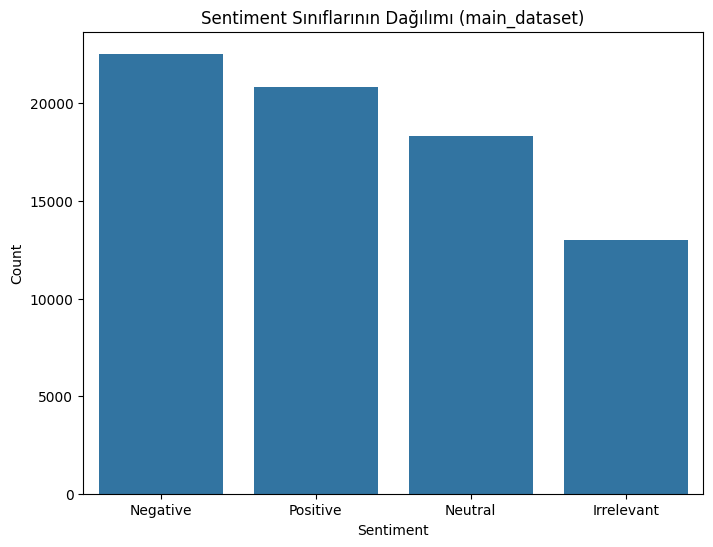

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Sentiment", data=main_df, order=main_df["Sentiment"].value_counts().index)
plt.title('Sentiment Sınıflarının Dağılımı (main_dataset)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [16]:
main_df['tweet_length'] = main_df["tweet"].astype(str).apply(len)
main_df['tweet_length'].describe()

count    74681.000000
mean       108.323831
std         80.136282
min          1.000000
25%         46.000000
50%         90.000000
75%        153.000000
max        957.000000
Name: tweet_length, dtype: float64

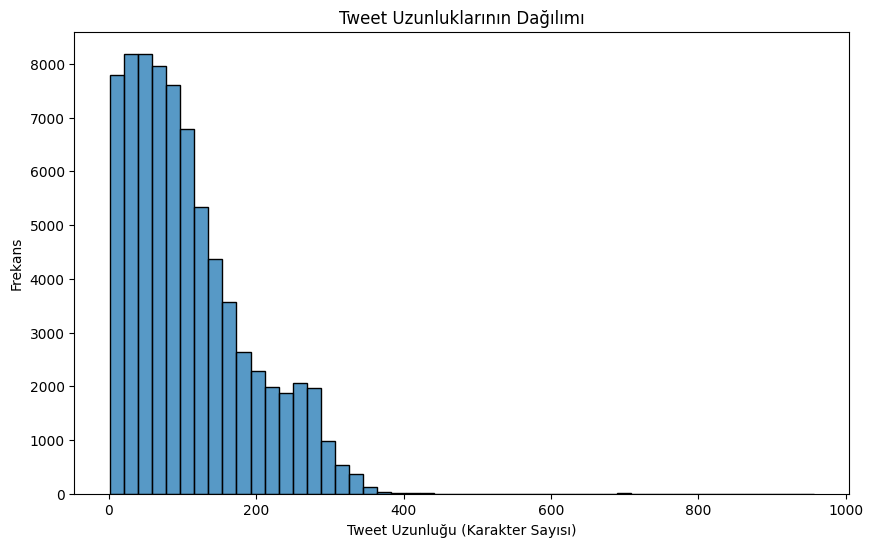

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(main_df['tweet_length'], bins=50)
plt.title('Tweet Uzunluklarının Dağılımı')
plt.xlabel('Tweet Uzunluğu (Karakter Sayısı)')
plt.ylabel('Frekans')
plt.show()

In [19]:
main_df["Entity"].value_counts()

Entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

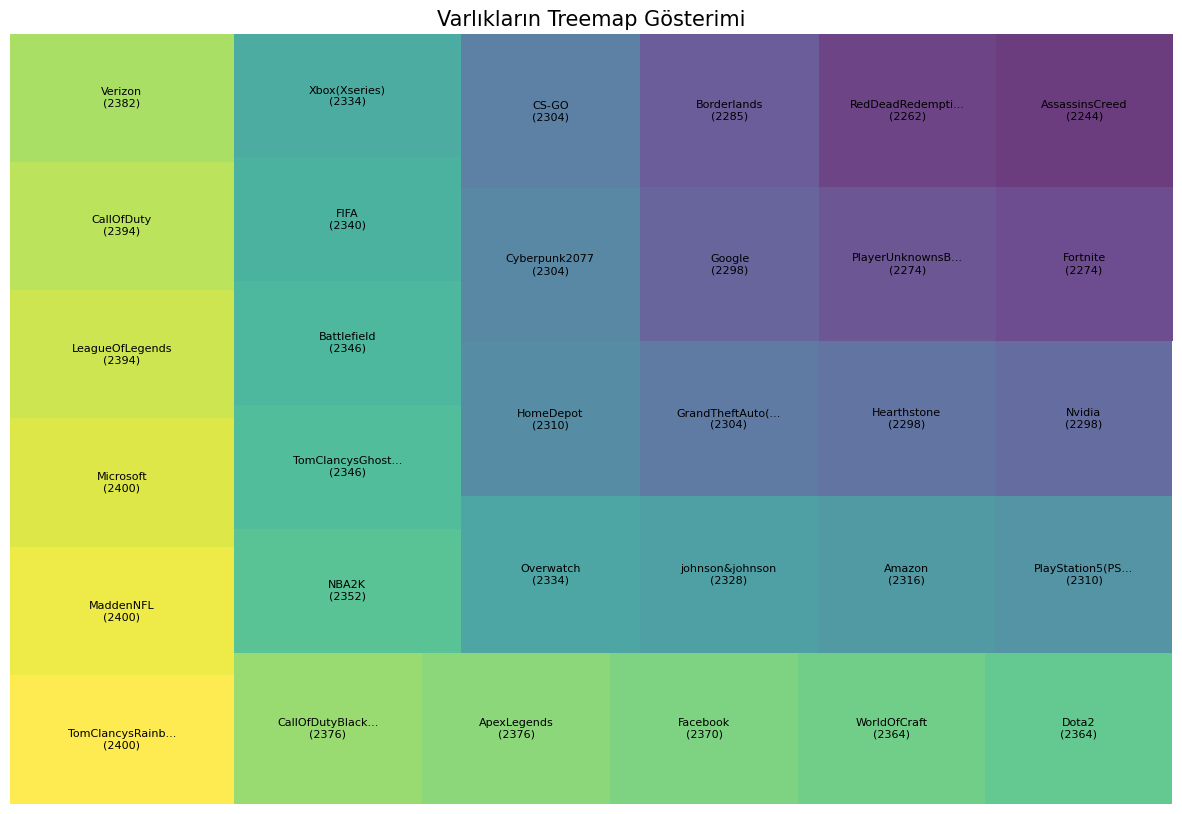

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

entity_counts = pd.Series(main_df["Entity"].value_counts())

# Etiketleri kısaltabiliriz
labels = [f"{name[:15]}...\n({count})" if len(name) > 15 else f"{name}\n({count})" for name, count in entity_counts.items()]


plt.figure(figsize=(15, 10))
colors = plt.cm.viridis_r([i/float(len(entity_counts)) for i in range(len(entity_counts))])
squarify.plot(sizes=entity_counts.values, label=labels, alpha=0.8, color=colors, text_kwargs={'fontsize':8})
plt.title(f'Varlıkların Treemap Gösterimi', fontsize=15)
plt.axis('off') 
plt.show()

### Sentimentlerin Her Varlık İçinde Dağılışları

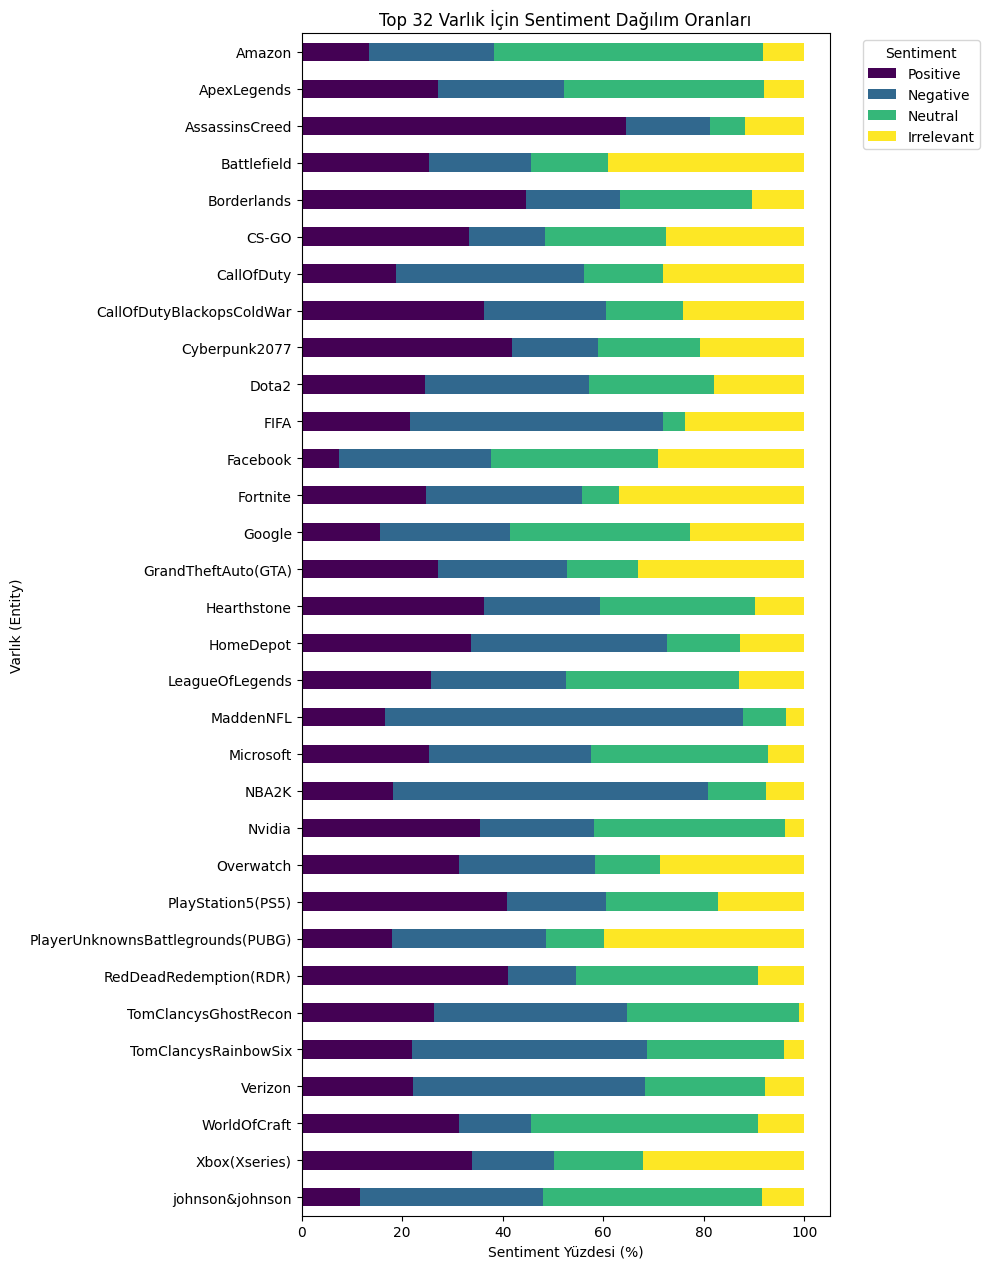


--- Her Varlık İçin Sentiment Sayıları (İlk 5 Varlık) ---
Sentiment       Positive  Negative  Neutral  Irrelevant
Entity                                                 
Amazon               312       576     1236         192
ApexLegends          642       600      942         192
AssassinsCreed      1446       378      156         264
Battlefield          594       474      360         918
Borderlands         1019       426      600         240

--- Her Varlık İçin Sentiment Oranları (%) (İlk 5 Varlık) ---
Sentiment        Positive   Negative    Neutral  Irrelevant
Entity                                                     
Amazon          13.471503  24.870466  53.367876    8.290155
ApexLegends     27.020202  25.252525  39.646465    8.080808
AssassinsCreed  64.438503  16.844920   6.951872   11.764706
Battlefield     25.319693  20.204604  15.345269   39.130435
Borderlands     44.595186  18.643326  26.258206   10.503282


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if main_df is not None and 'Entity' in main_df.columns and 'Sentiment' in main_df.columns:
    
    filtered_df = main_df[main_df['Entity'].isin(main_df['Entity'].unique())]

    if not filtered_df.empty:
        
        entity_sentiment_counts = filtered_df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

        
        sentiment_order = ['Positive', 'Negative', 'Neutral', 'Irrelevant'] 
        
        available_sentiments_in_data = entity_sentiment_counts.columns.tolist()
        ordered_columns = [s for s in sentiment_order if s in available_sentiments_in_data]
        
        for s_col in available_sentiments_in_data:
            if s_col not in ordered_columns:
                ordered_columns.append(s_col)
        entity_sentiment_counts = entity_sentiment_counts.reindex(columns=ordered_columns, fill_value=0)


        
        entity_sentiment_proportions = entity_sentiment_counts.apply(lambda x: x / x.sum() * 100, axis=1)

        
        num_entities = len(entity_sentiment_proportions)
        fig_height = max(8, num_entities * 0.4)

        entity_sentiment_proportions.plot(kind='barh', stacked=True, figsize=(12, fig_height), colormap='viridis')
        
        plt.title(f'Top {len(main_df['Entity'].unique())} Varlık İçin Sentiment Dağılım Oranları')
        plt.xlabel('Sentiment Yüzdesi (%)')
        plt.ylabel('Varlık (Entity)')
        plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left') 
        plt.tight_layout(rect=[0, 0, 0.85, 1]) 
        plt.gca().invert_yaxis() 
        
        

        plt.show()

        print("\n--- Her Varlık İçin Sentiment Sayıları (İlk 5 Varlık) ---")
        print(entity_sentiment_counts.head())
        print("\n--- Her Varlık İçin Sentiment Oranları (%) (İlk 5 Varlık) ---")
        print(entity_sentiment_proportions.head())

    else:
        print("Belirtilen varlıklar veri setinde bulunamadı veya filtreleme sonucu boş kaldı.")
else:
    print("Lütfen main_df'in yüklendiğinden ve entity_column_name ile sentiment_column_name'in doğru tanımlandığından emin olun.")

### En Sık Geçen Kelime ve Kelime Grupları 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
from nltk.corpus import stopwords
sentiment_column_name = "Sentiment"
text_column_name = "tweet"
entity_column_name = "Entity"

if main_df is not None and "tweet" in main_df.columns and sentiment_column_name in main_df.columns:
    stop_words_list = stopwords.words('english')
    
    
    try:
        vectorizer_general = CountVectorizer(stop_words=stop_words_list, max_features=20, ngram_range=(1,1)) # En sık 20 unigram
        X_general = vectorizer_general.fit_transform(main_df[text_column_name].astype(str).dropna()) 
        general_top_words = vectorizer_general.get_feature_names_out()
        print("\n--- Genel Olarak En Sık Geçen 20 Kelime (Unigram) ---")
        print(general_top_words)

        vectorizer_bigram = CountVectorizer(stop_words=stop_words_list, max_features=20, ngram_range=(2,2)) # En sık 20 bigram
        X_bigram = vectorizer_bigram.fit_transform(main_df[text_column_name].astype(str).dropna())
        general_top_bigrams = vectorizer_bigram.get_feature_names_out()
        print("\n--- Genel Olarak En Sık Geçen 20 Kelime Çifti (Bigram) ---")
        print(general_top_bigrams)

    except ValueError as ve:
        print(f"CountVectorizer hatası (genel): {ve} - Muhtemelen tüm belgeler stop word'lerden oluşuyor veya boş.")


    # Her sentiment için en sık kelimeler
    print("\n--- Her Sentiment Sınıfı İçin En Sık Geçen 10 Kelime ---")
    for sentiment_val in main_df[sentiment_column_name].dropna().unique():
        print(f"\nSentiment: {sentiment_val}")
        sentiment_texts = main_df[main_df[sentiment_column_name] == sentiment_val][text_column_name].astype(str).dropna()
        if not sentiment_texts.empty:
            try:
                vectorizer_sentiment = CountVectorizer(stop_words=stop_words_list, max_features=10, ngram_range=(1,1))
                vectorizer_sentiment.fit(sentiment_texts)
                sentiment_top_words = vectorizer_sentiment.get_feature_names_out()
                print(sentiment_top_words)
            except ValueError as ve:
                print(f"  CountVectorizer hatası: {ve} - Muhtemelen tüm belgeler stop word'lerden oluşuyor veya boş.")
        else:
            print("  Bu sentiment için metin bulunamadı.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aslay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Genel Olarak En Sık Geçen 20 Kelime (Unigram) ---
['best' 'co' 'com' 'game' 'get' 'good' 'johnson' 'like' 'love' 'new' 'one'
 'people' 'pic' 'play' 'really' 'see' 'shit' 'time' 'twitter' 'unk']

--- Genel Olarak En Sık Geçen 20 Kelime Çifti (Bigram) ---
['access health' 'bf4db com' 'black ops' 'call duty' 'cold war' 'com 2020'
 'com player' 'dead redemption' 'home depot' 'https co' 'italy italy'
 'johnson johnson' 'league legends' 'pic twitter' 'player ban' 'red dead'
 'rhandlerr rhandlerr' 'twitch tv' 'twitter com' 'xbox series']

--- Her Sentiment Sınıfı İçin En Sık Geçen 10 Kelime ---

Sentiment: Positive
['best' 'com' 'game' 'good' 'like' 'love' 'new' 'pic' 'really' 'twitter']

Sentiment: Neutral
['amazon' 'co' 'com' 'facebook' 'game' 'google' 'https' 'johnson' 'like'
 'twitter']

Sentiment: Negative
['com' 'fix' 'fuck' 'game' 'get' 'like' 'pic' 'play' 'shit' 'twitter']

Sentiment: Irrelevant
['ban' 'com' 'game' 'good' 'like' 'love' 'one' 'people' 'player' 'see']


### Sentiment Sınıflarına Göre Tweet Uzunlukları

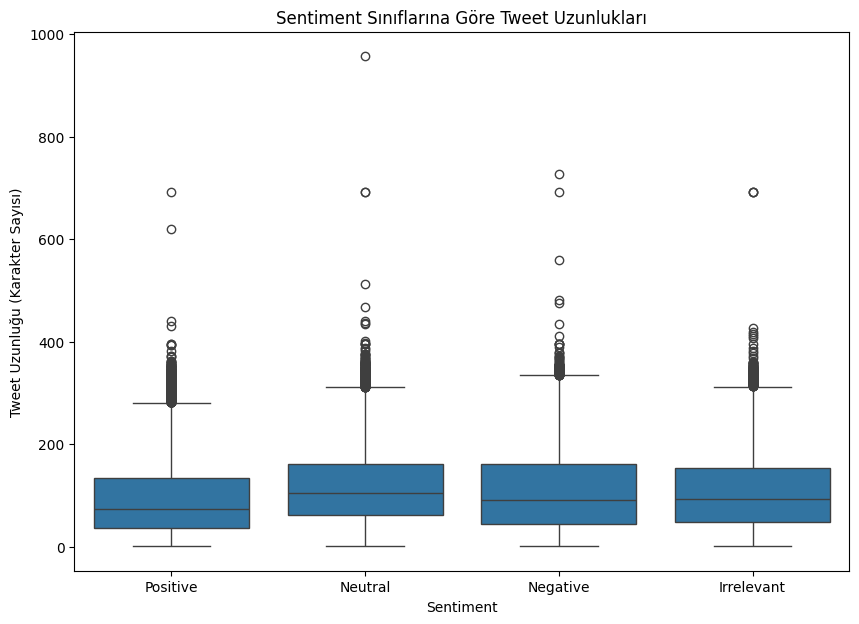


--- Sentiment Sınıflarına Göre Ortalama Tweet Uzunlukları ---
Sentiment
Irrelevant    110.521555
Negative      110.906353
Neutral       118.138771
Positive       95.527819
Name: tweet_length, dtype: float64


In [ ]:
if main_df is not None and text_column_name in main_df.columns and sentiment_column_name in main_df.columns:
    
    if 'tweet_length' not in main_df.columns:
         main_df['tweet_length'] = main_df[text_column_name].astype(str).apply(len)

    plt.figure(figsize=(10, 7))
    sns.boxplot(x=sentiment_column_name, y='tweet_length', data=main_df)
    plt.title('Sentiment Sınıflarına Göre Tweet Uzunlukları')
    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Uzunluğu (Karakter Sayısı)')
    plt.show()

    
    print("\n--- Sentiment Sınıflarına Göre Ortalama Tweet Uzunlukları ---")
    print(main_df.groupby(sentiment_column_name)['tweet_length'].mean())

In [ ]:
if main_df is not None:
    subset_cols_for_duplicates = [text_column_name, entity_column_name, sentiment_column_name]
    
    if all(col in main_df.columns for col in subset_cols_for_duplicates if col):
        num_duplicates = main_df.duplicated(subset=subset_cols_for_duplicates, keep=False).sum()
        print(f"\n--- Belirtilen sütunlara göre duplike satır sayısı (tüm kopyalar sayılır): {num_duplicates} ---")
        if num_duplicates > 0:
            print("Duplike satırlardan örnekler:")
            print(main_df[main_df.duplicated(subset=subset_cols_for_duplicates, keep=False)].sort_values(by=subset_cols_for_duplicates).head())
            
    else:
        print("Duplike kontrolü için belirtilen sütunlardan bazıları veri setinde bulunamadı.")


--- Belirtilen sütunlara göre duplike satır sayısı (tüm kopyalar sayılır): 6075 ---
Duplike satırlardan örnekler:
       id  Entity   Sentiment tweet  tweet_length
6011  235  Amazon  Irrelevant                   1
6581  333  Amazon  Irrelevant                   1
4751   16  Amazon     Neutral                   1
4865   37  Amazon     Neutral                   1
4895   42  Amazon     Neutral                   1


### Entity nin tweette olmadığı durumlar

In [ ]:
def check_entity_in_text(row, text_col, entity_col):
    tweet_text = str(row[text_col]).lower() if pd.notna(row[text_col]) else ""
    entity = str(row[entity_col]).lower() if pd.notna(row[entity_col]) else ""
    if not entity:
        return pd.NA 
    return entity in tweet_text

if main_df is not None and text_column_name in main_df.columns and entity_column_name in main_df.columns:
    main_df['entity_in_text'] = main_df.apply(lambda row: check_entity_in_text(row, text_column_name, entity_column_name), axis=1)
    
    
    if 'entity_in_text' in main_df.columns and main_df['entity_in_text'].notna().any():
        print("\n--- Entity'nin Tweet Metninde Geçme Durumu ---")
        print(main_df['entity_in_text'].value_counts(dropna=False)) 
        
        # Entity'nin metinde GEÇMEDİĞİ örneklere bakalım
        mismatched_samples = main_df[main_df['entity_in_text'] == False].head()
        if not mismatched_samples.empty:
            print("\n--- Entity'nin Metinde GEÇMEDİĞİ Örnekler ---")
            for index, row in mismatched_samples.iterrows():
                print(f"  Tweet: {row[text_column_name]}")
                print(f"  Entity: {row[entity_column_name]}\n")
    else:
        print("Entity'nin metinde geçme durumu kontrol edilemedi veya sonuç üretmedi.")


--- Entity'nin Tweet Metninde Geçme Durumu ---
entity_in_text
False    52746
True     21935
Name: count, dtype: int64

--- Entity'nin Metinde GEÇMEDİĞİ Örnekler ---
  Tweet: I am coming to the borders and I will kill you all,
  Entity: Borderlands

  Tweet: So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
  Entity: Borderlands

  Tweet: 2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
  Entity: Borderlands

  Tweet: was
  Entity: Borderlands

  Tweet: The biggest disappointment of my life came a year ago.
  Entity: Bor

### Entity nin textte geçip geçmediği örnekleri ayrıştırmak için öznitelik oluşturuldu

In [ ]:
import pandas as pd
import numpy as np

if main_df is not None and text_column_name in main_df.columns and entity_column_name in main_df.columns:

    def check_entity_in_text_robust(row, text_col, entity_col):
        tweet_text_val = row[text_col]
        entity_val = row[entity_col]

        
        if pd.isna(tweet_text_val) or not isinstance(tweet_text_val, str) or \
           pd.isna(entity_val) or not isinstance(entity_val, str) or not entity_val.strip():
            return np.nan 

        return entity_val.lower() in tweet_text_val.lower()

    # Yeni sütunu oluşturalım
    main_df['explicitly_contains_entity'] = main_df.apply(
        lambda row: check_entity_in_text_robust(row, text_column_name, entity_column_name),
        axis=1
    )

    print("\n--- 'explicitly_contains_entity' Sütunu Eklendi ve Değer Dağılımı ---")
    # True/False sayımları, np.nan değerleri de sayarak (eğer varsa)
    print(main_df['explicitly_contains_entity'].value_counts(dropna=False))

    # Oransal dağılım
    print("\nOransal Dağılım:")
    print(main_df['explicitly_contains_entity'].value_counts(normalize=True, dropna=False))


    print("\n--- Entity'nin Metinde GEÇTİĞİ Örnekler (True) ---")
    print(main_df[main_df['explicitly_contains_entity'] == True][[text_column_name, entity_column_name, 'explicitly_contains_entity']].head())

    print("\n--- Entity'nin Metinde GEÇMEDİĞİ Örnekler (False) ---")
    print(main_df[main_df['explicitly_contains_entity'] == False][[text_column_name, entity_column_name, 'explicitly_contains_entity']].head())
    
    if main_df['explicitly_contains_entity'].isna().any():
        print("\n--- 'explicitly_contains_entity' Sütununda NaN Değeri Olan Örnekler ---")
        print(main_df[main_df['explicitly_contains_entity'].isna()][[text_column_name, entity_column_name, 'explicitly_contains_entity']].head())

else:
    print("HATA: main_df yüklenemedi veya 'text_column_name' ya da 'entity_column_name' DataFrame'de bulunamadı.")
    print(f"Mevcut sütunlar: {main_df.columns.tolist() if main_df is not None else 'DataFrame yüklenemedi.'}")
    print(f"Kullanılan text_column_name: '{text_column_name}', entity_column_name: '{entity_column_name}'")


--- 'explicitly_contains_entity' Sütunu Eklendi ve Değer Dağılımı ---
explicitly_contains_entity
False    52060
True     21935
NaN        686
Name: count, dtype: int64

Oransal Dağılım:
explicitly_contains_entity
False    0.697098
True     0.293716
NaN      0.009186
Name: proportion, dtype: float64

--- Entity'nin Metinde GEÇTİĞİ Örnekler (True) ---
                                               tweet       Entity  \
1  im getting on borderlands and i will kill you ...  Borderlands   
2  im coming on borderlands and i will murder you...  Borderlands   
3  im getting on borderlands 2 and i will murder ...  Borderlands   
4  im getting into borderlands and i can murder y...  Borderlands   
5  So I spent a few hours making something for fu...  Borderlands   

  explicitly_contains_entity  
1                       True  
2                       True  
3                       True  
4                       True  
5                       True  

--- Entity'nin Metinde GEÇMEDİĞİ Örnekler (Fa

### Sentimentin entity içeren ve içermeyen textlerde dağılımı

--- Entity'nin Metinde Geçip Geçmemesine Göre Sentiment Oranları (%) ---
Sentiment                   Irrelevant   Negative    Neutral   Positive
explicitly_contains_entity                                             
False                        19.396850  26.342682  23.933922  30.326546
True                         12.660132  39.407340  25.748803  22.183725


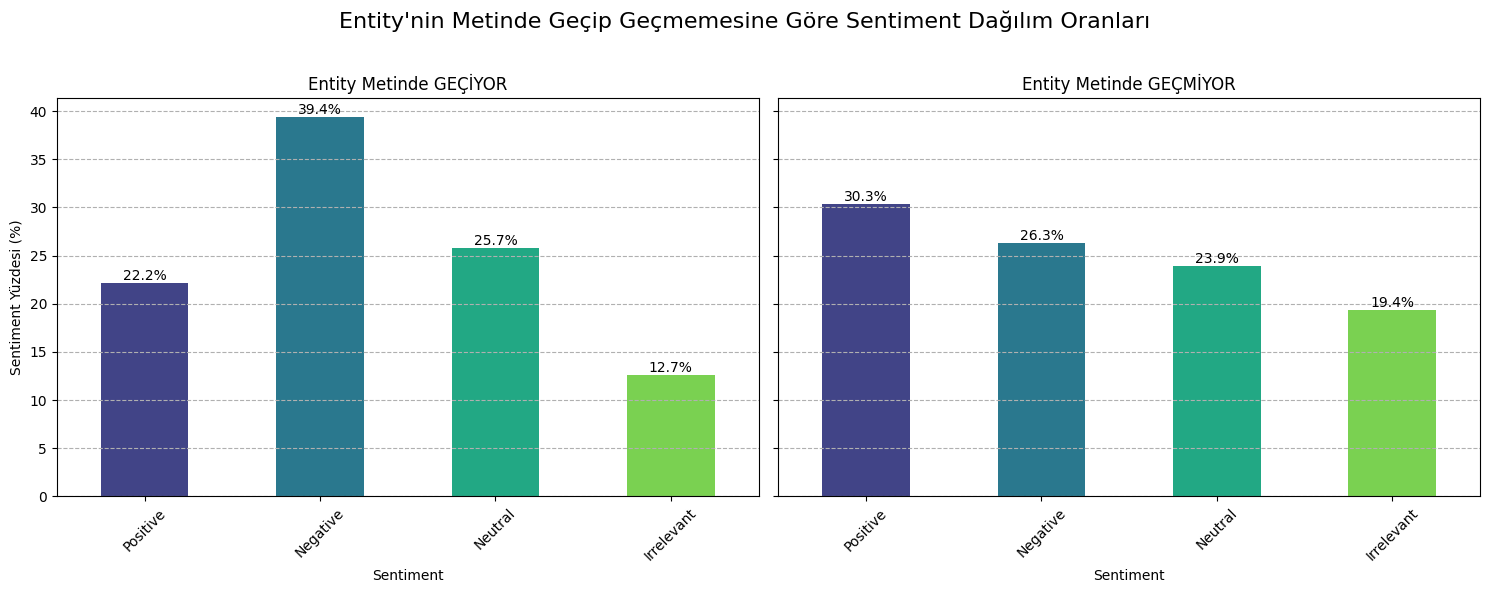

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if main_df is not None and 'explicitly_contains_entity' in main_df.columns and sentiment_column_name in main_df.columns:

    df_filtered_for_plot = main_df[main_df['explicitly_contains_entity'].notna()].copy()

    if not df_filtered_for_plot.empty:
        
        grouped_counts = df_filtered_for_plot.groupby(['explicitly_contains_entity', sentiment_column_name]).size().unstack(fill_value=0)

        grouped_proportions = grouped_counts.apply(lambda x: x / x.sum() * 100, axis=1)

        print("--- Entity'nin Metinde Geçip Geçmemesine Göre Sentiment Oranları (%) ---")
        print(grouped_proportions)

        fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True) 
        fig.suptitle("Entity'nin Metinde Geçip Geçmemesine Göre Sentiment Dağılım Oranları", fontsize=16)

        sentiment_order = ['Positive', 'Negative', 'Neutral', 'Irrelevant'] 
        
        available_sentiments_in_data = grouped_proportions.columns.tolist()
        ordered_columns = [s for s in sentiment_order if s in available_sentiments_in_data]
        for s_col in available_sentiments_in_data: 
            if s_col not in ordered_columns:
                ordered_columns.append(s_col)
        
        grouped_proportions = grouped_proportions.reindex(columns=ordered_columns, fill_value=0)


        try:
            colors = sns.color_palette("viridis", n_colors=len(grouped_proportions.columns))
        except Exception: 
            colors = None


        # 1. Grafik: Entity Metinde GEÇİYOR (True)
        if True in grouped_proportions.index:
            grouped_proportions.loc[True].plot(kind='bar', ax=axes[0], color=colors)
            axes[0].set_title('Entity Metinde GEÇİYOR')
            axes[0].set_ylabel('Sentiment Yüzdesi (%)')
            axes[0].set_xlabel('Sentiment')
            axes[0].tick_params(axis='x', rotation=45)
            axes[0].grid(axis='y', linestyle='--')
            for p in axes[0].patches: 
                axes[0].annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        else:
            axes[0].text(0.5, 0.5, 'Veri Yok (True durumu için)', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
            axes[0].set_title('Entity Metinde GEÇİYOR')


        # 2. Grafik: Entity Metinde GEÇMİYOR (False)
        if False in grouped_proportions.index:
            grouped_proportions.loc[False].plot(kind='bar', ax=axes[1], color=colors)
            axes[1].set_title('Entity Metinde GEÇMİYOR')
            axes[1].set_xlabel('Sentiment')
            axes[1].tick_params(axis='x', rotation=45)
            axes[1].grid(axis='y', linestyle='--')
            for p in axes[1].patches:
                axes[1].annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        else:
            axes[1].text(0.5, 0.5, 'Veri Yok (False durumu için)', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
            axes[1].set_title('Entity Metinde GEÇMİYOR')


        plt.tight_layout(rect=[0, 0, 1, 0.96]) 
        plt.show()

    else:
        print("Grafik çizimi için yeterli veri bulunamadı ('explicitly_contains_entity' True/False değerleri yok).")
else:
    print("HATA: main_df yüklenemedi veya gerekli sütunlar ('explicitly_contains_entity', sentiment_column_name) bulunamadı.")

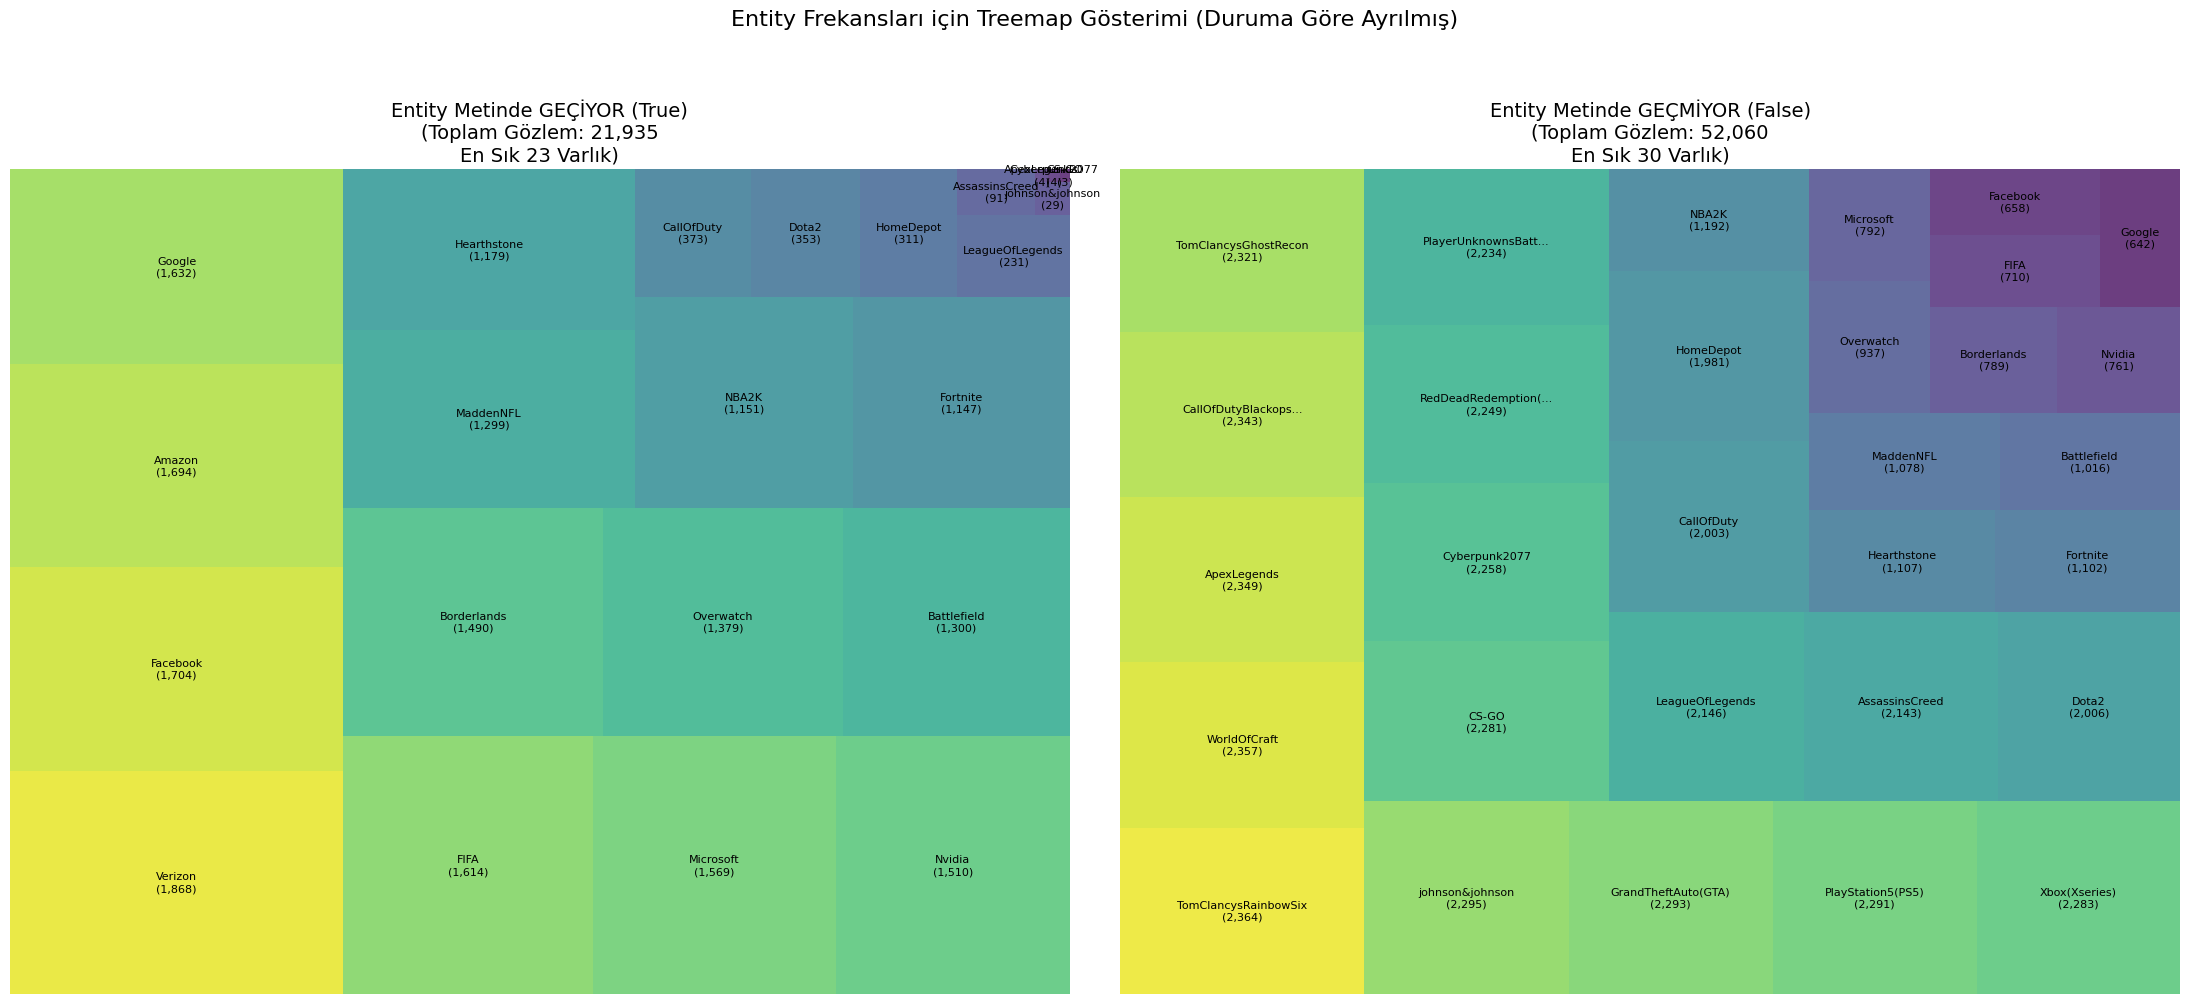

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns 

if main_df is not None and 'explicitly_contains_entity' in main_df.columns and entity_column_name in main_df.columns:

    df_filtered = main_df[main_df['explicitly_contains_entity'].notna()].copy()

    if not df_filtered.empty:
        conditions = {
            "Entity Metinde GEÇİYOR (True)": True,
            "Entity Metinde GEÇMİYOR (False)": False
        }

        fig, axes = plt.subplots(1, 2, figsize=(22, 10)) 
        fig.suptitle("Entity Frekansları için Treemap Gösterimi (Duruma Göre Ayrılmış)", fontsize=16, y=1.0) 

        plot_index = 0
        for title_prefix, condition_value in conditions.items():
            ax = axes[plot_index]
            subset_df = df_filtered[df_filtered['explicitly_contains_entity'] == condition_value]

            if not subset_df.empty:
                
                entity_counts_for_subset = subset_df[entity_column_name].value_counts()
                
                top_n_entities_to_display = 30 
                entity_counts_for_plot = entity_counts_for_subset.nlargest(top_n_entities_to_display)
                
                
                if not entity_counts_for_plot.empty:
                    
                    labels = []
                    for name, count in entity_counts_for_plot.items():
                        display_name = str(name)
                        if len(display_name) > 20: 
                            display_name = display_name[:18] + "..."
                        labels.append(f"{display_name}\n({count:,})")

                    try:
                        colors = sns.color_palette("viridis_r", n_colors=len(entity_counts_for_plot))
                    except Exception:
                        colors = sns.color_palette(n_colors=len(entity_counts_for_plot))


                    squarify.plot(sizes=entity_counts_for_plot.values,
                                  label=labels,
                                  alpha=0.8,
                                  ax=ax,
                                  color=colors,
                                  text_kwargs={'fontsize':8, 'wrap': True}) 
                    ax.set_title(f"{title_prefix}\n(Toplam Gözlem: {subset_df.shape[0]:,}\nEn Sık {len(entity_counts_for_plot)} Varlık)", fontsize=14)
                else:
                    ax.text(0.5, 0.5, 'Bu koşul için gösterilecek\nentity verisi yok.',
                            horizontalalignment='center', verticalalignment='center',
                            transform=ax.transAxes, fontsize=12, color='grey')
                    ax.set_title(f"{title_prefix}\n(Toplam Gözlem: {subset_df.shape[0]:,})", fontsize=14)
            else:
                ax.text(0.5, 0.5, 'Bu koşul için veri yok.',
                        horizontalalignment='center', verticalalignment='center',
                        transform=ax.transAxes, fontsize=12, color='grey')
                ax.set_title(title_prefix, fontsize=14)
            
            ax.axis('off')
            plot_index += 1
        
        if plot_index < len(axes):
            for i in range(plot_index, len(axes)):
                fig.delaxes(axes[i])

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    else:
        print("Treemap çizimi için yeterli veri bulunamadı ('explicitly_contains_entity' True/False değerleri yok).")
else:
    print("HATA: main_df yüklenemedi veya gerekli sütunlar ('explicitly_contains_entity', entity_column_name) bulunamadı.")

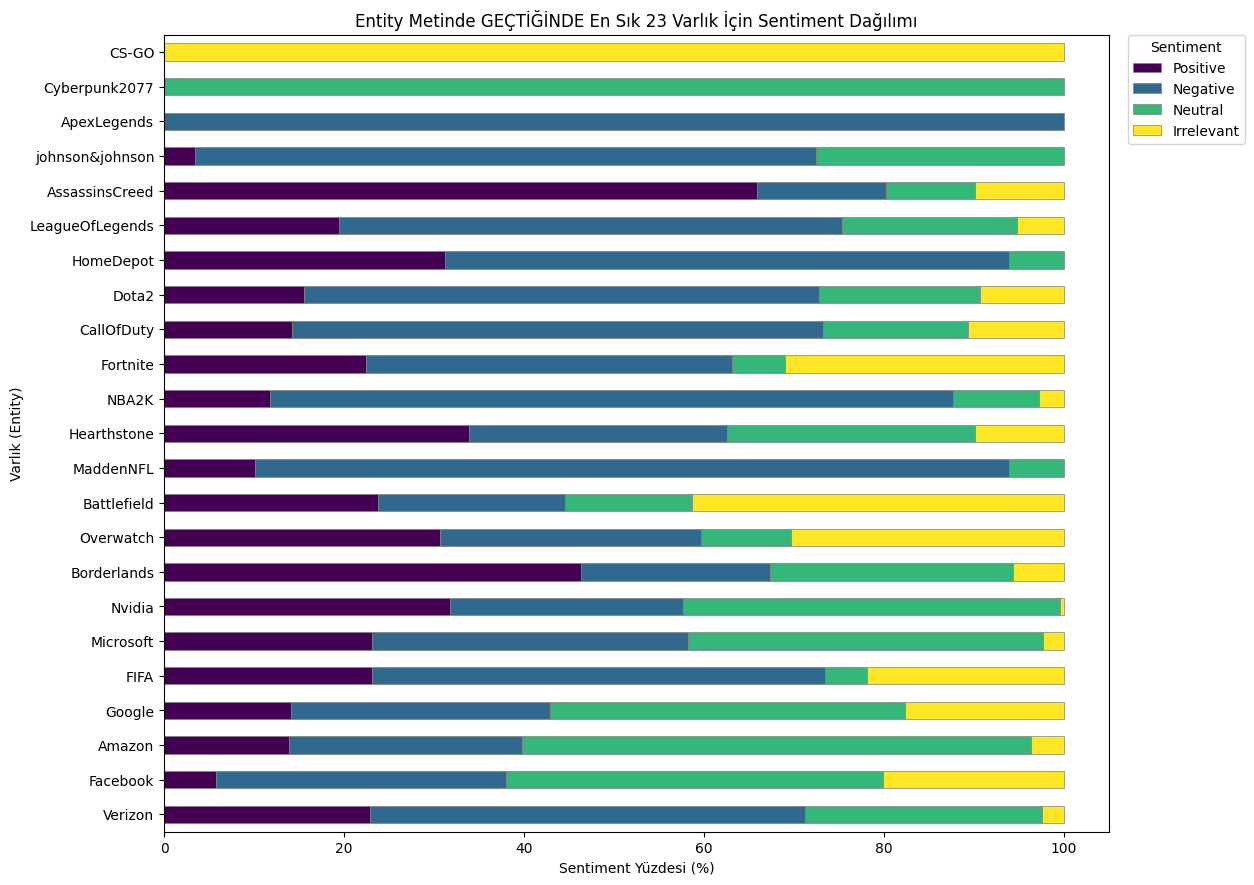


--- Entity Metinde GEÇTİĞİNDE En Sık 23 Varlık İçin Sentiment Sayıları (İlk 5'i) ---
Sentiment  Positive  Negative  Neutral  Irrelevant
Entity                                            
Verizon         427       904      491          46
Facebook         98       549      714         343
Amazon          236       437      959          62
Google          231       469      643         289
FIFA            373       813       75         353

--- Entity Metinde GEÇTİĞİNDE En Sık 23 Varlık İçin Sentiment Oranları (%) (İlk 5'i) ---
Sentiment   Positive   Negative    Neutral  Irrelevant
Entity                                                
Verizon    22.858672  48.394004  26.284797    2.462527
Facebook    5.751174  32.218310  41.901408   20.129108
Amazon     13.931523  25.796930  56.611570    3.659976
Google     14.154412  28.737745  39.399510   17.708333
FIFA       23.110285  50.371747   4.646840   21.871128


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

entity_column_name = 'Entity'
sentiment_column_name = 'Sentiment'

if (main_df is not None and
    'explicitly_contains_entity' in main_df.columns and
    entity_column_name in main_df.columns and
    sentiment_column_name in main_df.columns):

    # 1. Adım: Veri setini 'explicitly_contains_entity == True' durumuna göre filtrele
    df_explicitly_true = main_df[main_df['explicitly_contains_entity'] == True].copy() 

    if not df_explicitly_true.empty:
        # 2. Adım: Bu filtrelenmiş veri setindeki en sık N varlığı seç
        top_n_for_plot = 25 
        
        if df_explicitly_true[entity_column_name].nunique() == 0:
            print(f"'explicitly_contains_entity == True' durumu için hiç varlık bulunamadı.")
        else:
            if df_explicitly_true[entity_column_name].nunique() < top_n_for_plot:
                top_n_for_plot = df_explicitly_true[entity_column_name].nunique()
            
            top_n_entities_list_true = df_explicitly_true[entity_column_name].value_counts().nlargest(top_n_for_plot).index.tolist()

            filtered_df_true = df_explicitly_true[df_explicitly_true[entity_column_name].isin(top_n_entities_list_true)]

            if not filtered_df_true.empty:
                
                entity_sentiment_counts_true = filtered_df_true.groupby([entity_column_name, sentiment_column_name]).size().unstack(fill_value=0)

                sentiment_order = ['Positive', 'Negative', 'Neutral', 'Irrelevant']
                available_sentiments_in_data = entity_sentiment_counts_true.columns.tolist()
                ordered_columns = [s for s in sentiment_order if s in available_sentiments_in_data]
                for s_col in available_sentiments_in_data:
                    if s_col not in ordered_columns:
                        ordered_columns.append(s_col)
                entity_sentiment_counts_true = entity_sentiment_counts_true.reindex(columns=ordered_columns, fill_value=0)

                entity_sentiment_proportions_true = entity_sentiment_counts_true.apply(lambda x: x / x.sum() * 100, axis=1)
                
                entity_sentiment_proportions_true = entity_sentiment_proportions_true.reindex(top_n_entities_list_true)

                fig_height = max(8, top_n_for_plot * 0.45)
                ax = entity_sentiment_proportions_true.plot(kind='barh', stacked=True, figsize=(14, fig_height), colormap='viridis', linewidth=0.5, edgecolor='grey')
                
                plt.title(f'Entity Metinde GEÇTİĞİNDE En Sık {top_n_for_plot} Varlık İçin Sentiment Dağılımı')
                plt.xlabel('Sentiment Yüzdesi (%)')
                plt.ylabel('Varlık (Entity)')
                plt.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
                plt.subplots_adjust(right=0.80)
                plt.show()

                print(f"\n--- Entity Metinde GEÇTİĞİNDE En Sık {top_n_for_plot} Varlık İçin Sentiment Sayıları (İlk 5'i) ---")
                print(entity_sentiment_counts_true.reindex(top_n_entities_list_true).head())
                print(f"\n--- Entity Metinde GEÇTİĞİNDE En Sık {top_n_for_plot} Varlık İçin Sentiment Oranları (%) (İlk 5'i) ---")
                print(entity_sentiment_proportions_true.head())
            else:
                print(f"'explicitly_contains_entity == True' durumu için en sık {top_n_for_plot} varlık filtrelendiğinde veri kalmadı.")
    else:
        print("'explicitly_contains_entity == True' durumu için hiç veri bulunamadı.")
else:
    print("HATA: main_df yüklenemedi veya gerekli sütunlar bulunamadı.")

In [33]:
%pip install "numpy<2.0.0" --upgrade
%pip install "spacy<3.6" "thinc<8.3" typing_extensions --upgrade
%python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.Collecting spacy<3.6
  Using cached spacy-3.5.4.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'



  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [530 lines of output]
        Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.11-cp312-cp312-win_amd64.whl.metadata (8.8 kB)
        Using cached preshed-3.0.10-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
        Using cached murmurhash-1.0.13-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
        Using cached thinc-8.1.12.tar.gz (190 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'done'
        Using cached numpy-2.3.1-

In [ ]:
%pip install stanza

  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.14.1-py3-none-any.whl (43 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
torchaudio 2.4.0 requires torch==2.4.0, but you have torch 2.7.1 which is incompatible.


In [ ]:
%pip install --pre stanza --upgrade
%pip install --upgrade typing_extensions


In [2]:
import re
import stanza
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim.models import KeyedVectors
from fuzzywuzzy import fuzz
import numpy as np

c:\Users\aslay\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [39]:
stanza.download('en')


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input = "glove.twitter.27B.200d.txt" 
w2v_output = "glove.twitter.27B.200d.word2vec.txt"

glove2word2vec(glove_input, w2v_output)

embedding = KeyedVectors.load_word2vec_format(w2v_output, binary=False)


C:\Users\aslay\AppData\Local\Temp\ipykernel_27444\3919154748.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input, w2v_output)


In [ ]:
import stanza

nlp = stanza.Pipeline(
    lang='en',
    processors='tokenize,pos,lemma,depparse',
    use_gpu=True,      
    verbose=False
)

doc = nlp("Turkcell service is blazing fast!")
for sent in doc.sentences:
    for w in sent.words:
        print(w.text, w.upos, w.deprel)

Turkcell PROPN compound
service NOUN nsubj
is AUX aux
blazing VERB root
fast ADJ xcomp
! PUNCT punct


### Featureların çıkarılmış hali ./datas/feature_Extracted_dataset.csv de var çok uzun sürdüğünden orda hazır olması gerektiğini düşündüm

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
sent_analyzer = SentimentIntensityAnalyzer()

def extract_features(tweet: str, entity: str) -> dict:
    
    if not isinstance(tweet, str) or not tweet.strip():
        return {"ctx_neg":0, "ctx_neu":1, "ctx_pos":0, "ctx_compound":0,
                "emb_sim":0, "fuzzy_max":0, "dep_tag":"", "pos_tag":""}

    # A) Stanza ile parse
    doc = nlp(tweet)
    tokens = [w.text for sent in doc.sentences for w in sent.words]

    # B) Context window sentiment
    try:
        idx = tokens.index(entity)
    except ValueError:
        idx = -1
    window = tokens[max(0, idx-3): idx] + tokens[idx+1: idx+4] if idx>=0 else []
    ctx_text = " ".join(window)
    ctx_sent = sent_analyzer.polarity_scores(ctx_text)

    # C) Embedding similarity
    vecs = [embedding[w] for w in tokens if w in embedding]
    if vecs:
        tweet_vec = np.mean(vecs, axis=0)
        ent_vec = embedding[entity] if entity in embedding else np.zeros(embedding.vector_size)
        emb_sim = float(np.dot(tweet_vec, ent_vec) /
                        (np.linalg.norm(tweet_vec)*np.linalg.norm(ent_vec) + 1e-8))
    else:
        emb_sim = 0.0

    # D) Fuzzy match
    fuzzy_max = max((fuzz.partial_ratio(entity, w) for w in tokens), default=0)

    # E) Dependency & POS
    dep_tag, pos_tag = "", ""
    for sent in doc.sentences:
        for w in sent.words:
            if w.text.lower() == entity.lower():
                dep_tag = w.deprel
                pos_tag = w.upos
                break
        if dep_tag:
            break

    # Sonuç sözlüğü
    return {
        "ctx_neg": ctx_sent["neg"],
        "ctx_neu": ctx_sent["neu"],
        "ctx_pos": ctx_sent["pos"],
        "ctx_compound": ctx_sent["compound"],
        "emb_sim": emb_sim,
        "fuzzy_max": fuzzy_max,
        "dep_tag": dep_tag,
        "pos_tag": pos_tag
    }

# Test
sample = "I had issues with the Turkcell service last night, but overall the speed was great!"
print(extract_features(sample, "Turkcell"))

NameError: name 'nlp' is not defined

In [43]:
sample = "I had issues with the Turkcell service last night, but overall the speed was great!"
print(extract_features(sample, "Turkcell"))

{'ctx_neg': 0.0, 'ctx_neu': 1.0, 'ctx_pos': 0.0, 'ctx_compound': 0.0, 'emb_sim': 0.0, 'fuzzy_max': 100, 'dep_tag': 'compound', 'pos_tag': 'PROPN'}


In [44]:
main_df

,id,Entity,Sentiment,tweet,tweet_length,entity_in_text,explicitly_contains_entity
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,False,False
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,True,True
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,True,True
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,True,True
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,True,True
...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128,True,True
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117,True,True
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,127,True,True
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,161,True,True


In [45]:
import pandas as pd

# Boş tweet veya entity içeren satırları at
df_nonull = main_df.dropna(subset=[text_column_name, entity_column_name]).reset_index(drop=True).copy()

# Feature extraction sonuçlarını toplayacağımız liste
features_list = []

# Döngü ile ilerle ve her 5000'de bir mesaj yazdır
for i, row in enumerate(df_nonull.itertuples(index=False), start=1):
    feats = extract_features(getattr(row, text_column_name),
                             getattr(row, entity_column_name))
    features_list.append(feats)
    
    if i % 100 == 0:
        print(f"{i} tweet işlendi.")

# DataFrame’e dönüştür ve birleştir
feature_dicts = pd.DataFrame(features_list)
df_feat = pd.concat([df_nonull, feature_dicts], axis=1)

# Kontrol
print(f"Toplam işlenen satır: {len(df_feat)}")
df_feat.head()


100 tweet işlendi.
200 tweet işlendi.
300 tweet işlendi.
400 tweet işlendi.
500 tweet işlendi.
600 tweet işlendi.
700 tweet işlendi.
800 tweet işlendi.
900 tweet işlendi.
1000 tweet işlendi.
1100 tweet işlendi.
1200 tweet işlendi.
1300 tweet işlendi.
1400 tweet işlendi.
1500 tweet işlendi.
1600 tweet işlendi.
1700 tweet işlendi.
1800 tweet işlendi.
1900 tweet işlendi.
2000 tweet işlendi.
2100 tweet işlendi.
2200 tweet işlendi.
2300 tweet işlendi.
2400 tweet işlendi.
2500 tweet işlendi.
2600 tweet işlendi.
2700 tweet işlendi.
2800 tweet işlendi.
2900 tweet işlendi.
3000 tweet işlendi.
3100 tweet işlendi.
3200 tweet işlendi.
3300 tweet işlendi.
3400 tweet işlendi.
3500 tweet işlendi.
3600 tweet işlendi.
3700 tweet işlendi.
3800 tweet işlendi.
3900 tweet işlendi.
4000 tweet işlendi.
4100 tweet işlendi.
4200 tweet işlendi.
4300 tweet işlendi.
4400 tweet işlendi.
4500 tweet işlendi.
4600 tweet işlendi.
4700 tweet işlendi.
4800 tweet işlendi.
4900 tweet işlendi.
5000 tweet işlendi.
5100 twee

,id,Entity,Sentiment,tweet,tweet_length,entity_in_text,explicitly_contains_entity,ctx_neg,ctx_neu,ctx_pos,ctx_compound,emb_sim,fuzzy_max,dep_tag,pos_tag
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,False,False,0.0,0.0,0.0,0.0,0.0,100,,
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN


In [46]:
df_feat.head()

,id,Entity,Sentiment,tweet,tweet_length,entity_in_text,explicitly_contains_entity,ctx_neg,ctx_neu,ctx_pos,ctx_compound,emb_sim,fuzzy_max,dep_tag,pos_tag
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,False,False,0.0,0.0,0.0,0.0,0.0,100,,
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53,True,True,0.0,0.0,0.0,0.0,0.0,100,obl,NOUN


In [47]:
df_feat.to_csv('datas/feature_extracted_dataset.csv', index=False, encoding='utf-8-sig')

In [ ]:
main_df = df_feat.copy() # ÖNEMLİ !!!!

In [6]:
import torch

## 1.Yöntem

In [ ]:
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

# Gerekli NLTK kaynaklarını indirme (stopwords ve punkt)
required_nltk_resources = {
    'stopwords': ('corpora/stopwords', False), 
    'punkt': ('tokenizers/punkt', True)   
}

all_resources_available = True
print("NLTK kaynakları kontrol ediliyor/indiriliyor...")
for resource_name, (resource_path, force_download) in required_nltk_resources.items():
    try:
        nltk.data.find(resource_path)
        print(f"NLTK kaynağı '{resource_name}' zaten mevcut.")
    except LookupError:
        print(f"NLTK kaynağı '{resource_name}' bulunamadı, indiriliyor (force={force_download})...")
        try:
            nltk.download(resource_name, force=force_download, quiet=True)
            nltk.data.find(resource_path) 
            print(f"NLTK kaynağı '{resource_name}' başarıyla indirildi ve bulundu.")
        except Exception as e:
            print(f"NLTK kaynağı '{resource_name}' indirilirken/bulunurken bir hata oluştu: {e}")
            all_resources_available = False
            break

if all_resources_available:
    from nltk.corpus import stopwords
    print("\nTüm gerekli NLTK kaynakları (stopwords, punkt) mevcut. Ön işleme başlıyor.")

    if 'main_df' not in globals() or main_df is None:
        print("HATA: main_df tanımlanmamış veya None. Lütfen DataFrame'i yükleyin.")
    elif 'text_column_name' not in globals() or not text_column_name:
        print("HATA: text_column_name tanımlanmamış. Lütfen metin sütununun adını belirtin.")
    elif text_column_name not in main_df.columns:
        print(f"HATA: Belirtilen metin sütunu '{text_column_name}' main_df'de bulunamadı.")
    else:
        stemmer_obj = PorterStemmer()
        stop_words_list = set(stopwords.words('english'))

        def preprocess_text_with_stemmer_lang(text):
            if not isinstance(text, str):
                return ""
            
            text = text.lower()
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
            text = re.sub(r'\@\w+', '', text)
            text = re.sub(r'#\w+', '', text) 
            text = re.sub(r'[^a-z\s]', '', text)
            
            try:
                sentences = sent_tokenize(text, language='english')
                tokens = []
                for sentence in sentences:
                    tokens.extend(word_tokenize(sentence, language='english'))
            except Exception as e_tok:
                tokens = text.split()

            processed_tokens = [stemmer_obj.stem(word) for word in tokens if word not in stop_words_list and len(word) > 2]
            
            return " ".join(processed_tokens)

        print(f"'{text_column_name}' sütunu için metin ön işleme (PorterStemmer ve dil belirtilerek) başlıyor...")
        try:
            main_df['processed_text'] = main_df[text_column_name].astype(str).apply(preprocess_text_with_stemmer_lang)
            print("Metin ön işleme tamamlandı.")

            print("\n--- İşlenmiş Metin Örnekleri ---")
            for i in range(min(5, len(main_df))):
                if i < len(main_df) and text_column_name in main_df.columns and 'processed_text' in main_df.columns:
                    print(f"Orijinal: {main_df[text_column_name].iloc[i]}")
                    print(f"İşlenmiş: {main_df['processed_text'].iloc[i]}")
                    print("-" * 20)
                else:
                    break 
        except Exception as e_apply_full:
            print(f"DataFrame apply işlemi sırasında genel bir hata oluştu: {e_apply_full}")
            import traceback
            traceback.print_exc()
else:
    print("\nBazı NLTK kaynakları (stopwords, punkt) yüklenemediği için ön işleme adımı atlanıyor.")

NLTK kaynakları kontrol ediliyor/indiriliyor...
NLTK kaynağı 'stopwords' zaten mevcut.
NLTK kaynağı 'punkt' zaten mevcut.

Tüm gerekli NLTK kaynakları (stopwords, punkt) mevcut. Ön işleme başlıyor.
'tweet' sütunu için metin ön işleme (PorterStemmer ve dil belirtilerek) başlıyor...
Metin ön işleme tamamlandı.

--- İşlenmiş Metin Örnekleri ---
Orijinal: I am coming to the borders and I will kill you all,
İşlenmiş: come border kill
--------------------
Orijinal: im getting on borderlands and i will kill you all,
İşlenmiş: get borderland kill
--------------------
Orijinal: im coming on borderlands and i will murder you all,
İşlenmiş: come borderland murder
--------------------
Orijinal: im getting on borderlands 2 and i will murder you me all,
İşlenmiş: get borderland murder
--------------------
Orijinal: im getting into borderlands and i can murder you all,
İşlenmiş: get borderland murder
--------------------


In [62]:
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np

# 1) TF-IDF Vektörleri
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(main_df['processed_text'])
print(f"TF-IDF boyut: {tfidf_features.shape}")

# 2) Explicit entity özniteliği
explicit_entity = main_df['explicitly_contains_entity']\
    .fillna(False).astype(int)\
    .values.reshape(-1, 1)
print(f"Explicit entity boyut: {explicit_entity.shape}")

# 3) Numerik öznitelikler
num_cols = ['ctx_neg','ctx_neu','ctx_pos','ctx_compound','emb_sim','fuzzy_max']
numeric_array = main_df[num_cols].fillna(0).values
numeric_sparse = sparse.csr_matrix(numeric_array)
print(f"Numerik öznitelikler boyut: {numeric_sparse.shape}")

# 4) Tüm öznitelikleri birleştirme
all_features = hstack([
    tfidf_features,
    explicit_entity,
    numeric_sparse
])
print(f"Nihai öznitelik matrisi boyut: {all_features.shape}")

# 5) Hedef değişken
Y = main_df[sentiment_column_name]
print(f"Hedef değişken boyut: {Y.shape}")


TF-IDF boyut: (73995, 5000)
Explicit entity boyut: (73995, 1)
Numerik öznitelikler boyut: (73995, 6)
Nihai öznitelik matrisi boyut: (73995, 5007)
Hedef değişken boyut: (73995,)


C:\Users\aslay\AppData\Local\Temp\ipykernel_27444\1822457513.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False).astype(int)\


In [64]:
all_features

<73995x5007 sparse matrix of type '<class 'numpy.float64'>'
	with 747724 stored elements in COOrdinate format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack 
import numpy as np

if 'main_df' in globals() and main_df is not None and 'processed_text' in main_df.columns and 'explicitly_contains_entity' in main_df.columns:
    print("Öznitelik mühendisliği başlıyor...")

    tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, ngram_range=(1,1)) 

    try:
        tfidf_features = tfidf_vectorizer.fit_transform(main_df['processed_text'])
        print(f"TF-IDF öznitelikleri oluşturuldu. Boyut: {tfidf_features.shape}")
    except Exception as e:
        print(f"TF-IDF oluşturulurken hata: {e}")
        tfidf_features = None

    if tfidf_features is not None:
        explicit_entity_feature = main_df['explicitly_contains_entity'].fillna(False).astype(int)
        explicit_entity_feature_reshaped = explicit_entity_feature.values.reshape(-1, 1)
        print(f"'explicitly_contains_entity' özniteliği hazırlandı. Boyut: {explicit_entity_feature_reshaped.shape}")

        try:

            all_features = hstack([tfidf_features, explicit_entity_feature_reshaped])
            print(f"Tüm öznitelikler birleştirildi. Nihai öznitelik matrisi boyutu: {all_features.shape}")

            if sentiment_column_name in main_df.columns:
                Y = main_df[sentiment_column_name]
                print(f"Hedef değişken (Y) '{sentiment_column_name}' sütunundan alındı. Boyut: {Y.shape}")
                
            else:
                print(f"HATA: Hedef değişken için '{sentiment_column_name}' sütunu bulunamadı.")
                Y = None
                all_features = None 
        
        except Exception as e:
            print(f"Öznitelikler birleştirilirken hata: {e}")
            all_features = None
            Y = None
            
else:
    print("HATA: 'main_df', 'processed_text' veya 'explicitly_contains_entity' sütunları bulunamadı veya tanımlanmamış.")

Öznitelik mühendisliği başlıyor...
TF-IDF öznitelikleri oluşturuldu. Boyut: (73995, 5000)
'explicitly_contains_entity' özniteliği hazırlandı. Boyut: (73995, 1)
Tüm öznitelikler birleştirildi. Nihai öznitelik matrisi boyutu: (73995, 5001)
Hedef değişken (Y) 'Sentiment' sütunundan alındı. Boyut: (73995,)


C:\Users\aslay\AppData\Local\Temp\ipykernel_27444\2151405133.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  explicit_entity_feature = main_df['explicitly_contains_entity'].fillna(False).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

if 'all_features' in globals() and all_features is not None and 'Y' in globals() and Y is not None:
    print("Veri bölütleme işlemi başlıyor...")

    X_temp, X_test, y_temp, y_test = train_test_split(
        all_features, Y,
        test_size=0.20,    
        random_state=42,  
        stratify=Y         
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=0.25,    
        random_state=42,   
        stratify=y_temp   
    )

    print("\nVeri Bölütleme Tamamlandı.")
    print(f"Eğitim seti (X_train) boyutu: {X_train.shape}")
    print(f"Eğitim seti etiketleri (y_train) boyutu: {y_train.shape}")
    print(f"Doğrulama seti (X_val) boyutu: {X_val.shape}")
    print(f"Doğrulama seti etiketleri (y_val) boyutu: {y_val.shape}")
    print(f"Test seti (X_test) boyutu: {X_test.shape}")
    print(f"Test seti etiketleri (y_test) boyutu: {y_test.shape}")

    print("\nEğitim Setindeki Sınıf Dağılımı:")
    print(y_train.value_counts(normalize=True))
    print("\nDoğrulama Setindeki Sınıf Dağılımı:")
    print(y_val.value_counts(normalize=True))
    print("\nTest Setindeki Sınıf Dağılımı:")
    print(y_test.value_counts(normalize=True))

else:
    print("HATA: 'all_features' veya 'Y' öznitelik matrisleri bulunamadı veya tanımlanmamış.")

Veri bölütleme işlemi başlıyor...

Veri Bölütleme Tamamlandı.
Eğitim seti (X_train) boyutu: (44397, 5007)
Eğitim seti etiketleri (y_train) boyutu: (44397,)
Doğrulama seti (X_val) boyutu: (14799, 5007)
Doğrulama seti etiketleri (y_val) boyutu: (14799,)
Test seti (X_test) boyutu: (14799, 5007)
Test seti etiketleri (y_test) boyutu: (14799,)

Eğitim Setindeki Sınıf Dağılımı:
Sentiment
Negative      0.302160
Positive      0.279118
Neutral       0.244724
Irrelevant    0.173998
Name: proportion, dtype: float64

Doğrulama Setindeki Sınıf Dağılımı:
Sentiment
Negative      0.302115
Positive      0.279140
Neutral       0.244746
Irrelevant    0.173998
Name: proportion, dtype: float64

Test Setindeki Sınıf Dağılımı:
Sentiment
Negative      0.302183
Positive      0.279140
Neutral       0.244679
Irrelevant    0.173998
Name: proportion, dtype: float64


Sınıf Dengesizliği Yönetimi (SMOTE) ve MLP Eğitimi başlıyor...
SMOTE öncesi X_train boyutu: (44397, 5007), y_train boyutu: (44397,)
SMOTE öncesi y_train sınıf dağılımı:
Sentiment
Negative      0.302160
Positive      0.279118
Neutral       0.244724
Irrelevant    0.173998
Name: proportion, dtype: float64

SMOTE sonrası X_train_smote boyutu: (53660, 5007), y_train_smote boyutu: (53660,)
SMOTE sonrası y_train_smote sınıf dağılımı:
Sentiment
Positive      0.25
Irrelevant    0.25
Negative      0.25
Neutral       0.25
Name: proportion, dtype: float64

MLP Modeli oluşturuluyor...
MLP Modeli SMOTE uygulanmış eğitim verisi üzerinde eğitiliyor...
Iteration 1, loss = 1.26595854
Validation score: 0.556467
MLP Model eğitimi 4.61 saniyede tamamlandı.

--- Doğrulama Seti Üzerinde MLP Performansı ---
Doğruluk (Accuracy): 0.5615244273261707


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(



Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

  Irrelevant       0.46      0.42      0.44      2575
    Negative       0.70      0.63      0.66      4471
     Neutral       0.61      0.32      0.42      3622
    Positive       0.50      0.78      0.61      4131

    accuracy                           0.56     14799
   macro avg       0.57      0.54      0.53     14799
weighted avg       0.58      0.56      0.55     14799


Karışıklık Matrisi (Confusion Matrix):


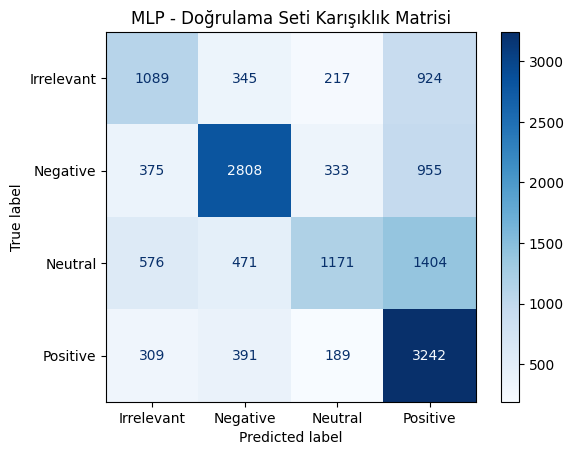

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import time 

if 'X_train' in globals() and 'y_train' in globals() and 'X_val' in globals() and 'y_val' in globals():
    print("Sınıf Dengesizliği Yönetimi (SMOTE) ve MLP Eğitimi başlıyor...")

    # 1. SMOTE Uygulaması (Sadece Eğitim Verisine)
    print(f"SMOTE öncesi X_train boyutu: {X_train.shape}, y_train boyutu: {y_train.shape}")
    print(f"SMOTE öncesi y_train sınıf dağılımı:\n{y_train.value_counts(normalize=True)}")
    
    # SMOTE'u seyrek matrislerle çalıştırmak için bazı kısıtlamalar olabilir.
    # Eğer X_train seyrekse ve SMOTE hata verirse, X_train.toarray() ile yoğun matrise çevirebiliriz,
    # ancak bu bellek sorunlarına yol açabilir. Çoğu imblearn versiyonu seyrek matrisleri destekler.
    try:
        smote = SMOTE(random_state=42, k_neighbors=4)
                                                  
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        
        print(f"\nSMOTE sonrası X_train_smote boyutu: {X_train_smote.shape}, y_train_smote boyutu: {y_train_smote.shape}")
        print(f"SMOTE sonrası y_train_smote sınıf dağılımı:\n{y_train_smote.value_counts(normalize=True)}")
    except ValueError as e:
        print(f"SMOTE uygulanırken ValueError: {e}")
        print("k_neighbors değerini y_train'deki en küçük sınıfın örnek sayısından daha küçük bir değere ayarlamayı deneyin.")
        print(f"y_train'deki en küçük sınıf örnek sayısı: {y_train.value_counts().min()}")
        X_train_smote, y_train_smote = X_train, y_train 
        print("\nUYARI: SMOTE uygulanamadı, orijinal eğitim verisiyle devam ediliyor.")


    # 2. MLP Modeli Oluşturma ve Eğitme
    # Bu başlangıç için basit bir MLP, hiperparametreleri daha sonra GridSearchCV ile optimize edeceğiz.
    print("\nMLP Modeli oluşturuluyor...")
    mlp_model = MLPClassifier(
        hidden_layer_sizes=(100, 50), 
        activation='relu',
        solver='adam',
        alpha=0.0001,                 
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=1,                 
        shuffle=True,
        random_state=42,
        early_stopping=True,          
        validation_fraction=0.1,      
        n_iter_no_change=10,          
        verbose=10                    
    )

    print("MLP Modeli SMOTE uygulanmış eğitim verisi üzerinde eğitiliyor...")
    start_time = time.time()
    try:
        mlp_model.fit(X_train_smote, y_train_smote)
        end_time = time.time()
        print(f"MLP Model eğitimi {end_time - start_time:.2f} saniyede tamamlandı.")

        # 3. Doğrulama Seti Üzerinde Performans Değerlendirmesi
        print("\n--- Doğrulama Seti Üzerinde MLP Performansı ---")
        y_pred_val = mlp_model.predict(X_val)
        
        print("Doğruluk (Accuracy):", accuracy_score(y_val, y_pred_val))
        print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_val, y_pred_val))

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_estimator(mlp_model, X_val, y_val, cmap=plt.cm.Blues)
            plt.title("MLP - Doğrulama Seti Karışıklık Matrisi")
            plt.show()
        except Exception as e_cm:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm}")
           
            from sklearn.metrics import confusion_matrix
            cm = confusion_matrix(y_val, y_pred_val, labels=mlp_model.classes_)
            print(cm)
            print(f"(Sınıflar: {mlp_model.classes_})")


    except Exception as e_fit:
        print(f"MLP modeli eğitilirken bir hata oluştu: {e_fit}")

else:
    print("HATA: Eğitim/Doğrulama kümeleri (X_train, y_train, X_val, y_val) bulunamadı.")

In [ ]:
import random

if 'best_mlp_model' in globals() and best_mlp_model is not None:
    model_to_test = best_mlp_model
    model_name = "En İyi MLP Modeli"
elif 'mlp_model' in globals() and mlp_model is not None:
    model_to_test = mlp_model
    model_name = "İlk MLP Modeli"
else:
    model_to_test = None
    model_name = "Model Yok"
    print("HATA: Test edilecek bir model bulunamadı (best_mlp_model veya mlp_model tanımlı değil).")

if model_to_test is not None and 'X_test' in globals() and X_test is not None and 'y_test' in globals() and y_test is not None:
    
    random_index = random.randint(0, X_test.shape[0] - 1)
    
    sample_features = X_test[random_index]  
    actual_label = y_test.iloc[random_index] 

    
    if sample_features.ndim == 1: 
        sample_features_reshaped = sample_features.reshape(1, -1)
    else: 
        sample_features_reshaped = sample_features

    predicted_label_proba = model_to_test.predict_proba(sample_features_reshaped)
    predicted_label = model_to_test.predict(sample_features_reshaped)[0]
    
    print(f"--- {model_name} ile Test Setinden Rastgele Bir Örnek ---")
    print(f"Seçilen Örnek İndeksi (Test Seti İçinde): {random_index}")
    
    print(f"\nGerçek Sentiment Etiketi: {actual_label}")
    print(f"Modelin Tahmin Ettiği Sentiment Etiketi: {predicted_label}")
    
    print("\nModelin Tahmin Olasılıkları:")
    
    if hasattr(model_to_test, 'classes_'):
        for i, class_name in enumerate(model_to_test.classes_):
            print(f"  {class_name}: {predicted_label_proba[0][i]:.4f}")
    else: 
        print(predicted_label_proba[0])

    if actual_label == predicted_label:
        print("\nSonuç: Model DOĞRU tahmin etti!")
    else:
        print("\nSonuç: Model YANLIŞ tahmin etti.")
        
    

    try:
        
        original_df_index = y_test.index[random_index]
        original_tweet_text = main_df.loc[original_df_index, text_column_name]
        original_entity = main_df.loc[original_df_index, entity_column_name]
        original_explicit_contains = main_df.loc[original_df_index, 'explicitly_contains_entity']
        processed_text_sample = main_df.loc[original_df_index, 'processed_text']


        print("\n--- Orijinal Veri Detayları (main_df'ten) ---")
        print(f"Orijinal İndeks (main_df): {original_df_index}")
        print(f"Orijinal Tweet: {original_tweet_text}")
        print(f"Orijinal Entity: {original_entity}")
        print(f"İşlenmiş Metin (Model Girdisi İçin Kullanılan): {processed_text_sample}")
        print(f"Entity Açıkça Geçiyor mu? (Öznitelik): {original_explicit_contains}")

    except Exception as e:
        print(f"\nOrijinal tweet metnini alırken bir sorun oluştu: {e}")
        print("Bu genellikle X_test'in indekslerinin orijinal main_df ile eşleşmemesinden kaynaklanır.")
        print("Eğer X_test bir numpy array ise, orijinal metni bu şekilde direkt çekemeyiz.")


else:
    print("HATA: Model veya test seti (X_test, y_test) bulunamadı.")

--- İlk MLP Modeli ile Test Setinden Rastgele Bir Örnek ---
Seçilen Örnek İndeksi (Test Seti İçinde): 7859

Gerçek Sentiment Etiketi: Positive
Modelin Tahmin Ettiği Sentiment Etiketi: Positive

Modelin Tahmin Olasılıkları:
  Irrelevant: 0.2760
  Negative: 0.1846
  Neutral: 0.2538
  Positive: 0.2856

Sonuç: Model DOĞRU tahmin etti!

--- Orijinal Veri Detayları (main_df'ten) ---
Orijinal İndeks (main_df): 50158
Orijinal Tweet: It is not the first time that the EU Commission has taken such a step.
Orijinal Entity: FIFA
İşlenmiş Metin (Model Girdisi İçin Kullanılan): first time commiss taken step
Entity Açıkça Geçiyor mu? (Öznitelik): False


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack 


if 'best_mlp_model' in globals() and best_mlp_model is not None:
    model_to_predict_with = best_mlp_model
    model_name_for_custom = "En İyi MLP Modeli"
elif 'mlp_model' in globals() and mlp_model is not None:
    model_to_predict_with = mlp_model
    model_name_for_custom = "İlk MLP Modeli"
else:
    model_to_predict_with = None
    model_name_for_custom = "Model Yok"
    print("HATA: Tahmin yapılacak bir model bulunamadı.")


if (model_to_predict_with is not None and
    'preprocess_text_with_stemmer' in globals() and
    'tfidf_vectorizer' in globals()):

    def predict_custom_tweet_sentiment(tweet_text, entity_text, model, vectorizer, preprocessor_func):
        # 1. Ön İşleme
        processed_tweet = preprocessor_func(tweet_text)
        print(f"Girilen Tweet: \"{tweet_text}\"")
        print(f"İşlenmiş Tweet: \"{processed_tweet}\"")
        print(f"Analiz Edilen Entity: \"{entity_text}\"")

        # 2. Entity Kontrolü
        # Büyük/küçük harf duyarsız kontrol
        contains_entity_flag = 1 if entity_text.lower() in tweet_text.lower() else 0
        print(f"Entity Metinde Açıkça Geçiyor mu?: {bool(contains_entity_flag)}")
        explicit_entity_feature_custom = np.array([[contains_entity_flag]]) # 2D array (1,1)

        # 3. TF-IDF Dönüşümü
        
        try:
            tfidf_features_custom = vectorizer.transform([processed_tweet])
            print(f"Özel tweet için TF-IDF özellikleri oluşturuldu. Boyut: {tfidf_features_custom.shape}")
        except Exception as e:
            print(f"Özel tweet için TF-IDF oluşturulurken hata: {e}")
            return None, None, None

        # 4. Öznitelik Birleştirme
        try:
            all_features_custom = hstack([tfidf_features_custom, explicit_entity_feature_custom])
            print(f"Özel tweet için birleştirilmiş öznitelik matrisi boyutu: {all_features_custom.shape}")
            
            if all_features_custom.shape[1] != model.n_features_in_:
                 print(f"UYARI: Oluşturulan öznitelik sayısı ({all_features_custom.shape[1]}) modelin beklediğiyle ({model.n_features_in_}) eşleşmiyor!")
                 

        except Exception as e:
            print(f"Özel tweet için öznitelikler birleştirilirken hata: {e}")
            return None, None, None
            
        # 5. Tahmin
        try:
            predicted_proba_custom = model.predict_proba(all_features_custom)
            predicted_label_custom = model.predict(all_features_custom)[0]
        except Exception as e:
            print(f"Özel tweet için tahmin yapılırken hata: {e}")
            return None, None, None

        return predicted_label_custom, predicted_proba_custom[0], model.classes_

    
    my_tweet = "Why Battlefield game is so good?"
    my_entity = "Battlefield"
    # my_tweet = "This Microsoft product is terrible, I hate it."
    # my_entity = "Microsoft"
    # my_tweet = "CSGO is just okay, nothing special."
    # my_entity = "CSGO"
    # my_tweet = "I heard some news about Google today." # Entity geçmiyor, ama Google ile ilgili
    # my_entity = "Google"


    print(f"\n--- {model_name_for_custom} ile Özel Tweet Tahmini ---")
    predicted_sentiment, probabilities, classes = predict_custom_tweet_sentiment(
        my_tweet,
        my_entity,
        model_to_predict_with,
        tfidf_vectorizer,
        preprocess_text_with_stemmer 
    )

    if predicted_sentiment is not None:
        print(f"\nModelin Tahmin Ettiği Sentiment: {predicted_sentiment}")
        print("Modelin Tahmin Olasılıkları:")
        for i, class_name in enumerate(classes):
            print(f"  {class_name}: {probabilities[i]:.4f}")

else:
    print("Tahmin için gerekli model, vektörleyici veya ön işleme fonksiyonu bulunamadı.")

Tahmin için gerekli model, vektörleyici veya ön işleme fonksiyonu bulunamadı.


MLP Hiperparametre Optimizasyonu (RandomizedSearchCV) Başlatılıyor...
Eğitim verisi (X_train_smote) boyutu: (54100, 5001)
Eğitim etiketleri (y_train_smote) sınıf dağılımı:
Sentiment
Neutral       0.25
Positive      0.25
Irrelevant    0.25
Negative      0.25
Name: proportion, dtype: float64
Doğrulama verisi (X_val) boyutu: (14936, 5001)
Doğrulama etiketleri (y_val) sınıf dağılımı:
Sentiment
Negative      0.301821
Positive      0.278923
Neutral       0.245313
Irrelevant    0.173942
Name: proportion, dtype: float64
--------------------------------------------------
Kullanılacak Hiperparametre Arama Uzayı:
  hidden_layer_sizes: [(50,), (100,), (50, 30), (70, 40), (100, 50)]
  activation: ['relu', 'tanh']
  solver: ['adam']
  alpha: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025729FBD760>
  learning_rate_init: [0.001, 0.0005, 0.0002]
  batch_size: [64, 128, 256]
  max_iter: [20]
  early_stopping: [True]
  validation_fraction: [0.1]
  n_iter_no_change: [10]
-----

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(



2025-06-13 21:38:15 - RandomizedSearchCV.fit() tamamlandı.
Toplam süre: 68.57 saniye.

En İyi Hiperparametreler (Basitleştirilmiş Arama):
{'activation': 'relu', 'alpha': 0.0007961502670278612, 'batch_size': 256, 'early_stopping': True, 'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001, 'max_iter': 20, 'n_iter_no_change': 10, 'solver': 'adam', 'validation_fraction': 0.1}
--------------------------------------------------

En İyi f1_macro Skoru (Çapraz Doğrulama Ortalama - Basitleştirilmiş Arama):
0.7257296793894767
--------------------------------------------------

--- Doğrulama Seti Üzerinde EN İYİ BASİTLEŞTİRİLMİŞ MLP Performansı ---
Doğruluk (Accuracy): 0.7692153186930906

Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

  Irrelevant       0.67      0.75      0.71      2598
    Negative       0.83      0.78      0.80      4508
     Neutral       0.77      0.75      0.76      3664
    Positive       0.79      0.78      0

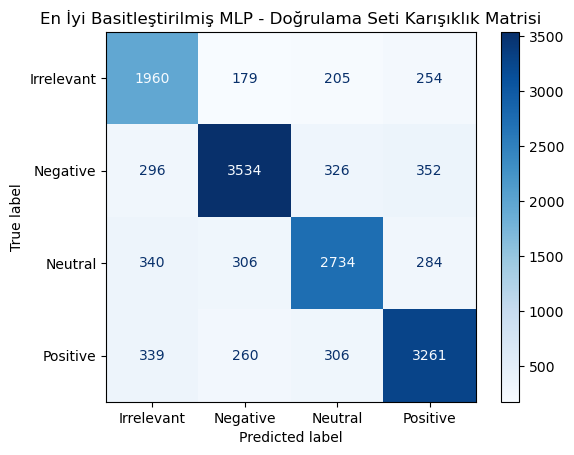

MLP Optimizasyon ve Değerlendirme Adımı Tamamlandı.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from scipy.stats import expon, randint
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd 


if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None):

    print("="*50)
    print("MLP Hiperparametre Optimizasyonu (RandomizedSearchCV) Başlatılıyor...")
    print("="*50)
    print(f"Eğitim verisi (X_train_smote) boyutu: {X_train_smote.shape}")
    print(f"Eğitim etiketleri (y_train_smote) sınıf dağılımı:\n{pd.Series(y_train_smote).value_counts(normalize=True)}")
    print(f"Doğrulama verisi (X_val) boyutu: {X_val.shape}")
    print(f"Doğrulama etiketleri (y_val) sınıf dağılımı:\n{pd.Series(y_val).value_counts(normalize=True)}")
    print("-"*50)

    
    param_dist_mlp_simplified = {
        'hidden_layer_sizes': [
            (50,), (100,),
            (50, 30), (70, 40), (100, 50) 
        ],
        'activation': ['relu', 'tanh'], 
        'solver': ['adam'],
        'alpha': expon(scale=0.0005), 
        'learning_rate_init': [0.001, 0.0005, 0.0002],
        'batch_size': [64, 128, 256],
        'max_iter': [20], 
        'early_stopping': [True],
        'validation_fraction': [0.1],
        'n_iter_no_change': [10]     
    }
    print("Kullanılacak Hiperparametre Arama Uzayı:")
    for key, value in param_dist_mlp_simplified.items():
        print(f"  {key}: {value}")
    print("-"*50)

    mlp_base_simplified = MLPClassifier(random_state=42, solver='adam')

    n_iterations_search = 1 
    cv_folds = 2            
    
    print(f"RandomizedSearchCV Ayarları: n_iter={n_iterations_search}, cv={cv_folds}, scoring='f1_macro'")
    print("Optimizasyon için her bir aday {cv_folds} kez eğitilecek, toplam {n_iterations_search * cv_folds} eğitim.")
    print("-"*50)


    random_search_mlp_simplified = RandomizedSearchCV(
        estimator=mlp_base_simplified,
        param_distributions=param_dist_mlp_simplified,
        n_iter=n_iterations_search,
        cv=cv_folds,
        scoring='f1_macro',
        verbose=3,  
        random_state=42,
        n_jobs=-1
    )

    print(f"{time.strftime('%Y-%m-%d %H:%M:%S')} - RandomizedSearchCV.fit() başlıyor...")
    start_time_rs_s = time.time()
    try:
        random_search_mlp_simplified.fit(X_train_smote, y_train_smote)
        end_time_rs_s = time.time()
        print(f"\n{time.strftime('%Y-%m-%d %H:%M:%S')} - RandomizedSearchCV.fit() tamamlandı.")
        print(f"Toplam süre: {end_time_rs_s - start_time_rs_s:.2f} saniye.")
        print("="*50)

        print("\nEn İyi Hiperparametreler (Basitleştirilmiş Arama):")
        print(random_search_mlp_simplified.best_params_)
        print("-"*50)
        
        print("\nEn İyi f1_macro Skoru (Çapraz Doğrulama Ortalama - Basitleştirilmiş Arama):")
        print(random_search_mlp_simplified.best_score_)
        print("-"*50)

        best_mlp_model_simplified = random_search_mlp_simplified.best_estimator_

        print("\n--- Doğrulama Seti Üzerinde EN İYİ BASİTLEŞTİRİLMİŞ MLP Performansı ---")
        y_pred_val_best_s = best_mlp_model_simplified.predict(X_val)
        
        print("Doğruluk (Accuracy):", accuracy_score(y_val, y_pred_val_best_s))
        print("\nSınıflandırma Raporu (Classification Report):\n", classification_report(y_val, y_pred_val_best_s))
        print("-"*50)

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_estimator(best_mlp_model_simplified, X_val, y_val, cmap=plt.cm.Blues)
            plt.title("En İyi Basitleştirilmiş MLP - Doğrulama Seti Karışıklık Matrisi")
            plt.show()
        except Exception as e_cm_best_s:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm_best_s}")
            from sklearn.metrics import confusion_matrix
            cm_best_s = confusion_matrix(y_val, y_pred_val_best_s, labels=best_mlp_model_simplified.classes_)
            print(cm_best_s)
            print(f"(Sınıflar: {best_mlp_model_simplified.classes_})")
        print("="*50)
        print("MLP Optimizasyon ve Değerlendirme Adımı Tamamlandı.")
        print("="*50)


    except Exception as e_rs_fit_s:
        print(f"\n{time.strftime('%Y-%m-%d %H:%M:%S')} - RandomizedSearchCV.fit() sırasında bir HATA oluştu.")
        print(f"Hata Detayı: {e_rs_fit_s}")
        print("="*50)

else:
    print("HATA: SMOTE'lanmış eğitim verisi (X_train_smote, y_train_smote) veya doğrulama kümeleri bulunamadı.")

In [69]:
X_train_smote.shape

(53660, 5007)

[15:57:00] RandomizedSearchCV başlıyor...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Iteration 1, loss = 1.35204098
Validation score: 0.482392
Iteration 2, loss = 1.17787074
Validation score: 0.588317
Iteration 3, loss = 0.95139534
Validation score: 0.651481
Iteration 4, loss = 0.81432967
Validation score: 0.668809
Iteration 5, loss = 0.73460246
Validation score: 0.679150
Iteration 6, loss = 0.67941445
Validation score: 0.691448
Iteration 7, loss = 0.63360484
Validation score: 0.697876
Iteration 8, loss = 0.60681205
Validation score: 0.709055
Iteration 9, loss = 0.58222009
Validation score: 0.706540
Iteration 10, loss = 0.55704154
Validation score: 0.709894
Iteration 11, loss = 0.54396528
Validation score: 0.713248
Iteration 12, loss = 0.52378512
Validation score: 0.719955
Iteration 13, loss = 0.50934989
Validation score: 0.718278
Iteration 14, loss = 0.50093883
Validation score: 0.701789
Iteration 15, loss = 0.48738862
Validation score: 0.712689
Iteration 16, loss = 0

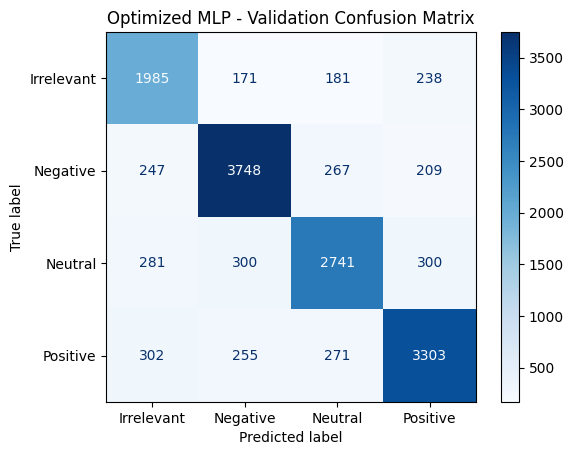

,params,mean_test_score,mean_train_score,std_test_score
0,"{'activation': 'relu', 'alpha': 0.000796150267...",0.764403,0.934600,0.026731
1,"{'activation': 'relu', 'alpha': 8.481243523117...",0.742544,0.890771,0.008528
2,"{'activation': 'tanh', 'alpha': 0.000203014091...",0.738348,0.886487,0.008161
3,"{'activation': 'tanh', 'alpha': 0.000893214771...",0.741859,0.885467,0.036998
4,"{'activation': 'relu', 'alpha': 0.000181376864...",0.791241,0.945847,0.023637


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from scipy.stats import expon
import matplotlib.pyplot as plt
import time
import pandas as pd

# --- Parametre uzayı ---
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (70, 40), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': expon(scale=0.0005),
    'learning_rate_init': [0.001, 0.0005, 0.0002],
    'batch_size': [64, 128, 256],
}


mlp_base = MLPClassifier(
    solver='adam',
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42,
    verbose=True  # Epoch ilerleme çıktısı
)

# --- RandomizedSearchCV tanımı ---
random_search = RandomizedSearchCV(
    estimator=mlp_base,
    param_distributions=param_dist_mlp,
    n_iter=5,             
    cv=3,
    scoring='f1_macro',
    n_jobs=1,             
    verbose=2,            
    return_train_score=True,
    random_state=42
)

# --- Optimizasyonu çalıştır ---
print(f"[{time.strftime('%H:%M:%S')}] RandomizedSearchCV başlıyor...")
start = time.time()
random_search.fit(X_train_smote, y_train_smote)
end = time.time()
print(f"[{time.strftime('%H:%M:%S')}] Tamamlandı. Süre: {end - start:.1f} s")

# --- Sonuçları raporla ---
print("\n### En İyi Hiperparametreler ###")
print(random_search.best_params_)
print(f"\nEn iyi CV f1_macro: {random_search.best_score_:.4f}")

print("\n### Validation Set Performansı ###")
y_val_pred = random_search.best_estimator_.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

print("\n### Confusion Matrix ###")
ConfusionMatrixDisplay.from_estimator(
    random_search.best_estimator_, X_val, y_val, cmap=plt.cm.Blues
)
plt.title("Optimized MLP - Validation Confusion Matrix")
plt.show()


cv_results = pd.DataFrame(random_search.cv_results_)
display(cv_results[[
    'params', 'mean_test_score', 'mean_train_score', 'std_test_score'
]])


Test Set Accuracy:  0.7984998986418002

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.72      0.78      0.75      2575
    Negative       0.84      0.83      0.84      4472
     Neutral       0.79      0.77      0.78      3621
    Positive       0.81      0.80      0.81      4131

    accuracy                           0.80     14799
   macro avg       0.79      0.79      0.79     14799
weighted avg       0.80      0.80      0.80     14799



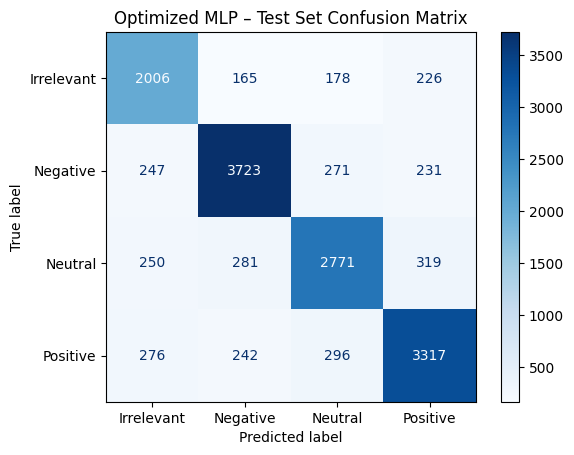

In [71]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Test set tahminleri
best_mlp = random_search.best_estimator_
y_test_pred = best_mlp.predict(X_test)

# 2) Temel metrikler
print("Test Set Accuracy: ", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_test_pred))

# 3) Karışıklık Matrisi
ConfusionMatrixDisplay.from_estimator(
    best_mlp, X_test, y_test, cmap=plt.cm.Blues
)
plt.title("Optimized MLP – Test Set Confusion Matrix")
plt.show()


### Optimized XGB

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

print(f"Bu hücrede kullanılan XGBoost Versiyonu: {xgb.__version__}")

if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None):

    print("="*50)
    print("XGBoost Modeli Eğitimi (Versiyon 3.0.2 - n_estimators Artırıldı)...")
    print("="*50)

    y_train_xgb_encoded = y_train_smote.copy()
    y_val_xgb_encoded = y_val.copy()
    label_encoder_xgb = None
    is_string_labels = False
    if isinstance(y_train_smote, pd.Series) and pd.api.types.is_string_dtype(y_train_smote):
        is_string_labels = True
    elif isinstance(y_train_smote, np.ndarray) and (y_train_smote.dtype == 'object' or 'U' in y_train_smote.dtype.str):
        is_string_labels = True

    if is_string_labels:
        print("Etiketler LabelEncoder ile dönüştürülüyor...")
        label_encoder_xgb = LabelEncoder()
        all_unique_labels = pd.concat([pd.Series(y_train_smote), pd.Series(y_val)], axis=0).unique()
        label_encoder_xgb.fit(all_unique_labels)
        y_train_xgb_encoded = label_encoder_xgb.transform(y_train_smote)
        y_val_xgb_encoded = label_encoder_xgb.transform(y_val)
        print(f"Etiket Eşleşmeleri: {list(zip(label_encoder_xgb.classes_, label_encoder_xgb.transform(label_encoder_xgb.classes_)))}")
    else:
        print("Etiketler zaten sayısal.")


    num_classes = len(pd.Series(y_train_smote).unique())

    print("\nXGBoost Modeli oluşturuluyor (n_estimators artırıldı)...")
    xgb_model_tuned_estimators = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=num_classes,
        eval_metric='mlogloss',
        n_estimators=300,           
        early_stopping_rounds=10,   
        learning_rate=0.1,          
        max_depth=6,                
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    )

    print("XGBoost Modeli (n_estimators artırıldı) eğitiliyor...")
    start_time_xgb = time.time()
    try:
        xgb_model_tuned_estimators.fit(X_train_smote, y_train_xgb_encoded,
                                       eval_set=[(X_val, y_val_xgb_encoded)],
                                       verbose=50) 
        end_time_xgb = time.time()
        print(f"XGBoost Model eğitimi {end_time_xgb - start_time_xgb:.2f} saniyede tamamlandı.")
        
        if hasattr(xgb_model_tuned_estimators, 'best_iteration'):
             print(f"En iyi iterasyon: {xgb_model_tuned_estimators.best_iteration}")
        elif hasattr(xgb_model_tuned_estimators, 'best_ntree_limit'): 
             print(f"En iyi ağaç limiti (iterasyon): {xgb_model_tuned_estimators.best_ntree_limit}")


        print("\n--- Doğrulama Seti Üzerinde XGBoost Performansı (n_estimators artırıldı) ---")
        
        y_pred_val_xgb_encoded = xgb_model_tuned_estimators.predict(X_val)
        
        y_val_for_report = y_val
        y_pred_val_xgb_original = y_pred_val_xgb_encoded

        if label_encoder_xgb is not None and is_string_labels:
            y_pred_val_xgb_original = label_encoder_xgb.inverse_transform(y_pred_val_xgb_encoded)
        else: 
            y_val_for_report = y_val_xgb_encoded

        print("Doğruluk (Accuracy):", accuracy_score(y_val_for_report, y_pred_val_xgb_original))
        print("\nSınıflandırma Raporu (Classification Report):\n")
        
        display_labels_for_report = None
        if label_encoder_xgb is not None and is_string_labels:
            display_labels_for_report = label_encoder_xgb.classes_
        
        print(classification_report(y_val_for_report, y_pred_val_xgb_original, target_names=display_labels_for_report))
        
        # Karışıklık matrisi çizimi

        print("="*50)
        print("XGBoost (n_estimators artırıldı) Eğitimi ve Değerlendirmesi Tamamlandı.")
        print("="*50)

    except Exception as e_xgb_fit:
        print(f"\nXGBoost modeli (n_estimators artırıldı) eğitilirken/tahmin yapılırken bir HATA oluştu: {e_xgb_fit}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: Eğitim/Doğrulama kümeleri bulunamadı.")

Bu hücrede kullanılan XGBoost Versiyonu: 2.0.3
XGBoost Modeli Eğitimi (Versiyon 3.0.2 - n_estimators Artırıldı)...
Etiketler LabelEncoder ile dönüştürülüyor...
Etiket Eşleşmeleri: [('Irrelevant', 0), ('Negative', 1), ('Neutral', 2), ('Positive', 3)]

XGBoost Modeli oluşturuluyor (n_estimators artırıldı)...
XGBoost Modeli (n_estimators artırıldı) eğitiliyor...
[0]	validation_0-mlogloss:1.37107
[0]	validation_0-mlogloss:1.37107
[50]	validation_0-mlogloss:1.16481
[50]	validation_0-mlogloss:1.16481
[100]	validation_0-mlogloss:1.09931
[100]	validation_0-mlogloss:1.09931
[150]	validation_0-mlogloss:1.05662
[150]	validation_0-mlogloss:1.05662
[200]	validation_0-mlogloss:1.02502
[200]	validation_0-mlogloss:1.02502
[250]	validation_0-mlogloss:0.99965
[250]	validation_0-mlogloss:0.99965
[299]	validation_0-mlogloss:0.97805
[299]	validation_0-mlogloss:0.97805
XGBoost Model eğitimi 199.10 saniyede tamamlandı.
En iyi iterasyon: 299

--- Doğrulama Seti Üzerinde XGBoost Performansı (n_estimators artır

### İlk Deneme XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd


y_train = y_train_smote.copy()
y_val_raw = y_val.copy()
label_encoder = None

if y_train.dtype == object or pd.api.types.is_string_dtype(y_train):
    label_encoder = LabelEncoder()
    label_encoder.fit(pd.concat([pd.Series(y_train), pd.Series(y_val_raw)], axis=0))
    y_train = label_encoder.transform(y_train)
    y_val_enc = label_encoder.transform(y_val_raw)
else:
    y_val_enc = y_val_raw

num_classes = len(np.unique(y_train))

# — parametre dağılımı —
param_dist_xgb = {
    'n_estimators':     randint(100, 500),
    'max_depth':        randint(3, 10),
    'learning_rate':    [0.01, 0.05, 0.1, 0.2],
    'subsample':        uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma':            uniform(0, 5),
    'reg_alpha':        uniform(0, 1),
    'reg_lambda':       uniform(0, 1)
}

# — base model —
xgb_base = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    eval_metric=['mlogloss','merror'],   
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    verbose=1                            
)

# — RandomizedSearchCV -
rand_search_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    verbose=3,    
    n_jobs=1,      
    random_state=42,
    return_train_score=True
)

print(f"[{time.strftime('%H:%M:%S')}] → Başlıyor: {rand_search_xgb.n_iter} aday × {rand_search_xgb.cv} fold")
start = time.time()
rand_search_xgb.fit(
    X_train_smote, y_train,
    eval_set=[(X_val, y_val_enc)],
    early_stopping_rounds=10,
    verbose=False    
)
print(f"[{time.strftime('%H:%M:%S')}] ← Bitti, Toplam: {time.time() - start:.0f}s")

# — en iyi parametreler & skor —
print("\n### En İyi Hiperparametreler ###")
print(rand_search_xgb.best_params_)
print(f"En iyi CV f1_macro: {rand_search_xgb.best_score_:.4f}\n")

# — validation performansı —
best_xgb = rand_search_xgb.best_estimator_
y_val_pred = best_xgb.predict(X_val)
if label_encoder:
    y_val_pred = label_encoder.inverse_transform(y_val_pred)
    y_val_true = y_val_raw
else:
    y_val_true = y_val_raw

print("Validation Accuracy:", accuracy_score(y_val_true, y_val_pred))
print(classification_report(y_val_true, y_val_pred))


[17:37:41] → Başlıyor: 20 aday × 3 fold
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:37:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797;, score=(train=0.643, test=0.563) total time=  51.7s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:38:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797;, score=(train=0.637, test=0.583) total time=  52.2s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.15601864044243652, reg_lambda=0.15599452033620265, subsample=0.6232334448672797;, score=(train=0.624, test=0.597) total time=  51.4s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.9464704583099741, gamma=3.005575058716044, learning_rate=0.2, max_depth=5, n_estimators=249, reg_alpha=0.056411579027100256, reg_lambda=0.7219987722668247, subsample=0.9754210836063001;, score=(train=0.745, test=0.623) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:41:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.9464704583099741, gamma=3.005575058716044, learning_rate=0.2, max_depth=5, n_estimators=249, reg_alpha=0.056411579027100256, reg_lambda=0.7219987722668247, subsample=0.9754210836063001;, score=(train=0.742, test=0.638) total time= 1.7min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.9464704583099741, gamma=3.005575058716044, learning_rate=0.2, max_depth=5, n_estimators=249, reg_alpha=0.056411579027100256, reg_lambda=0.7219987722668247, subsample=0.9754210836063001;, score=(train=0.728, test=0.664) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.6003115063364057, gamma=4.961057796456087, learning_rate=0.01, max_depth=6, n_estimators=413, reg_alpha=0.5247564316322378, reg_lambda=0.43194501864211576, subsample=0.7164916560792167;, score=(train=0.488, test=0.459) total time=  24.8s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.6003115063364057, gamma=4.961057796456087, learning_rate=0.01, max_depth=6, n_estimators=413, reg_alpha=0.5247564316322378, reg_lambda=0.43194501864211576, subsample=0.7164916560792167;, score=(train=0.489, test=0.470) total time=  27.6s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.6003115063364057, gamma=4.961057796456087, learning_rate=0.01, max_depth=6, n_estimators=413, reg_alpha=0.5247564316322378, reg_lambda=0.43194501864211576, subsample=0.7164916560792167;, score=(train=0.452, test=0.448) total time=   8.1s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:46:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.8447411578889518, gamma=0.6974693032602092, learning_rate=0.2, max_depth=6, n_estimators=370, reg_alpha=0.45606998421703593, reg_lambda=0.7851759613930136, subsample=0.6798695128633439;, score=(train=0.809, test=0.658) total time= 2.7min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.8447411578889518, gamma=0.6974693032602092, learning_rate=0.2, max_depth=6, n_estimators=370, reg_alpha=0.45606998421703593, reg_lambda=0.7851759613930136, subsample=0.6798695128633439;, score=(train=0.758, test=0.650) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:50:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.8447411578889518, gamma=0.6974693032602092, learning_rate=0.2, max_depth=6, n_estimators=370, reg_alpha=0.45606998421703593, reg_lambda=0.7851759613930136, subsample=0.6798695128633439;, score=(train=0.799, test=0.706) total time= 2.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:53:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.8056937753654446, gamma=2.9620728443102124, learning_rate=0.1, max_depth=7, n_estimators=406, reg_alpha=0.6803075385877797, reg_lambda=0.450499251969543, subsample=0.6053059844639466;, score=(train=0.736, test=0.616) total time= 2.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:56:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.8056937753654446, gamma=2.9620728443102124, learning_rate=0.1, max_depth=7, n_estimators=406, reg_alpha=0.6803075385877797, reg_lambda=0.450499251969543, subsample=0.6053059844639466;, score=(train=0.712, test=0.627) total time= 2.4min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:58:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.8056937753654446, gamma=2.9620728443102124, learning_rate=0.1, max_depth=7, n_estimators=406, reg_alpha=0.6803075385877797, reg_lambda=0.450499251969543, subsample=0.6053059844639466;, score=(train=0.685, test=0.642) total time= 2.0min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:00:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.9768807022739411, gamma=2.8164410892276965, learning_rate=0.05, max_depth=3, n_estimators=445, reg_alpha=0.09767211400638387, reg_lambda=0.6842330265121569, subsample=0.7760609974958406;, score=(train=0.603, test=0.540) total time= 2.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:03:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.9768807022739411, gamma=2.8164410892276965, learning_rate=0.05, max_depth=3, n_estimators=445, reg_alpha=0.09767211400638387, reg_lambda=0.6842330265121569, subsample=0.7760609974958406;, score=(train=0.599, test=0.559) total time= 2.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:05:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.9768807022739411, gamma=2.8164410892276965, learning_rate=0.05, max_depth=3, n_estimators=445, reg_alpha=0.09767211400638387, reg_lambda=0.6842330265121569, subsample=0.7760609974958406;, score=(train=0.478, test=0.478) total time=  31.9s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:06:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.6488152939379115, gamma=2.475884550556351, learning_rate=0.1, max_depth=5, n_estimators=305, reg_alpha=0.3910606075732408, reg_lambda=0.18223608778806233, subsample=0.902144564127061;, score=(train=0.702, test=0.597) total time= 1.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:08:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.6488152939379115, gamma=2.475884550556351, learning_rate=0.1, max_depth=5, n_estimators=305, reg_alpha=0.3910606075732408, reg_lambda=0.18223608778806233, subsample=0.902144564127061;, score=(train=0.698, test=0.618) total time= 1.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.6488152939379115, gamma=2.475884550556351, learning_rate=0.1, max_depth=5, n_estimators=305, reg_alpha=0.3910606075732408, reg_lambda=0.18223608778806233, subsample=0.902144564127061;, score=(train=0.685, test=0.637) total time= 1.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.7700623497964979, gamma=1.039708314340944, learning_rate=0.2, max_depth=8, n_estimators=290, reg_alpha=0.8422847745949985, reg_lambda=0.44975413336976566, subsample=0.7580600944007257;, score=(train=0.823, test=0.668) total time= 2.3min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.7700623497964979, gamma=1.039708314340944, learning_rate=0.2, max_depth=8, n_estimators=290, reg_alpha=0.8422847745949985, reg_lambda=0.44975413336976566, subsample=0.7580600944007257;, score=(train=0.819, test=0.689) total time= 2.3min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:16:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.7700623497964979, gamma=1.039708314340944, learning_rate=0.2, max_depth=8, n_estimators=290, reg_alpha=0.8422847745949985, reg_lambda=0.44975413336976566, subsample=0.7580600944007257;, score=(train=0.810, test=0.717) total time= 2.2min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.9706635463175177, gamma=3.6363599792821044, learning_rate=0.1, max_depth=8, n_estimators=314, reg_alpha=0.5208342600258237, reg_lambda=0.9611720243493491, subsample=0.9378135394712606;, score=(train=0.714, test=0.607) total time= 1.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.9706635463175177, gamma=3.6363599792821044, learning_rate=0.1, max_depth=8, n_estimators=314, reg_alpha=0.5208342600258237, reg_lambda=0.9611720243493491, subsample=0.9378135394712606;, score=(train=0.719, test=0.630) total time= 2.2min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:22:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.9706635463175177, gamma=3.6363599792821044, learning_rate=0.1, max_depth=8, n_estimators=314, reg_alpha=0.5208342600258237, reg_lambda=0.9611720243493491, subsample=0.9378135394712606;, score=(train=0.719, test=0.660) total time= 2.4min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:25:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.8989280440549523, gamma=2.698460661945399, learning_rate=0.2, max_depth=4, n_estimators=316, reg_alpha=0.28093450968738076, reg_lambda=0.5426960831582485, subsample=0.6563696899899051;, score=(train=0.728, test=0.612) total time= 1.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:27:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.8989280440549523, gamma=2.698460661945399, learning_rate=0.2, max_depth=4, n_estimators=316, reg_alpha=0.28093450968738076, reg_lambda=0.5426960831582485, subsample=0.6563696899899051;, score=(train=0.667, test=0.602) total time= 1.1min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:28:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.8989280440549523, gamma=2.698460661945399, learning_rate=0.2, max_depth=4, n_estimators=316, reg_alpha=0.28093450968738076, reg_lambda=0.5426960831582485, subsample=0.6563696899899051;, score=(train=0.704, test=0.650) total time= 1.8min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.9208787923016158, gamma=0.3727532183988541, learning_rate=0.1, max_depth=3, n_estimators=443, reg_alpha=0.3948815181755697, reg_lambda=0.2934881747180381, subsample=0.6056319290860338;, score=(train=0.626, test=0.555) total time= 1.7min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.9208787923016158, gamma=0.3727532183988541, learning_rate=0.1, max_depth=3, n_estimators=443, reg_alpha=0.3948815181755697, reg_lambda=0.2934881747180381, subsample=0.6056319290860338;, score=(train=0.614, test=0.568) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.9208787923016158, gamma=0.3727532183988541, learning_rate=0.1, max_depth=3, n_estimators=443, reg_alpha=0.3948815181755697, reg_lambda=0.2934881747180381, subsample=0.6056319290860338;, score=(train=0.621, test=0.600) total time= 1.9min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:35:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.679536961635522, gamma=3.5567097637432497, learning_rate=0.1, max_depth=3, n_estimators=478, reg_alpha=0.07404465173409036, reg_lambda=0.3584657285442726, subsample=0.6463476238100518;, score=(train=0.652, test=0.566) total time= 2.3min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:37:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.679536961635522, gamma=3.5567097637432497, learning_rate=0.1, max_depth=3, n_estimators=478, reg_alpha=0.07404465173409036, reg_lambda=0.3584657285442726, subsample=0.6463476238100518;, score=(train=0.614, test=0.567) total time= 1.7min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:39:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.679536961635522, gamma=3.5567097637432497, learning_rate=0.1, max_depth=3, n_estimators=478, reg_alpha=0.07404465173409036, reg_lambda=0.3584657285442726, subsample=0.6463476238100518;, score=(train=0.640, test=0.612) total time= 2.4min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:41:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.9452413703502374, gamma=3.1164906341377896, learning_rate=0.05, max_depth=3, n_estimators=147, reg_alpha=0.37081825219826636, reg_lambda=0.6688412526636073, subsample=0.8663689426469987;, score=(train=0.524, test=0.483) total time=  52.5s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:42:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.9452413703502374, gamma=3.1164906341377896, learning_rate=0.05, max_depth=3, n_estimators=147, reg_alpha=0.37081825219826636, reg_lambda=0.6688412526636073, subsample=0.8663689426469987;, score=(train=0.519, test=0.502) total time=  51.5s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:43:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.9452413703502374, gamma=3.1164906341377896, learning_rate=0.05, max_depth=3, n_estimators=147, reg_alpha=0.37081825219826636, reg_lambda=0.6688412526636073, subsample=0.8663689426469987;, score=(train=0.505, test=0.502) total time=  51.3s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:44:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.8365191150830908, gamma=1.373608964950321, learning_rate=0.1, max_depth=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=0.713244787222995, subsample=0.9043140194467589;, score=(train=0.608, test=0.544) total time= 1.4min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:45:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.8365191150830908, gamma=1.373608964950321, learning_rate=0.1, max_depth=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=0.713244787222995, subsample=0.9043140194467589;, score=(train=0.593, test=0.555) total time= 1.3min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.8365191150830908, gamma=1.373608964950321, learning_rate=0.1, max_depth=3, n_estimators=326, reg_alpha=0.1195942459383017, reg_lambda=0.713244787222995, subsample=0.9043140194467589;, score=(train=0.616, test=0.593) total time= 1.8min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.8245108790277985, gamma=3.854835899772805, learning_rate=0.1, max_depth=5, n_estimators=492, reg_alpha=0.7106628896857874, reg_lambda=0.11089082081183133, subsample=0.7757346007463081;, score=(train=0.714, test=0.605) total time= 2.8min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:51:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.8245108790277985, gamma=3.854835899772805, learning_rate=0.1, max_depth=5, n_estimators=492, reg_alpha=0.7106628896857874, reg_lambda=0.11089082081183133, subsample=0.7757346007463081;, score=(train=0.704, test=0.624) total time= 2.7min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:54:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.8245108790277985, gamma=3.854835899772805, learning_rate=0.1, max_depth=5, n_estimators=492, reg_alpha=0.7106628896857874, reg_lambda=0.11089082081183133, subsample=0.7757346007463081;, score=(train=0.691, test=0.643) total time= 2.7min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:57:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.6806876809341584, gamma=4.478817978367597, learning_rate=0.01, max_depth=6, n_estimators=195, reg_alpha=0.6955160864261275, reg_lambda=0.1393314544058757, subsample=0.8417669517111269;, score=(train=0.520, test=0.483) total time= 1.5min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.6806876809341584, gamma=4.478817978367597, learning_rate=0.01, max_depth=6, n_estimators=195, reg_alpha=0.6955160864261275, reg_lambda=0.1393314544058757, subsample=0.8417669517111269;, score=(train=0.478, test=0.460) total time=  18.4s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:58:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.6806876809341584, gamma=4.478817978367597, learning_rate=0.01, max_depth=6, n_estimators=195, reg_alpha=0.6955160864261275, reg_lambda=0.1393314544058757, subsample=0.8417669517111269;, score=(train=0.453, test=0.450) total time=  15.4s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.8159364365206693, gamma=1.015306123673847, learning_rate=0.01, max_depth=9, n_estimators=286, reg_alpha=0.6947849330397046, reg_lambda=0.8804678390152577, subsample=0.8497416192535173;, score=(train=0.522, test=0.485) total time=  43.8s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:59:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.8159364365206693, gamma=1.015306123673847, learning_rate=0.01, max_depth=9, n_estimators=286, reg_alpha=0.6947849330397046, reg_lambda=0.8804678390152577, subsample=0.8497416192535173;, score=(train=0.511, test=0.480) total time=  17.7s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:00:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.8159364365206693, gamma=1.015306123673847, learning_rate=0.01, max_depth=9, n_estimators=286, reg_alpha=0.6947849330397046, reg_lambda=0.8804678390152577, subsample=0.8497416192535173;, score=(train=0.501, test=0.492) total time=  29.9s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.7182534743350856, gamma=0.527471299151353, learning_rate=0.2, max_depth=6, n_estimators=207, reg_alpha=0.18657005888603584, reg_lambda=0.8925589984899778, subsample=0.8157368967662603;, score=(train=0.766, test=0.635) total time= 1.5min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:02:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.7182534743350856, gamma=0.527471299151353, learning_rate=0.2, max_depth=6, n_estimators=207, reg_alpha=0.18657005888603584, reg_lambda=0.8925589984899778, subsample=0.8157368967662603;, score=(train=0.761, test=0.653) total time= 1.5min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:03:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.7182534743350856, gamma=0.527471299151353, learning_rate=0.2, max_depth=6, n_estimators=207, reg_alpha=0.18657005888603584, reg_lambda=0.8925589984899778, subsample=0.8157368967662603;, score=(train=0.752, test=0.675) total time= 1.5min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:05:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.922976062065625, gamma=4.480456499617466, learning_rate=0.1, max_depth=8, n_estimators=324, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263;, score=(train=0.686, test=0.589) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.922976062065625, gamma=4.480456499617466, learning_rate=0.1, max_depth=8, n_estimators=324, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263;, score=(train=0.716, test=0.631) total time= 2.4min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:09:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.922976062065625, gamma=4.480456499617466, learning_rate=0.1, max_depth=8, n_estimators=324, reg_alpha=0.2721322493846353, reg_lambda=0.6476901205413623, subsample=0.6002081507981263;, score=(train=0.702, test=0.648) total time= 2.4min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:11:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/3] END colsample_bytree=0.7410275425336676, gamma=1.523906290790145, learning_rate=0.05, max_depth=5, n_estimators=236, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086;, score=(train=0.616, test=0.545) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:13:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.7410275425336676, gamma=1.523906290790145, learning_rate=0.05, max_depth=5, n_estimators=236, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086;, score=(train=0.608, test=0.560) total time= 1.6min


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.7410275425336676, gamma=1.523906290790145, learning_rate=0.05, max_depth=5, n_estimators=236, reg_alpha=0.4848299713589832, reg_lambda=0.6924360328902703, subsample=0.7077649335194086;, score=(train=0.511, test=0.506) total time=  30.7s


c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[19:18:05] ← Bitti, Toplam: 6024s

### En İyi Hiperparametreler ###
{'colsample_bytree': 0.7700623497964979, 'gamma': 1.039708314340944, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 290, 'reg_alpha': 0.8422847745949985, 'reg_lambda': 0.44975413336976566, 'subsample': 0.7580600944007257}
En iyi CV f1_macro: 0.6913

Validation Accuracy: 0.6844381377120076
              precision    recall  f1-score   support

  Irrelevant       0.53      0.66      0.59      2575
    Negative       0.75      0.74      0.75      4471
     Neutral       0.70      0.62      0.66      3622
    Positive       0.72      0.69      0.71      4131

    accuracy                           0.68     14799
   macro avg       0.68      0.68      0.68     14799
weighted avg       0.69      0.68      0.69     14799



ValueError: Mix of label input types (string and number)

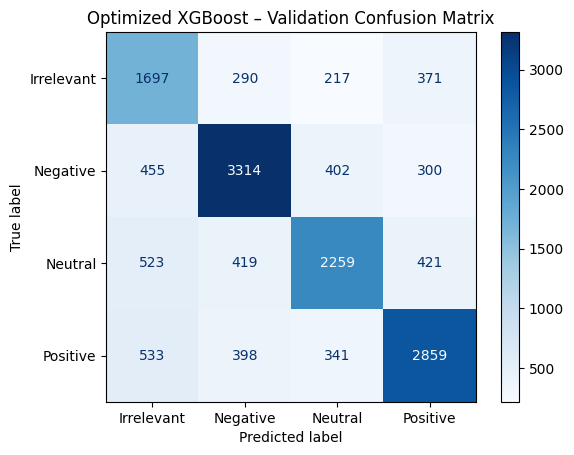

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Get numeric predictions
y_pred_num = best_xgb.predict(X_val)

# 2) If you used a LabelEncoder, invert them back to strings
if label_encoder is not None:
    y_pred = label_encoder.inverse_transform(y_pred_num)
    y_true = y_val  # still strings
    display_labels = label_encoder.classes_
else:
    y_pred = y_pred_num
    y_true = y_val
    display_labels = None

# 3) Build and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Optimized XGBoost – Validation Confusion Matrix")
plt.show()


Test Set Accuracy:  0.6874113115751064

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.54      0.65      0.59      2575
    Negative       0.76      0.74      0.75      4472
     Neutral       0.69      0.63      0.66      3621
    Positive       0.72      0.70      0.71      4131

    accuracy                           0.69     14799
   macro avg       0.68      0.68      0.68     14799
weighted avg       0.69      0.69      0.69     14799



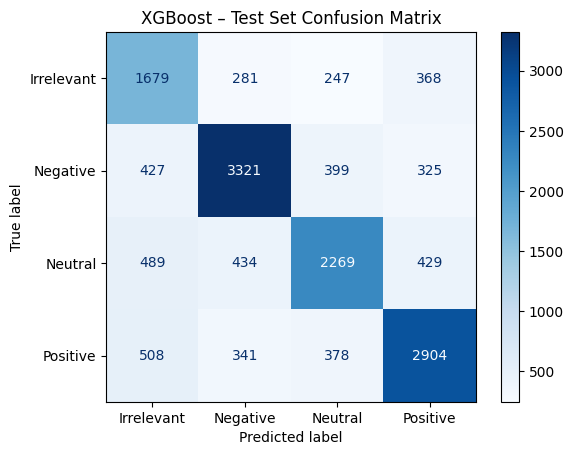

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# 1) Test set üzerinde tahmin
y_test_num = best_xgb.predict(X_test)

# 2) Eğer label encoding kullandıysak, orijinal etiketlere dönüştür
if label_encoder is not None:
    y_test_pred = label_encoder.inverse_transform(y_test_num)
    y_test_true = y_test  # string etiketler
    display_labels = label_encoder.classes_
else:
    y_test_pred = y_test_num
    y_test_true = y_test
    display_labels = None

# 3) Temel metrikler
print("Test Set Accuracy: ", accuracy_score(y_test_true, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test_true, y_test_pred))

# 4) Karışıklık Matrisi
disp = ConfusionMatrixDisplay.from_predictions(
    y_test_true, y_test_pred,
    display_labels=display_labels,
    cmap=plt.cm.Blues
)
plt.title("XGBoost – Test Set Confusion Matrix")
plt.show()


### Optimized RandomForestClassifier

Random Forest Modeli Eğitimi ve Değerlendirmesi Başlatılıyor...

Random Forest Modeli oluşturuldu. Model eğitiliyor...
Random Forest Model eğitimi 40.83 saniyede tamamlandı.

--- Doğrulama Seti Üzerinde Random Forest Performansı ---
Random Forest Model eğitimi 40.83 saniyede tamamlandı.

--- Doğrulama Seti Üzerinde Random Forest Performansı ---
Doğruluk (Accuracy): 0.8606722013926085

Sınıflandırma Raporu (Classification Report):

Doğruluk (Accuracy): 0.8606722013926085

Sınıflandırma Raporu (Classification Report):

              precision    recall  f1-score   support

  Irrelevant       0.87      0.82      0.84      2598
    Negative       0.90      0.87      0.89      4508
     Neutral       0.80      0.88      0.84      3664
    Positive       0.87      0.86      0.86      4166

    accuracy                           0.86     14936
   macro avg       0.86      0.86      0.86     14936
weighted avg       0.86      0.86      0.86     14936


Karışıklık Matrisi (Confusion Matrix):
  

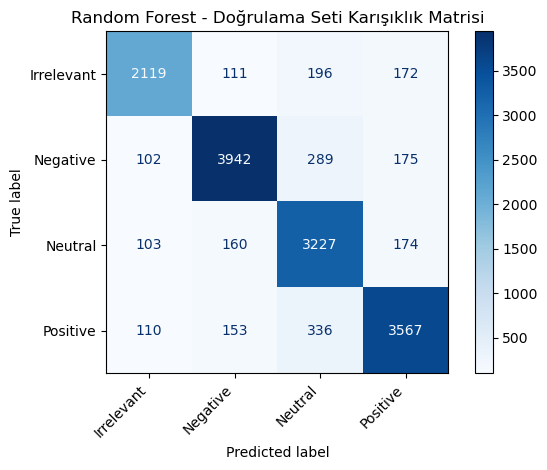

Random Forest Eğitimi ve Değerlendirmesi Tamamlandı.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd


if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None):

    print("="*50)
    print("Random Forest Modeli Eğitimi ve Değerlendirmesi Başlatılıyor...")
    print("="*50)
    y_train_rf = y_train_smote 
    y_val_rf_original = y_val  

    # Adım 1: Random Forest Modelini Oluşturma ve Eğitme
    rf_model = RandomForestClassifier(
        n_estimators=150,       
        max_depth=None,         
                                
        min_samples_split=2,   
        min_samples_leaf=1,     
        random_state=42,
        n_jobs=-1,              
        class_weight='balanced_subsample' 
                                       
    )

    print("\nRandom Forest Modeli oluşturuldu. Model eğitiliyor...")
    start_time_rf = time.time()
    try:
        rf_model.fit(X_train_smote, y_train_rf) # SMOTE'lu eğitim verisi
        end_time_rf = time.time()
        print(f"Random Forest Model eğitimi {end_time_rf - start_time_rf:.2f} saniyede tamamlandı.")

        # Adım 2: Doğrulama Seti Üzerinde Performans Değerlendirmesi
        print("\n--- Doğrulama Seti Üzerinde Random Forest Performansı ---")
        y_pred_val_rf = rf_model.predict(X_val)
        
        y_val_for_report_rf = y_val_rf_original 
        y_pred_val_for_report_rf = y_pred_val_rf


        print("Doğruluk (Accuracy):", accuracy_score(y_val_for_report_rf, y_pred_val_for_report_rf))
        print("\nSınıflandırma Raporu (Classification Report):\n")
        
        display_labels_for_rf_report = None
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            display_labels_for_rf_report = label_encoder_xgb.classes_
        elif isinstance(y_val_for_report_rf, pd.Series): 
             display_labels_for_rf_report = sorted(y_val_for_report_rf.unique())
        elif isinstance(y_val_for_report_rf, np.ndarray): 
             display_labels_for_rf_report = sorted(np.unique(y_val_for_report_rf))


        print(classification_report(y_val_for_report_rf, y_pred_val_for_report_rf, target_names=display_labels_for_rf_report))

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_predictions(y_val_for_report_rf,
                                                    y_pred_val_for_report_rf,
                                                    display_labels=display_labels_for_rf_report,
                                                    cmap=plt.cm.Blues)
            plt.title("Random Forest - Doğrulama Seti Karışıklık Matrisi")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        except Exception as e_cm_rf:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm_rf}")
            from sklearn.metrics import confusion_matrix
            cm_rf = confusion_matrix(y_val_for_report_rf, y_pred_val_for_report_rf)
            print(cm_rf)
            if display_labels_for_rf_report is not None:
                print(f"(Matris etiket sırası: {display_labels_for_rf_report})")
        print("="*50)
        print("Random Forest Eğitimi ve Değerlendirmesi Tamamlandı.")
        print("="*50)

    except Exception as e_rf_fit:
        print(f"\nRandom Forest modeli eğitilirken/tahmin yapılırken bir HATA oluştu: {e_rf_fit}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: Eğitim/Doğrulama kümeleri (X_train_smote, y_train_smote, X_val, y_val) bulunamadı.")

### İlk Deneme RandomForestClassifier

[19:23:15] → RF RandomizedSearchCV başlıyor: 20 aday × 3 fold
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=238; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=238; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=238; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=264; total time=   1.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=264; total time=   1.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=264; total time=   1.7s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=149; total time=   0.8s
[CV] END max_depth=10, max_features=l

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\aslay\anaconda3\Lib\site-packages\

[19:24:30] ← RF optimizasyon tamamlandı. Süre: 74.6 s

### En İyi Hiperparametreler (RF) ###
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 139}
En iyi CV f1_macro: 0.7467

### RF Validation Set Performansı ###
Accuracy: 0.7657274140144604
              precision    recall  f1-score   support

  Irrelevant       0.72      0.71      0.72      2575
    Negative       0.79      0.80      0.80      4471
     Neutral       0.75      0.74      0.74      3622
    Positive       0.78      0.78      0.78      4131

    accuracy                           0.77     14799
   macro avg       0.76      0.76      0.76     14799
weighted avg       0.77      0.77      0.77     14799



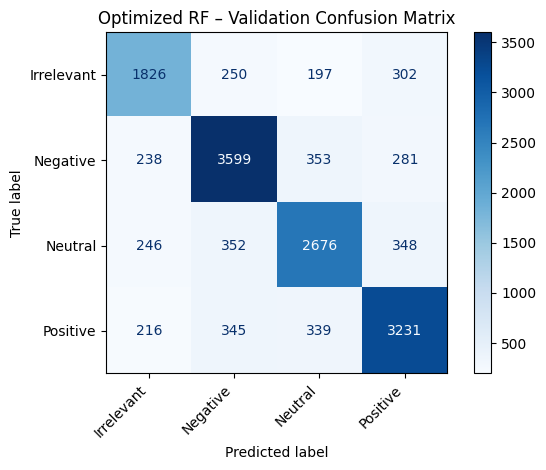

,params,mean_train_score,mean_test_score,std_test_score
9,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.884618,0.746728,0.017719
19,"{'max_depth': None, 'max_features': 'log2', 'm...",0.730673,0.642498,0.015249
1,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.624915,0.576544,0.008802
11,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.602829,0.563375,0.009658
15,"{'max_depth': 25, 'max_features': 'log2', 'min...",0.597396,0.559623,0.009250


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import pandas as pd

# --- 1) Hiperparametre arama uzayı ---
param_dist_rf = {
    'n_estimators':    randint(50, 300),
    'max_depth':       [None] + list(range(5, 26, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf':  randint(1, 5),
    'max_features':    ['auto', 'sqrt', 'log2']
}

# --- 2) Base estimator ---
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'  # SMOTE da kullanıldı, ama ek denge için
)

# --- 3) RandomizedSearchCV tanımı ---
rand_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf,
    n_iter=20,           
    cv=3,
    scoring='f1_macro',
    verbose=2,           
    n_jobs=1,            
    random_state=42,
    return_train_score=True
)

# --- 4) Optimizasyonu çalıştır ve süreyi ölç ---
print(f"[{time.strftime('%H:%M:%S')}] → RF RandomizedSearchCV başlıyor: "
      f"{rand_search_rf.n_iter} aday × {rand_search_rf.cv} fold")
t0 = time.time()
rand_search_rf.fit(X_train_smote, y_train_smote)
print(f"[{time.strftime('%H:%M:%S')}] ← RF optimizasyon tamamlandı. Süre: {time.time() - t0:.1f} s\n")

# --- 5) En iyi parametreler ve CV skoru ---
print("### En İyi Hiperparametreler (RF) ###")
print(rand_search_rf.best_params_)
print(f"En iyi CV f1_macro: {rand_search_rf.best_score_:.4f}\n")

# --- 6) Validation Set Performansı ---
best_rf = rand_search_rf.best_estimator_
y_val_pred = best_rf.predict(X_val)

print("### RF Validation Set Performansı ###")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# --- 7) Confusion Matrix from_predictions Kullanımı---
disp = ConfusionMatrixDisplay.from_predictions(
    y_val, y_val_pred,
    display_labels=best_rf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized RF – Validation Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 8) CV sonuçlarını inceleme ---
cv_results_rf = pd.DataFrame(rand_search_rf.cv_results_)
display(cv_results_rf[[
    'params', 'mean_train_score', 'mean_test_score', 'std_test_score'
]].sort_values('mean_test_score', ascending=False).head(5))


### Optimized LinearSVC

LinearSVC Hiperparametre Optimizasyonu (GridSearchCV) Başlatılıyor...
LinearSVC için GridSearchCV oluşturuluyor...
GridSearchCV eğitimi başlıyor (bu işlem biraz zaman alabilir)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 325, in fit
    self.coef_, self.int

GridSearchCV 53.31 saniyede tamamlandı.

En İyi Hiperparametreler (LinearSVC):
{'C': 10, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2'}

En İyi f1_macro Skoru (Çapraz Doğrulama Ortalama - LinearSVC):
0.7051132001908706

--- Doğrulama Seti Üzerinde EN İYİ LinearSVC Performansı ---
Doğruluk (Accuracy): 0.678093197643278

Sınıflandırma Raporu (Classification Report):

              precision    recall  f1-score   support

  Irrelevant       0.55      0.66      0.60      2598
    Negative       0.75      0.72      0.73      4508
     Neutral       0.66      0.64      0.65      3664
    Positive       0.72      0.68      0.70      4166

    accuracy                           0.68     14936
   macro avg       0.67      0.67      0.67     14936
weighted avg       0.68      0.68      0.68     14936


Karışıklık Matrisi (Confusion Matrix):
              precision    recall  f1-score   support

  Irrelevant       0.55      0.66      0.60      2598
    Negative       0

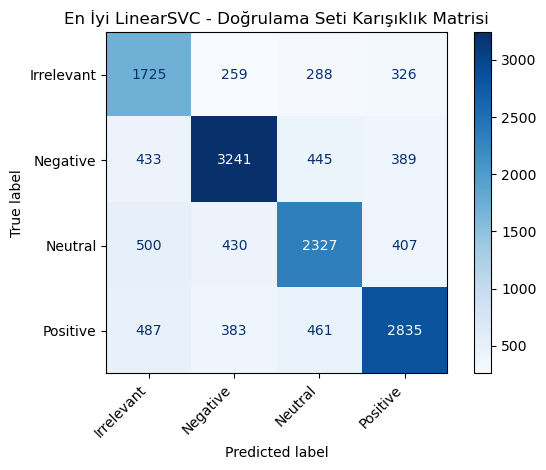

LinearSVC Hiperparametre Optimizasyonu ve Değerlendirmesi Tamamlandı.


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None):

    print("="*50)
    print("LinearSVC Hiperparametre Optimizasyonu (GridSearchCV) Başlatılıyor...")
    print("="*50)

    y_train_svm_gs = y_train_smote 
    y_val_svm_gs_original = y_val

    param_grid_lsvc = {
        'C': [0.01, 0.1, 1, 10, 100], 
        'loss': ['hinge', 'squared_hinge'],
        'penalty': ['l2'], 
        'dual': [False],   
                            
        'max_iter': [1000, 2000] 
    }

    print("LinearSVC için GridSearchCV oluşturuluyor...")
    grid_search_lsvc = GridSearchCV(
        estimator=LinearSVC(random_state=42),
        param_grid=param_grid_lsvc,
        cv=5,               
        scoring='f1_macro', 
        verbose=2,          
        n_jobs=-1           
    )

    print("GridSearchCV eğitimi başlıyor (bu işlem biraz zaman alabilir)...")
    start_time_gs_lsvc = time.time()
    try:
        grid_search_lsvc.fit(X_train_smote, y_train_svm_gs)
        end_time_gs_lsvc = time.time()
        print(f"GridSearchCV {end_time_gs_lsvc - start_time_gs_lsvc:.2f} saniyede tamamlandı.")

        print("\nEn İyi Hiperparametreler (LinearSVC):")
        print(grid_search_lsvc.best_params_)
        
        print("\nEn İyi f1_macro Skoru (Çapraz Doğrulama Ortalama - LinearSVC):")
        print(grid_search_lsvc.best_score_)

        best_lsvc_model = grid_search_lsvc.best_estimator_

        print("\n--- Doğrulama Seti Üzerinde EN İYİ LinearSVC Performansı ---")
        y_pred_val_best_lsvc = best_lsvc_model.predict(X_val)
        
        y_val_for_report_lsvc = y_val_svm_gs_original
        y_pred_val_for_report_lsvc = y_pred_val_best_lsvc

        print("Doğruluk (Accuracy):", accuracy_score(y_val_for_report_lsvc, y_pred_val_for_report_lsvc))
        print("\nSınıflandırma Raporu (Classification Report):\n")
        
        display_labels_for_lsvc_report = None
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            display_labels_for_lsvc_report = label_encoder_xgb.classes_
        elif isinstance(y_val_for_report_lsvc, pd.Series):
             display_labels_for_lsvc_report = sorted(y_val_for_report_lsvc.unique())
        elif isinstance(y_val_for_report_lsvc, np.ndarray):
             display_labels_for_lsvc_report = sorted(np.unique(y_val_for_report_lsvc))

        print(classification_report(y_val_for_report_lsvc, y_pred_val_for_report_lsvc, target_names=display_labels_for_lsvc_report))

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_predictions(y_val_for_report_lsvc,
                                                    y_pred_val_for_report_lsvc,
                                                    display_labels=display_labels_for_lsvc_report,
                                                    cmap=plt.cm.Blues)
            plt.title("En İyi LinearSVC - Doğrulama Seti Karışıklık Matrisi")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        except Exception as e_cm_lsvc:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm_lsvc}")
           
        print("="*50)
        print("LinearSVC Hiperparametre Optimizasyonu ve Değerlendirmesi Tamamlandı.")
        print("="*50)

    except ValueError as ve_gs_lsvc: 
        print(f"\nGridSearchCV fit sırasında ValueError: {ve_gs_lsvc}")
        print("Parametre gridindeki loss/penalty/dual kombinasyonlarını kontrol edin.")
        import traceback
        traceback.print_exc()
        print("="*50)
    except Exception as e_gs_lsvc:
        print(f"\nGridSearchCV eğitimi sırasında bir HATA oluştu: {e_gs_lsvc}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: Eğitim/Doğrulama kümeleri (X_train_smote, y_train_smote, X_val, y_val) bulunamadı.")

### İlk Deneme LinearSVC

[19:28:31] → LinearSVC RandomizedSearchCV başlıyor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=0.0745934328572655, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ....C=0.0745934328572655, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ....C=0.0745934328572655, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ....C=4.5705630998014515, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ....C=4.5705630998014515, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ....C=4.5705630998014515, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..C=0.006026889128682512, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..C=0.006026889128682512, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END ..C=0.006026889128682512, loss=hinge, max_iter=1000; total time=   0.0s
[CV] END C=0.0019517224641449498, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END C=0.0019517224641449498, loss=squared_hinge, max_iter=1000;

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 325, in fit
    self.coef_, self.inte

[19:28:51] ← Tamamlandı. Süre: 19.7 s

### En İyi Hiperparametreler (LinearSVC) ###
{'C': 14.528246637516036, 'loss': 'squared_hinge', 'max_iter': 2000}
En iyi CV f1_macro: 0.7004

### Validation Set Performansı ###
Accuracy: 0.6769376309210082
              precision    recall  f1-score   support

  Irrelevant       0.54      0.66      0.59      2575
    Negative       0.75      0.73      0.74      4471
     Neutral       0.68      0.61      0.64      3622
    Positive       0.70      0.69      0.70      4131

    accuracy                           0.68     14799
   macro avg       0.67      0.67      0.67     14799
weighted avg       0.68      0.68      0.68     14799



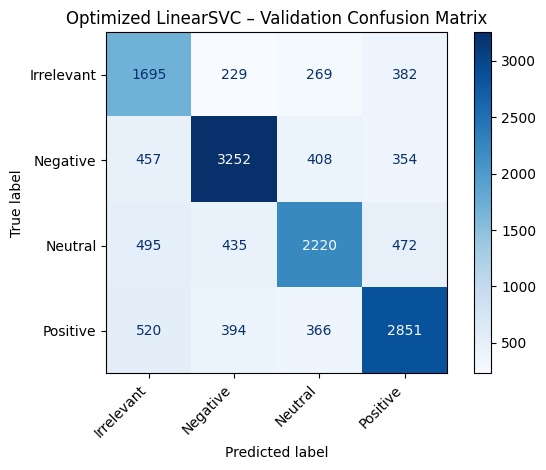

,params,mean_train_score,mean_test_score,std_test_score
6,"{'C': 14.528246637516036, 'loss': 'squared_hin...",0.806046,0.700421,0.022075
4,"{'C': 1.0129197956845732, 'loss': 'squared_hin...",0.782645,0.693077,0.018084
8,"{'C': 0.033205591037519584, 'loss': 'squared_h...",0.670021,0.623071,0.012823
3,"{'C': 0.0019517224641449498, 'loss': 'squared_...",0.512025,0.500434,0.001727
5,"{'C': 0.001267425589893723, 'loss': 'squared_h...",0.488500,0.480058,0.001280


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import pandas as pd

# 1) Parametre dağılımı 
param_dist_lsvc = {
    'C': loguniform(1e-3, 1e2),
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 2000]
}

# 2) Base estimator 
lsvc_base = LinearSVC(random_state=42, dual=False)

# 3) RandomizedSearchCV tanımı
rand_search_lsvc = RandomizedSearchCV(
    estimator=lsvc_base,
    param_distributions=param_dist_lsvc,
    n_iter=10,            
    cv=3,
    scoring='f1_macro',
    n_jobs=1,
    verbose=2,
    random_state=42,
    return_train_score=True
)

# 4) Optimizasyonu çalıştır ve süreyi ölç
print(f"[{time.strftime('%H:%M:%S')}] → LinearSVC RandomizedSearchCV başlıyor...")
t0 = time.time()
rand_search_lsvc.fit(X_train_smote, y_train_smote)
print(f"[{time.strftime('%H:%M:%S')}] ← Tamamlandı. Süre: {time.time() - t0:.1f} s\n")

# 5) En iyi parametreler & CV skoru
print("### En İyi Hiperparametreler (LinearSVC) ###")
print(rand_search_lsvc.best_params_)
print(f"En iyi CV f1_macro: {rand_search_lsvc.best_score_:.4f}\n")

# 6) Validation set performansı
best_lsvc = rand_search_lsvc.best_estimator_
y_val_pred = best_lsvc.predict(X_val)

print("### Validation Set Performansı ###")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 7) Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val, y_val_pred,
    display_labels=best_lsvc.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized LinearSVC – Validation Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8) CV sonuçları
cv_df = pd.DataFrame(rand_search_lsvc.cv_results_)
display(cv_df[['params','mean_train_score','mean_test_score','std_test_score']]\
        .sort_values('mean_test_score', ascending=False).head(5))


LinearSVC – Test Set Accuracy: 0.6878843165078722

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.56      0.68      0.61      2575
    Negative       0.77      0.73      0.75      4472
     Neutral       0.67      0.63      0.65      3621
    Positive       0.72      0.70      0.71      4131

    accuracy                           0.69     14799
   macro avg       0.68      0.68      0.68     14799
weighted avg       0.69      0.69      0.69     14799



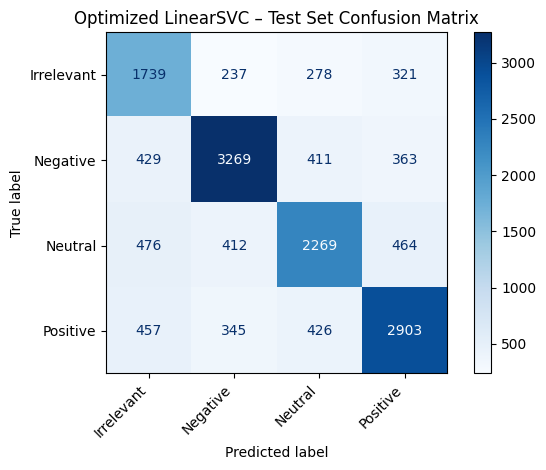

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1) Test set üzerinde tahmin
y_test_pred = best_lsvc.predict(X_test)

# 2) Metrikler
print("LinearSVC – Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_test_pred))

# 3) Karışıklık Matrisi
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=best_lsvc.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized LinearSVC – Test Set Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

# X_train_smote, y_train_smote, X_val, y_val ve
# y_train_nb_encoded, y_val_nb_encoded (sayısallaştırılmış etiketler)
# ve eğer string etiketler kullanılıyorsa label_encoder_xgb, is_string_labels
# değişkenlerinin bir önceki adımdan tanımlı ve erişilebilir olduğunu varsayıyoruz.

if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and # Orijinal smote etiketleri
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None and # Orijinal val etiketleri
    'y_train_nb_encoded' in globals() and y_train_nb_encoded is not None and # NB için encode edilmiş train etiketleri
    'y_val_nb_encoded' in globals() and y_val_nb_encoded is not None):   # NB için encode edilmiş val etiketleri


    print("="*50)
    print("MultinomialNB Hiperparametre Optimizasyonu (GridSearchCV) Başlatılıyor...")
    print("="*50)

    # Hiperparametre arama uzayı (Grid)
    # alpha: Düzeltme (smoothing) parametresi.
    #        alpha = 0: No smoothing (eğer bir özellik bir sınıfta hiç görülmediyse olasılık 0 olur, sorun yaratabilir)
    #        alpha = 1: Laplace smoothing (varsayılan)
    #        Diğer küçük pozitif değerler denenebilir.
    # fit_prior: Sınıf önceliklerini (class prior probabilities) öğrenip öğrenmeyeceği. Varsayılan True.
    param_grid_nb = {
        'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
        'fit_prior': [True, False]
    }

    print("MultinomialNB için GridSearchCV oluşturuluyor...")
    grid_search_nb = GridSearchCV(
        estimator=MultinomialNB(),
        param_grid=param_grid_nb,
        cv=5,               # 5-fold Cross-Validation
        scoring='f1_macro', # En iyi modeli seçmek için makro F1 skoru
        verbose=2,          # Arama sürecini detaylı gösterir
        n_jobs=-1           # Mümkünse tüm CPU çekirdeklerini kullan
    )

    print("GridSearchCV eğitimi başlıyor (MultinomialNB için genellikle hızlıdır)...")
    start_time_gs_nb = time.time()
    try:
        # Eğitim için encode edilmiş etiketleri kullanıyoruz
        grid_search_nb.fit(X_train_smote, y_train_nb_encoded)
        end_time_gs_nb = time.time()
        print(f"GridSearchCV {end_time_gs_nb - start_time_gs_nb:.2f} saniyede tamamlandı.")

        print("\nEn İyi Hiperparametreler (MultinomialNB):")
        print(grid_search_nb.best_params_)
        
        print("\nEn İyi f1_macro Skoru (Çapraz Doğrulama Ortalama - MultinomialNB):")
        print(grid_search_nb.best_score_)

        best_nb_model = grid_search_nb.best_estimator_

        print("\n--- Doğrulama Seti Üzerinde EN İYİ MultinomialNB Performansı ---")
        # Tahmin için X_val, karşılaştırma için encode edilmiş y_val_nb_encoded
        y_pred_val_best_nb_encoded = best_nb_model.predict(X_val)
        
        # Raporlama için orijinal etiketleri kullanalım
        y_val_for_report_nb_opt = y_val # Orijinal y_val (string veya sayısal)
        y_pred_val_for_report_nb_opt = y_pred_val_best_nb_encoded # Varsayılan

        # Eğer label_encoder_xgb varsa ve orijinal etiketler string ise, tahminleri de stringe çevir
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            y_pred_val_for_report_nb_opt = label_encoder_xgb.inverse_transform(y_pred_val_best_nb_encoded)
        # else: y_val_for_report_nb_opt zaten sayısal y_val_nb_encoded ile aynı olmalı (veya orijinal sayısal y_val)


        print("Doğruluk (Accuracy):", accuracy_score(y_val_for_report_nb_opt, y_pred_val_for_report_nb_opt))
        print("\nSınıflandırma Raporu (Classification Report):\n")
        
        display_labels_for_nb_opt_report = None
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            display_labels_for_nb_opt_report = label_encoder_xgb.classes_
        elif isinstance(y_val_for_report_nb_opt, pd.Series): # Eğer y_val orijinalde sayısal ise
             display_labels_for_nb_opt_report = sorted(y_val_for_report_nb_opt.unique())
        elif isinstance(y_val_for_report_nb_opt, np.ndarray): # Eğer y_val orijinalde sayısal ise
             display_labels_for_nb_opt_report = sorted(np.unique(y_val_for_report_nb_opt))


        print(classification_report(y_val_for_report_nb_opt, y_pred_val_for_report_nb_opt, target_names=display_labels_for_nb_opt_report))

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_predictions(y_val_for_report_nb_opt,
                                                    y_pred_val_for_report_nb_opt,
                                                    display_labels=display_labels_for_nb_opt_report,
                                                    cmap=plt.cm.Blues)
            plt.title("En İyi MultinomialNB - Doğrulama Seti Karışıklık Matrisi")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        except Exception as e_cm_nb_opt:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm_nb_opt}")
            # ... (hata durumunda matrisi sayısal yazdırma kodu) ...
        print("="*50)
        print("MultinomialNB Hiperparametre Optimizasyonu ve Değerlendirmesi Tamamlandı.")
        print("="*50)

    except Exception as e_gs_nb:
        print(f"\nGridSearchCV eğitimi sırasında bir HATA oluştu: {e_gs_nb}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: Eğitim/Doğrulama kümeleri veya encode edilmiş etiketler bulunamadı.")
    print("Lütfen 'y_train_nb_encoded' ve 'y_val_nb_encoded' değişkenlerinin tanımlı olduğundan emin olun.")

HATA: Eğitim/Doğrulama kümeleri veya encode edilmiş etiketler bulunamadı.
Lütfen 'y_train_nb_encoded' ve 'y_val_nb_encoded' değişkenlerinin tanımlı olduğundan emin olun.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

# X_train_smote, y_train_smote, X_val, y_val ve
# etiketlerle ilgili değişkenlerin (label_encoder_xgb, is_string_labels)
# bir önceki adımdan tanımlı olduğunu varsayıyoruz.

if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None):

    print("="*50)
    print("Logistic Regression Hiperparametre Optimizasyonu (GridSearchCV) Başlatılıyor...")
    print("="*50)

    y_train_lr_gs = y_train_smote # Logistic Regression string etiketleri kabul eder
    y_val_lr_gs_original = y_val

    # Hiperparametre arama uzayı (Grid)
    # Not: Bazı solver/penalty/multi_class kombinasyonları uyumsuzdur.
    # GridSearchCV bu uyumsuz kombinasyonları atlayacaktır veya hata verecektir (estimator'a bağlı).
    # Bu yüzden genellikle uyumlu setler halinde tanımlamak daha iyidir.
    # Biz burada birkaç genel kombinasyon deneyeceğiz.

    # Solver'lara göre uyumlu penalty ve multi_class seçenekleri:
    # 'lbfgs': penalty='l2' veya None, multi_class='ovr' veya 'multinomial'
    # 'liblinear': penalty='l1' veya 'l2', multi_class='ovr' (multinomial'i doğrudan desteklemez)
    # 'saga': penalty='l1', 'l2', 'elasticnet', None, multi_class='ovr' veya 'multinomial'
    
    # Basitleştirilmiş bir grid ile başlayalım
    param_grid_lr = [
        { # lbfgs için
            'solver': ['lbfgs'],
            'penalty': ['l2'], # lbfgs sadece l2 veya None destekler
            'C': [0.01, 0.1, 1, 10, 100],
            'multi_class': ['ovr', 'multinomial'],
            'max_iter': [300, 500]
        },
        { # liblinear için (genellikle daha küçük datasetlerde iyi)
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1, 1, 10, 100],
            'multi_class': ['ovr'], # liblinear multinomial'i doğrudan desteklemez
            'max_iter': [300] # liblinear genellikle daha az iterasyona ihtiyaç duyar
        },
        { # saga için (büyük datasetler ve l1/elasticnet için)
            'solver': ['saga'],
            'penalty': ['l1', 'l2'], # elasticnet için l1_ratio da gerekir, şimdilik basit tutalım
            'C': [0.01, 0.1, 1, 10],  # Daha az C değeri deneyelim, saga yavaş olabilir
            'multi_class': ['ovr', 'multinomial'],
            'max_iter': [300, 500]
        }
    ]
    # Daha basit bir grid isterseniz:
    # param_grid_lr = {
    #     'C': [0.01, 0.1, 1, 10, 100],
    #     'penalty': ['l2'], # En yaygın
    #     'solver': ['lbfgs', 'saga'], # 'saga' genellikle daha esnek
    #     'multi_class': ['ovr', 'multinomial'],
    #     'max_iter': [300, 500, 700]
    # }


    print("Logistic Regression için GridSearchCV oluşturuluyor...")
    grid_search_lr = GridSearchCV(
        estimator=LogisticRegression(random_state=42, n_jobs=-1), # n_jobs estimator'a da verilebilir
        param_grid=param_grid_lr,
        cv=5,               # 5-fold Cross-Validation
        scoring='f1_macro',
        verbose=2,
        n_jobs=-1           # GridSearchCV'nin kendisi için paralel çalışma
    )

    print("GridSearchCV eğitimi başlıyor...")
    start_time_gs_lr = time.time()
    try:
        grid_search_lr.fit(X_train_smote, y_train_lr_gs)
        end_time_gs_lr = time.time()
        print(f"GridSearchCV {end_time_gs_lr - start_time_gs_lr:.2f} saniyede tamamlandı.")

        print("\nEn İyi Hiperparametreler (Logistic Regression):")
        print(grid_search_lr.best_params_)
        
        print("\nEn İyi f1_macro Skoru (Çapraz Doğrulama Ortalama - Logistic Regression):")
        print(grid_search_lr.best_score_)

        best_logreg_model = grid_search_lr.best_estimator_

        print("\n--- Doğrulama Seti Üzerinde EN İYİ Logistic Regression Performansı ---")
        y_pred_val_best_lr = best_logreg_model.predict(X_val)
        
        y_val_for_report_lr_opt = y_val_lr_gs_original
        y_pred_val_for_report_lr_opt = y_pred_val_best_lr

        print("Doğruluk (Accuracy):", accuracy_score(y_val_for_report_lr_opt, y_pred_val_for_report_lr_opt))
        print("\nSınıflandırma Raporu (Classification Report):\n")
        
        display_labels_for_lr_opt_report = None
        # ... (display_labels_for_lr_opt_report atama kısmı önceki modellerdeki gibi) ...
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            display_labels_for_lr_opt_report = label_encoder_xgb.classes_
        elif isinstance(y_val_for_report_lr_opt, pd.Series):
             display_labels_for_lr_opt_report = sorted(y_val_for_report_lr_opt.unique())
        elif isinstance(y_val_for_report_lr_opt, np.ndarray):
             display_labels_for_lr_opt_report = sorted(np.unique(y_val_for_report_lr_opt))

        print(classification_report(y_val_for_report_lr_opt, y_pred_val_for_report_lr_opt, target_names=display_labels_for_lr_opt_report))

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_predictions(y_val_for_report_lr_opt,
                                                    y_pred_val_for_report_lr_opt,
                                                    display_labels=display_labels_for_lr_opt_report,
                                                    cmap=plt.cm.Blues)
            plt.title("En İyi Logistic Regression - Doğrulama Seti Karışıklık Matrisi")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        except Exception as e_cm_lr_opt:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm_lr_opt}")
        print("="*50)
        print("Logistic Regression Hiperparametre Optimizasyonu ve Değerlendirmesi Tamamlandı.")
        print("="*50)

    except ValueError as ve_gs_lr:
        print(f"\nGridSearchCV fit sırasında ValueError: {ve_gs_lr}")
        print("Parametre gridindeki solver/penalty/multi_class kombinasyonlarını kontrol edin.")
        import traceback
        traceback.print_exc()
        print("="*50)
    except Exception as e_gs_lr:
        print(f"\nGridSearchCV eğitimi sırasında bir HATA oluştu: {e_gs_lr}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: Eğitim/Doğrulama kümeleri (X_train_smote, y_train_smote, X_val, y_val) bulunamadı.")

Logistic Regression Hiperparametre Optimizasyonu (GridSearchCV) Başlatılıyor...
Logistic Regression için GridSearchCV oluşturuluyor...
GridSearchCV eğitimi başlıyor...
Fitting 5 folds for each of 62 candidates, totalling 310 fits


KeyboardInterrupt: 

### Optimized LogisticRegression

[19:32:13] → LogisticRegression RandomizedSearchCV başlıyor...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.0745934328572655, max_iter=300, multi_class=ovr, penalty=l2, solver=saga; total time=   3.8s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.0745934328572655, max_iter=300, multi_class=ovr, penalty=l2, solver=saga; total time=   3.6s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.0745934328572655, max_iter=300, multi_class=ovr, penalty=l2, solver=saga; total time=   3.6s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END C=7.915074397656218, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.4s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END C=7.915074397656218, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END C=7.915074397656218, max_iter=300, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.0060252157362038605, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   3.5s
[CV] END C=0.0060252157362038605, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   2.2s
[CV] END C=0.0060252157362038605, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   2.2s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END C=1.0129197956845732, max_iter=500, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.0s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END C=1.0129197956845732, max_iter=500, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.1s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


[CV] END C=1.0129197956845732, max_iter=500, multi_class=ovr, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END C=0.0019145111285710716, max_iter=500, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0019145111285710716, max_iter=500, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0019145111285710716, max_iter=500, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.011526449540315618, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.7s
[CV] END C=0.011526449540315618, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.3s
[CV] END C=0.011526449540315618, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.7s
[CV] END C=1.2229467525390603, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.4s
[CV] END C=1.2229467525390603, max_iter=500, multi_class=

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.14445251022763064, max_iter=300, multi_class=ovr, penalty=l2, solver=saga; total time=   3.2s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.14445251022763064, max_iter=300, multi_class=ovr, penalty=l2, solver=saga; total time=   3.2s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.14445251022763064, max_iter=300, multi_class=ovr, penalty=l2, solver=saga; total time=   3.0s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.09984006580328653, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga; total time=   8.0s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.09984006580328653, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga; total time=   7.3s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.09984006580328653, max_iter=500, multi_class=multinomial, penalty=l2, solver=saga; total time=   7.8s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.19069966103000435, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga; total time=   4.6s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.19069966103000435, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga; total time=   5.1s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.19069966103000435, max_iter=300, multi_class=multinomial, penalty=l2, solver=saga; total time=   4.7s
[CV] END C=0.08171653749019032, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.3s
[CV] END C=0.08171653749019032, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.3s
[CV] END C=0.08171653749019032, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   4.3s
[CV] END C=0.0017070728830306638, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.0017070728830306638, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.0017070728830306638, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=0.17885301261862016, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.2s
[CV] END C=0.17885301261862016, max_iter=500, multi_class=multinomial, penalty=l2, solver=l

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.608060094552367, max_iter=500, multi_class=ovr, penalty=l2, solver=saga; total time=   6.1s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.608060094552367, max_iter=500, multi_class=ovr, penalty=l2, solver=saga; total time=   5.2s


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.608060094552367, max_iter=500, multi_class=ovr, penalty=l2, solver=saga; total time=   5.0s
[CV] END C=0.007359075652019385, max_iter=300, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.007359075652019385, max_iter=300, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.007359075652019385, max_iter=300, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.0540519425388455, max_iter=500, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.0540519425388455, max_iter=500, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=2.0540519425388455, max_iter=500, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.010957420145894578, max_iter=500, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   5.4s
[CV] END C=0.010957420145894578, max_iter=500, multi_class

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1212, in fit
    multi_clas

[19:35:38] ← Tamamlandı. Süre: 205.6 s

### En İyi Hiperparametreler (LogisticRegression) ###
{'C': 7.915074397656218, 'max_iter': 300, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
En iyi CV f1_macro: 0.6931

### Validation Set Performansı ###
Accuracy: 0.6730184471923779
              precision    recall  f1-score   support

  Irrelevant       0.53      0.65      0.59      2575
    Negative       0.75      0.73      0.74      4471
     Neutral       0.68      0.61      0.64      3622
    Positive       0.70      0.68      0.69      4131

    accuracy                           0.67     14799
   macro avg       0.66      0.67      0.66     14799
weighted avg       0.68      0.67      0.67     14799



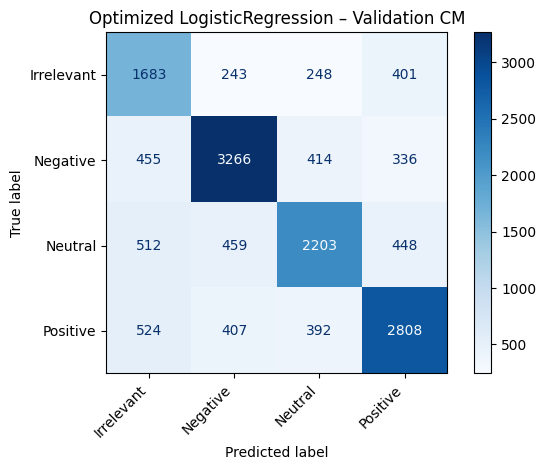

,params,mean_train_score,mean_test_score,std_test_score
1,"{'C': 7.915074397656218, 'max_iter': 300, 'mul...",0.780729,0.693088,0.019001
3,"{'C': 1.0129197956845732, 'max_iter': 500, 'mu...",0.717990,0.656391,0.015304
13,"{'C': 67.32248920775338, 'max_iter': 500, 'mul...",0.608249,0.576335,0.008040
15,"{'C': 2.608060094552367, 'max_iter': 500, 'mul...",0.600357,0.574317,0.009840
6,"{'C': 1.2229467525390603, 'max_iter': 500, 'mu...",0.601676,0.574113,0.013945


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import pandas as pd

# 1) Parametre dağılımı
param_dist_lr = {
    'C': loguniform(1e-3, 1e2),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'penalty': ['l2'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [300, 500]
}

# 2) Base estimator
lr_base = LogisticRegression(random_state=42, n_jobs=-1)

# 3) RandomizedSearchCV tanımı
rand_search_lr = RandomizedSearchCV(
    estimator=lr_base,
    param_distributions=param_dist_lr,
    n_iter=20,            
    cv=3,
    scoring='f1_macro',
    verbose=2,
    n_jobs=1,
    random_state=42,
    return_train_score=True
)

# 4) Optimizasyonu çalıştır ve süreyi ölç
print(f"[{time.strftime('%H:%M:%S')}] → LogisticRegression RandomizedSearchCV başlıyor...")
t0 = time.time()
rand_search_lr.fit(X_train_smote, y_train_smote)
print(f"[{time.strftime('%H:%M:%S')}] ← Tamamlandı. Süre: {time.time() - t0:.1f} s\n")

# 5) En iyi parametreler & CV skoru
print("### En İyi Hiperparametreler (LogisticRegression) ###")
print(rand_search_lr.best_params_)
print(f"En iyi CV f1_macro: {rand_search_lr.best_score_:.4f}\n")

# 6) Validation set performansı
best_lr = rand_search_lr.best_estimator_
y_val_pred = best_lr.predict(X_val)

print("### Validation Set Performansı ###")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 7) Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val, y_val_pred,
    display_labels=best_lr.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized LogisticRegression – Validation CM")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8) CV sonuçlarını incele
cv_df_lr = pd.DataFrame(rand_search_lr.cv_results_)
display(cv_df_lr[[
    'params','mean_train_score','mean_test_score','std_test_score'
]].sort_values('mean_test_score', ascending=False).head(5))


LogisticRegression – Test Set Accuracy: 0.6811946753158997

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.55      0.67      0.60      2575
    Negative       0.76      0.73      0.75      4472
     Neutral       0.67      0.62      0.64      3621
    Positive       0.71      0.69      0.70      4131

    accuracy                           0.68     14799
   macro avg       0.67      0.68      0.67     14799
weighted avg       0.69      0.68      0.68     14799



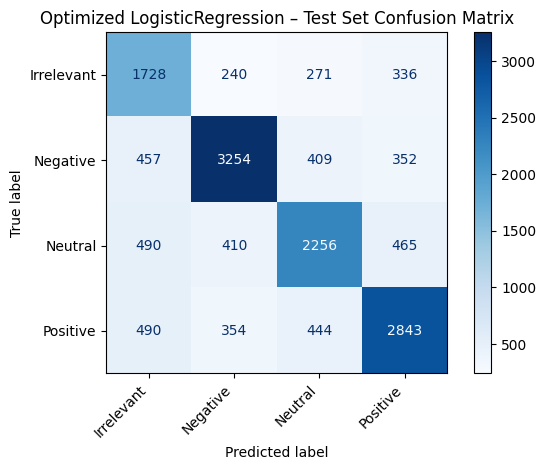

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1) Test set üzerinde tahmin
y_test_pred_lr = best_lr.predict(X_test)

# 2) Metrikler
print("LogisticRegression – Test Set Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("\nClassification Report:\n",
      classification_report(y_test, y_test_pred_lr))

# 3) Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_lr,
    display_labels=best_lr.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized LogisticRegression – Test Set Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### İlk Deneme ExtraClassifier

Extra Trees Classifier Modeli Eğitimi ve Değerlendirmesi Başlatılıyor...

Extra Trees Classifier Modeli oluşturuldu. Model eğitiliyor...
Extra Trees Classifier Model eğitimi 44.47 saniyede tamamlandı.

--- Doğrulama Seti Üzerinde Extra Trees Classifier Performansı ---
Extra Trees Classifier Model eğitimi 44.47 saniyede tamamlandı.

--- Doğrulama Seti Üzerinde Extra Trees Classifier Performansı ---
Doğruluk (Accuracy): 0.8827664702731655

Sınıflandırma Raporu (Classification Report):

Doğruluk (Accuracy): 0.8827664702731655

Sınıflandırma Raporu (Classification Report):

              precision    recall  f1-score   support

  Irrelevant       0.90      0.85      0.87      2598
    Negative       0.92      0.89      0.91      4508
     Neutral       0.82      0.91      0.86      3664
    Positive       0.90      0.87      0.89      4166

    accuracy                           0.88     14936
   macro avg       0.88      0.88      0.88     14936
weighted avg       0.89      0.88      0.88

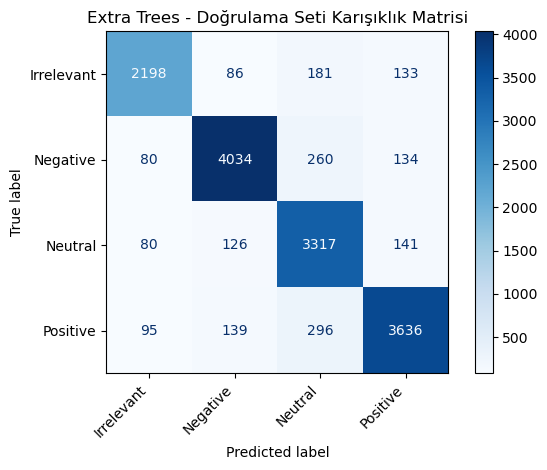

Extra Trees Classifier Eğitimi ve Değerlendirmesi Tamamlandı.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

if ('X_train_smote' in globals() and X_train_smote is not None and
    'y_train_smote' in globals() and y_train_smote is not None and
    'X_val' in globals() and X_val is not None and
    'y_val' in globals() and y_val is not None):

    print("="*50)
    print("Extra Trees Classifier Modeli Eğitimi ve Değerlendirmesi Başlatılıyor...")
    print("="*50)

    y_train_et = y_train_smote 
    y_val_et_original = y_val

    # Adım 1: ExtraTreesClassifier Modelini Oluşturma ve Eğitme
    et_model = ExtraTreesClassifier(
        n_estimators=150,       
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=1,
        class_weight='balanced_subsample'
    )

    print("\nExtra Trees Classifier Modeli oluşturuldu. Model eğitiliyor...")
    start_time_et = time.time()
    try:
        et_model.fit(X_train_smote, y_train_et)
        end_time_et = time.time()
        print(f"Extra Trees Classifier Model eğitimi {end_time_et - start_time_et:.2f} saniyede tamamlandı.")

        # Adım 2: Doğrulama Seti Üzerinde Performans Değerlendirmesi
        print("\n--- Doğrulama Seti Üzerinde Extra Trees Classifier Performansı ---")
        y_pred_val_et = et_model.predict(X_val)
        
        y_val_for_report_et = y_val_et_original
        y_pred_val_for_report_et = y_pred_val_et

        print("Doğruluk (Accuracy):", accuracy_score(y_val_for_report_et, y_pred_val_for_report_et))
        print("\nSınıflandırma Raporu (Classification Report):\n")
        
        display_labels_for_et_report = None
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            display_labels_for_et_report = label_encoder_xgb.classes_
        elif isinstance(y_val_for_report_et, pd.Series):
             display_labels_for_et_report = sorted(y_val_for_report_et.unique())
        elif isinstance(y_val_for_report_et, np.ndarray):
             display_labels_for_et_report = sorted(np.unique(y_val_for_report_et))

        print(classification_report(y_val_for_report_et, y_pred_val_for_report_et, target_names=display_labels_for_et_report))

        print("\nKarışıklık Matrisi (Confusion Matrix):")
        try:
            ConfusionMatrixDisplay.from_predictions(y_val_for_report_et,
                                                    y_pred_val_for_report_et,
                                                    display_labels=display_labels_for_et_report,
                                                    cmap=plt.cm.Blues)
            plt.title("Extra Trees - Doğrulama Seti Karışıklık Matrisi")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        except Exception as e_cm_et:
            print(f"Karışıklık matrisi çizilirken hata: {e_cm_et}")
        print("="*50)
        print("Extra Trees Classifier Eğitimi ve Değerlendirmesi Tamamlandı.")
        print("="*50)

    except Exception as e_et_fit:
        print(f"\nExtra Trees Classifier modeli eğitilirken/tahmin yapılırken bir HATA oluştu: {e_et_fit}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: Eğitim/Doğrulama kümeleri (X_train_smote, y_train_smote, X_val, y_val) bulunamadı.")

### Optimized ExtraClassifier

[20:01:30] → ExtraTrees RandomizedSearchCV başlıyor: 20 aday × 3 fold
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=238; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=238; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=9, n_estimators=238; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=166; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=166; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=9, n_estimators=166; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqr

c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\aslay\anaconda3\Lib\site-packages\

[20:04:13] ← Tamamlandı. Süre: 163.0 s

### En İyi Hiperparametreler (ExtraTrees) ###
{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 299}
En iyi CV f1_macro: 0.8745

### Validation Set Performansı (ExtraTrees) ###
Accuracy: 0.8899925670653422
              precision    recall  f1-score   support

  Irrelevant       0.89      0.85      0.87      2575
    Negative       0.91      0.91      0.91      4471
     Neutral       0.88      0.87      0.88      3622
    Positive       0.88      0.90      0.89      4131

    accuracy                           0.89     14799
   macro avg       0.89      0.89      0.89     14799
weighted avg       0.89      0.89      0.89     14799



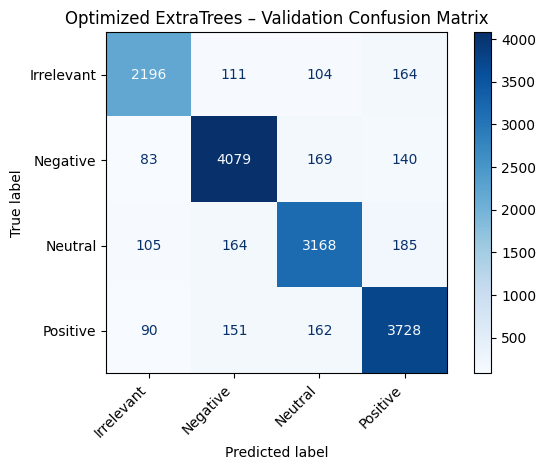

,params,mean_train_score,mean_test_score,std_test_score
19,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.969713,0.874473,0.010256
3,"{'bootstrap': False, 'max_depth': 25, 'max_fea...",0.658694,0.593197,0.004953
12,"{'bootstrap': False, 'max_depth': 15, 'max_fea...",0.628060,0.566302,0.002360
14,"{'bootstrap': True, 'max_depth': 25, 'max_feat...",0.598082,0.563099,0.006634
18,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.615330,0.560595,0.003187


In [89]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import pandas as pd

# 1) Hiperparametre arama uzayı
param_dist_et = {
    'n_estimators':      randint(50, 300),
    'max_depth':         [None] + list(range(5, 26, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf':  randint(1, 5),
    'max_features':      ['auto', 'sqrt', 'log2'],
    'bootstrap':         [True, False]
}

# 2) Base estimator
et_base = ExtraTreesClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample'
)

# 3) RandomizedSearchCV tanımı
rand_search_et = RandomizedSearchCV(
    estimator=et_base,
    param_distributions=param_dist_et,
    n_iter=20,           # Denenecek kombinasyon sayısı
    cv=3,
    scoring='f1_macro',
    verbose=2,           # Her aday ve fold için kısa çıktı
    n_jobs=1,            # Tek çekirdek çıktıları karışmasın
    random_state=42,
    return_train_score=True
)

# 4) Optimizasyonu çalıştır ve süreyi ölç
print(f"[{time.strftime('%H:%M:%S')}] → ExtraTrees RandomizedSearchCV başlıyor: "
      f"{rand_search_et.n_iter} aday × {rand_search_et.cv} fold")
t0 = time.time()
rand_search_et.fit(X_train_smote, y_train_smote)
print(f"[{time.strftime('%H:%M:%S')}] ← Tamamlandı. Süre: {time.time() - t0:.1f} s\n")

# 5) En iyi parametreler & CV skoru
print("### En İyi Hiperparametreler (ExtraTrees) ###")
print(rand_search_et.best_params_)
print(f"En iyi CV f1_macro: {rand_search_et.best_score_:.4f}\n")

# 6) Validation set performansı
best_et = rand_search_et.best_estimator_
y_val_pred = best_et.predict(X_val)

print("### Validation Set Performansı (ExtraTrees) ###")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 7) Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val, y_val_pred,
    display_labels=best_et.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized ExtraTrees – Validation Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8) CV sonuçlarını incele
cv_results_et = pd.DataFrame(rand_search_et.cv_results_)
display(cv_results_et[[
    'params', 'mean_train_score', 'mean_test_score', 'std_test_score'
]].sort_values('mean_test_score', ascending=False).head(5))


ExtraTrees – Test Set Accuracy: 0.8942496114602339

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.90      0.85      0.87      2575
    Negative       0.91      0.91      0.91      4472
     Neutral       0.88      0.88      0.88      3621
    Positive       0.88      0.91      0.90      4131

    accuracy                           0.89     14799
   macro avg       0.89      0.89      0.89     14799
weighted avg       0.89      0.89      0.89     14799



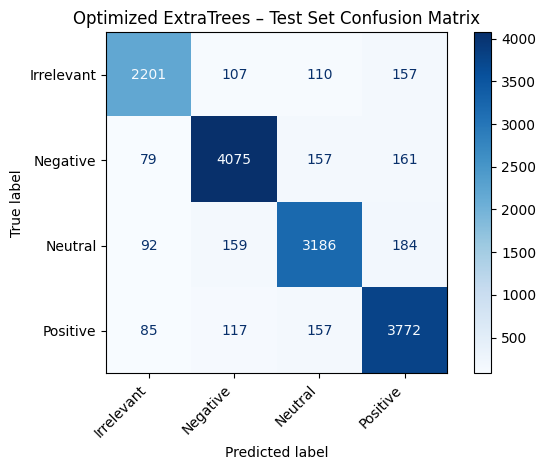

In [95]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Test set üzerinde tahmin
y_test_pred_et = best_et.predict(X_test)

# 2) Temel metrikler
print("ExtraTrees – Test Set Accuracy:", accuracy_score(y_test, y_test_pred_et))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_et))

# 3) Karışıklık Matrisi
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred_et,
    display_labels=best_et.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized ExtraTrees – Test Set Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ExtraTrees – Test Set Accuracy: 0.8942496114602339

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.90      0.85      0.87      2575
    Negative       0.91      0.91      0.91      4472
     Neutral       0.88      0.88      0.88      3621
    Positive       0.88      0.91      0.90      4131

    accuracy                           0.89     14799
   macro avg       0.89      0.89      0.89     14799
weighted avg       0.89      0.89      0.89     14799



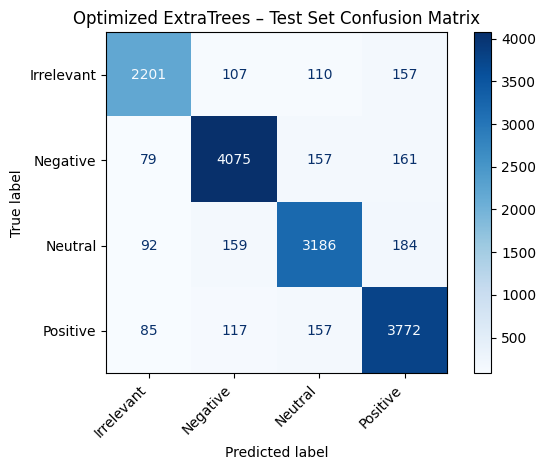

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# 1) En iyi model
best_et = rand_search_et.best_estimator_

# 2) Test set tahmini
y_test_pred_et = best_et.predict(X_test)

# 3) Metrikler
print("ExtraTrees – Test Set Accuracy:", accuracy_score(y_test, y_test_pred_et))
print("\nClassification Report:\n",
      classification_report(y_test, y_test_pred_et))

# 4) Karışıklık Matrisi
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_et,
    display_labels=best_et.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized ExtraTrees – Test Set Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Starting MultinomialNB hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...........alpha=0.3745401188473625, fit_prior=True; total time=   0.1s
[CV] END ...........alpha=0.3745401188473625, fit_prior=True; total time=   0.1s
[CV] END ...........alpha=0.3745401188473625, fit_prior=True; total time=   0.0s
[CV] END ..........alpha=0.1834347898661638, fit_prior=False; total time=   0.1s
[CV] END ..........alpha=0.1834347898661638, fit_prior=False; total time=   0.1s
[CV] END ..........alpha=0.1834347898661638, fit_prior=False; total time=   0.1s
[CV] END ...........alpha=0.5986584841970366, fit_prior=True; total time=   0.1s
[CV] END ...........alpha=0.5986584841970366, fit_prior=True; total time=   0.1s
[CV] END ...........alpha=0.5986584841970366, fit_prior=True; total time=   0.1s
[CV] END ..........alpha=0.44583275285359114, fit_prior=True; total time=   0.1s
[CV] END ..........alpha=0.44583275285359114, fit_prior=True; total time=   0.1s


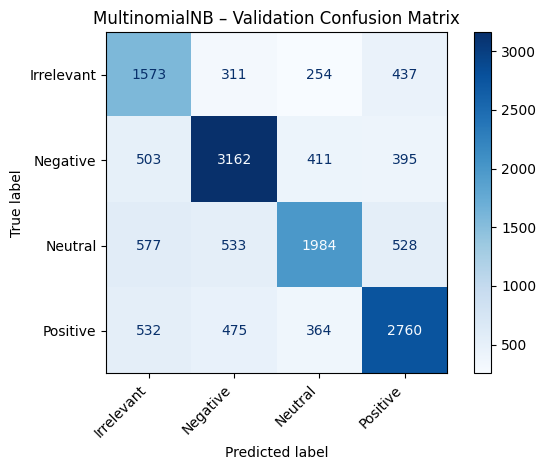

Test Accuracy: 0.6482194742888033

Test Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.51      0.61      0.56      2575
    Negative       0.72      0.71      0.71      4472
     Neutral       0.65      0.56      0.60      3621
    Positive       0.67      0.68      0.68      4131

    accuracy                           0.65     14799
   macro avg       0.64      0.64      0.64     14799
weighted avg       0.65      0.65      0.65     14799



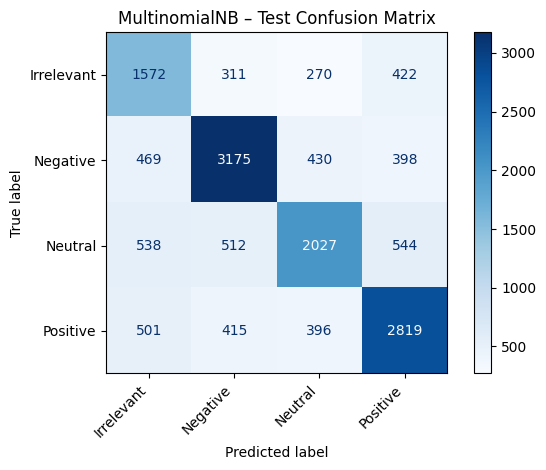

In [94]:
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
import pandas as pd

# 1) Convert all_features to CSR and slice TF-IDF + explicit feature
all_csr = all_features.tocsr()
n_tfidf = tfidf_features.shape[1]
n_explicit = 1
X_mnb = all_csr[:, :n_tfidf + n_explicit]

# 2) Train/Validation/Test split
X_temp_mnb, X_test_mnb, y_temp_mnb, y_test_mnb = train_test_split(
    X_mnb, Y, test_size=0.20, stratify=Y, random_state=42
)
X_train_mnb, X_val_mnb, y_train_mnb, y_val_mnb = train_test_split(
    X_temp_mnb, y_temp_mnb, test_size=0.25, stratify=y_temp_mnb, random_state=42
)

# 3) SMOTE on training portion
sm = SMOTE(random_state=42)
X_train_mnb_sm, y_train_mnb_sm = sm.fit_resample(X_train_mnb, y_train_mnb)

# 4) Hyperparameter optimization for MultinomialNB
param_dist_nb = {
    'alpha':     uniform(loc=0.0, scale=1.0),
    'fit_prior': [True, False]
}
nb_base = MultinomialNB()
rand_search_nb = RandomizedSearchCV(
    estimator=nb_base,
    param_distributions=param_dist_nb,
    n_iter=10,
    cv=3,
    scoring='f1_macro',
    verbose=2,
    n_jobs=1,
    random_state=42,
    return_train_score=True
)

print("Starting MultinomialNB hyperparameter search...")
start_time = time.time()
rand_search_nb.fit(X_train_mnb_sm, y_train_mnb_sm)
print(f"Completed in {time.time() - start_time:.1f} s\n")

print("Best parameters:", rand_search_nb.best_params_)
print("Best CV f1_macro:", rand_search_nb.best_score_)

# 5) Validation performance
best_nb = rand_search_nb.best_estimator_
y_val_pred = best_nb.predict(X_val_mnb)

print("Validation Accuracy:", accuracy_score(y_val_mnb, y_val_pred))
print("\nValidation Classification Report:\n",
      classification_report(y_val_mnb, y_val_pred))

ConfusionMatrixDisplay.from_predictions(
    y_val_mnb, y_val_pred, cmap=plt.cm.Blues
)
plt.title("MultinomialNB – Validation Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6) Test performance
y_test_pred = best_nb.predict(X_test_mnb)

print("Test Accuracy:", accuracy_score(y_test_mnb, y_test_pred))
print("\nTest Classification Report:\n",
      classification_report(y_test_mnb, y_test_pred))

ConfusionMatrixDisplay.from_predictions(
    y_test_mnb, y_test_pred, cmap=plt.cm.Blues
)
plt.title("MultinomialNB – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import xgboost as xgb

# 1) MLPClassifier
joblib.dump(best_mlp, "best_mlp.pkl")

# 2) XGBoost
#   a) sklearn API üzerinden:
joblib.dump(best_xgb, "best_xgb_sklearn.pkl")
#   b) veya XGBoost kendi formatında:
best_xgb.save_model("best_xgb.json")

# 3) Random Forest
joblib.dump(best_rf, "best_rf.pkl")

# 4) LinearSVC
joblib.dump(best_lsvc, "best_lsvc.pkl")

# 5) MultinomialNB
joblib.dump(best_nb, "best_nb.pkl")

# 6) ExtraTreesClassifier
joblib.dump(best_et, "best_extra_trees.pkl")

# 7) LogisticRegression
joblib.dump(best_lr, "best_logreg.pkl")


['best_logreg.pkl']

## İkincil veri seti eklenmiş hali

In [4]:
import pandas as pd

# 0) İkincil veri setinizi okuyun (yolunuzu güncelleyin)
extra_df = pd.read_csv("./datas/secondary_dataset.csv", encoding="utf8")

# 1) processed_text sütununu main_df ile aynı fonksiyonla oluşturun
#    Aşağıda önceki hücrenizdeki preprocess_text_with_stemmer_lang fonksiyonunu kullanıyoruz.
extra_df['processed_text'] = extra_df['text'].astype(str).apply(preprocess_text_with_stemmer_lang)

# 2) Artık pipe_extra’yu eğitebilirsiniz:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_extra = make_pipeline(
    TfidfVectorizer(max_features=3000, ngram_range=(1,2)),
    LogisticRegression(max_iter=200, random_state=42)
)
pipe_extra.fit(extra_df['processed_text'], extra_df['label'])


NameError: name 'preprocess_text_with_stemmer_lang' is not defined

In [3]:
# Eğitim notebook'unuzda bu kodu çalıştırın
import joblib

# pipe_extra'yı eğittiğiniz hücreden sonra bu hücreyi ekleyin
joblib.dump(pipe_extra, "./saved_objects/pipe_extra_sentiment.joblib")

print("pipe_extra_sentiment.joblib dosyası başarıyla kaydedildi.")

NameError: name 'pipe_extra' is not defined

In [ ]:
probas_main = pipe_extra.predict_proba(main_df['processed_text'])
probas_sparse = csr_matrix(probas_main)

all_enh = hstack([ all_features.tocsr(), probas_sparse ])

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_temp, X_test, y_temp, y_test = train_test_split(
    all_enh, Y, test_size=0.20, stratify=Y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [107]:
X_train.shape

(44397, 5013)

In [108]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(**best_mlp.get_params())
mlp.fit(X_train_sm, y_train_sm)
print("MLP Test Acc:", mlp.score(X_test, y_test))

Iteration 1, loss = 1.20488040
Validation score: 0.591688
Iteration 2, loss = 0.87344975
Validation score: 0.662691
Iteration 3, loss = 0.74308554
Validation score: 0.697167
Iteration 4, loss = 0.67854652
Validation score: 0.702385
Iteration 5, loss = 0.62703489
Validation score: 0.725121
Iteration 6, loss = 0.59471846
Validation score: 0.703690
Iteration 7, loss = 0.56857071
Validation score: 0.694745
Iteration 8, loss = 0.54581474
Validation score: 0.744502
Iteration 9, loss = 0.50237960
Validation score: 0.745993
Iteration 10, loss = 0.46866547
Validation score: 0.758107
Iteration 11, loss = 0.42851215
Validation score: 0.752516
Iteration 12, loss = 0.40363948
Validation score: 0.773574
Iteration 13, loss = 0.36310652
Validation score: 0.778233
Iteration 14, loss = 0.32876629
Validation score: 0.788856
Iteration 15, loss = 0.30326191
Validation score: 0.796496
Iteration 16, loss = 0.27617680
Validation score: 0.802833
Iteration 17, loss = 0.25090296
Validation score: 0.807305
Iterat

c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\aslay\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGB (enh) Test Acc: 0.6970741266301778
              precision    recall  f1-score   support

  Irrelevant       0.58      0.64      0.61      2575
    Negative       0.76      0.75      0.75      4472
     Neutral       0.69      0.64      0.66      3621
    Positive       0.72      0.72      0.72      4131

    accuracy                           0.70     14799
   macro avg       0.69      0.69      0.69     14799
weighted avg       0.70      0.70      0.70     14799



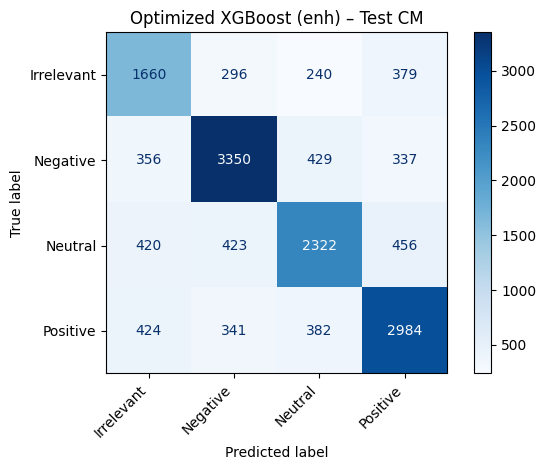

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
le.fit(np.concatenate([y_train_sm, y_val]))

# 2) String etiketleri sayısala çevir
y_train_enc = le.transform(y_train_sm)
y_val_enc   = le.transform(y_val)

# 3) XGBoost’u uyarı kapalı olarak ayarla
best_xgb.set_params(use_label_encoder=False)

# 4) Yeniden eğit
best_xgb.fit(
    X_train_sm, y_train_enc,
    eval_set=[(X_val, y_val_enc)],
    early_stopping_rounds=10,
    verbose=False
)

# 5) Test üzerinde tahmin ve orijinale geri çevir
y_test_pred_enc = best_xgb.predict(X_test)
y_test_pred     = le.inverse_transform(y_test_pred_enc)

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("XGB (enh) Test Acc:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=le.classes_,
    cmap=plt.cm.Blues
)
plt.title("Optimized XGBoost (enh) – Test CM")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Random Forest (enhanced) – Test Accuracy : 0.7326
Random Forest (enhanced) – Test F1 Macro: 0.7247

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.72      0.64      0.68      2575
    Negative       0.75      0.79      0.77      4472
     Neutral       0.72      0.69      0.70      3621
    Positive       0.73      0.77      0.75      4131

    accuracy                           0.73     14799
   macro avg       0.73      0.72      0.72     14799
weighted avg       0.73      0.73      0.73     14799



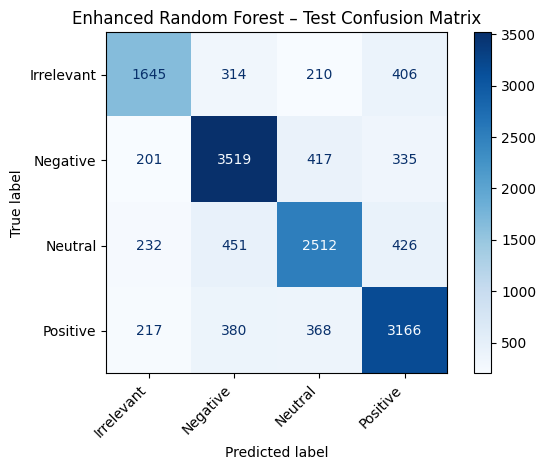

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Parametreleri al ve n_jobs’u kaldır
rf_params = best_rf.get_params()
rf_params.pop('n_jobs', None)                 
rf_params['n_jobs'] = 1                     

# 2) Yeni modeli bu parametrelerle oluştur
rf_enh = RandomForestClassifier(**rf_params)

# 3) Eğit
rf_enh.fit(X_train_sm, y_train_sm)

# 4) Test üzerinde tahmin
y_test_pred = rf_enh.predict(X_test)

# 5) Metrikler
acc = accuracy_score(y_test, y_test_pred)
f1  = f1_score(y_test, y_test_pred, average='macro')
print(f"Random Forest (enhanced) – Test Accuracy : {acc:.4f}")
print(f"Random Forest (enhanced) – Test F1 Macro: {f1:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# 6) Karışıklık Matrisi
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=rf_enh.classes_,
    cmap=plt.cm.Blues
)
plt.title("Enhanced Random Forest – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Random Forest (enhanced) – Test Accuracy : 0.7326
Random Forest (enhanced) – Test F1 Macro: 0.7247

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.72      0.64      0.68      2575
    Negative       0.75      0.79      0.77      4472
     Neutral       0.72      0.69      0.70      3621
    Positive       0.73      0.77      0.75      4131

    accuracy                           0.73     14799
   macro avg       0.73      0.72      0.72     14799
weighted avg       0.73      0.73      0.73     14799



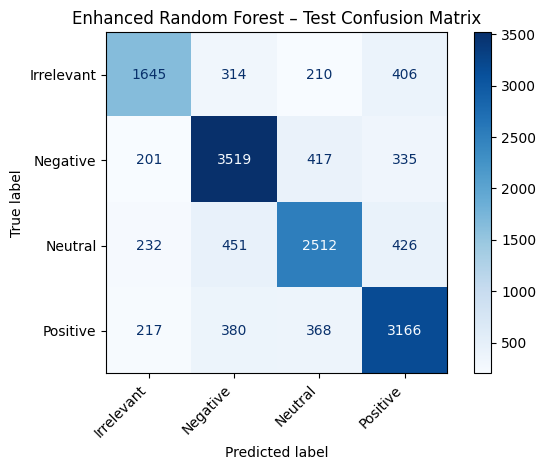

In [125]:
# 3) Predict on the test split
y_test_pred = rf_enh.predict(X_test)

# 4) Compute metrics
acc = accuracy_score(y_test, y_test_pred)
f1  = f1_score(y_test, y_test_pred, average='macro')

print(f"Random Forest (enhanced) – Test Accuracy : {acc:.4f}")
print(f"Random Forest (enhanced) – Test F1 Macro: {f1:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# 5) Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=rf_enh.classes_,
    cmap=plt.cm.Blues
)
plt.title("Enhanced Random Forest – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

LinearSVC (enhanced) – Test Accuracy : 0.6863
LinearSVC (enhanced) – Test F1 Macro: 0.6784

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.56      0.68      0.61      2575
    Negative       0.76      0.73      0.74      4472
     Neutral       0.68      0.63      0.65      3621
    Positive       0.71      0.69      0.70      4131

    accuracy                           0.69     14799
   macro avg       0.68      0.68      0.68     14799
weighted avg       0.69      0.69      0.69     14799



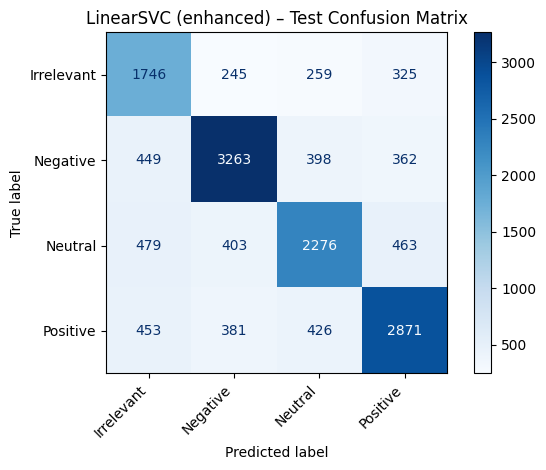

In [120]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) (Re)Instantiate & train on your enhanced SMOTE‐resampled training set
lsvc_enh = LinearSVC(**best_lsvc.get_params())
lsvc_enh.fit(X_train_sm, y_train_sm)

# 2) Predict on the test split
y_test_pred = lsvc_enh.predict(X_test)

# 3) Compute metrics
acc = accuracy_score(y_test, y_test_pred)
f1  = f1_score(y_test, y_test_pred, average='macro')

print(f"LinearSVC (enhanced) – Test Accuracy : {acc:.4f}")
print(f"LinearSVC (enhanced) – Test F1 Macro: {f1:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# 4) Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=lsvc_enh.classes_,
    cmap=plt.cm.Blues
)
plt.title("LinearSVC (enhanced) – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [119]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(**best_lsvc.get_params())
lsvc.fit(X_train_sm, y_train_sm)
print("LSVC Test Acc:", lsvc.score(X_test, y_test))

LSVC Test Acc: 0.6862625853098182


MNB (enhanced) – Val Accuracy : 0.6414622609635786
MNB (enhanced) – Val F1 Macro: 0.6299959996589187

MNB (enhanced) – Test Accuracy : 0.6467328873572539
MNB (enhanced) – Test F1 Macro: 0.635348169200646

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.51      0.60      0.55      2575
    Negative       0.71      0.71      0.71      4472
     Neutral       0.65      0.56      0.60      3621
    Positive       0.68      0.69      0.68      4131

    accuracy                           0.65     14799
   macro avg       0.64      0.64      0.64     14799
weighted avg       0.65      0.65      0.65     14799



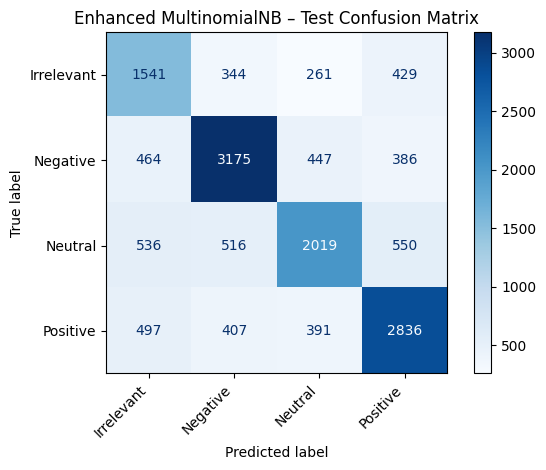

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1) Identify slice indices ---
n_tfidf    = tfidf_features.shape[1]        
n_explicit = 1                             
n_proba    = probas_main.shape[1]           

# Convert enhanced features to CSR
all_csr = all_enh.tocsr()

# Slice: TF–IDF + explicit
X_base_feats = all_csr[:, : (n_tfidf + n_explicit)]
# Slice: extra-duygu proba (assumed at the end)
X_proba_feats = all_csr[:, -n_proba :]

# Construct the MNB-compatible feature matrix
X_mnb_enh = hstack([X_base_feats, X_proba_feats])

# --- 2) Train/Val/Test split ---
X_tmp, X_test_mnb, y_tmp, y_test_mnb = train_test_split(
    X_mnb_enh, Y,
    test_size=0.20, stratify=Y, random_state=42
)
X_train_mnb, X_val_mnb, y_train_mnb, y_val_mnb = train_test_split(
    X_tmp, y_tmp,
    test_size=0.25, stratify=y_tmp, random_state=42
)

# --- 3) SMOTE on training split ---
sm = SMOTE(random_state=42)
X_train_mnb_sm, y_train_mnb_sm = sm.fit_resample(X_train_mnb, y_train_mnb)

# --- 4) Train & evaluate MultinomialNB ---
mnb_enh = MultinomialNB(**best_nb.get_params())
mnb_enh.fit(X_train_mnb_sm, y_train_mnb_sm)

# Validation
y_val_pred = mnb_enh.predict(X_val_mnb)
print("MNB (enhanced) – Val Accuracy :", accuracy_score(y_val_mnb, y_val_pred))
print("MNB (enhanced) – Val F1 Macro:", f1_score(y_val_mnb, y_val_pred, average='macro'))

# Test
y_test_pred = mnb_enh.predict(X_test_mnb)
print("\nMNB (enhanced) – Test Accuracy :", accuracy_score(y_test_mnb, y_test_pred))
print("MNB (enhanced) – Test F1 Macro:", f1_score(y_test_mnb, y_test_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test_mnb, y_test_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test_mnb, y_test_pred,
    cmap=plt.cm.Blues
)
plt.title("Enhanced MultinomialNB – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ExtraTrees (enhanced) – Test Accuracy : 0.8839
ExtraTrees (enhanced) – Test F1 Macro: 0.8816

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.91      0.83      0.87      2575
    Negative       0.90      0.91      0.90      4472
     Neutral       0.88      0.86      0.87      3621
    Positive       0.86      0.91      0.89      4131

    accuracy                           0.88     14799
   macro avg       0.89      0.88      0.88     14799
weighted avg       0.88      0.88      0.88     14799



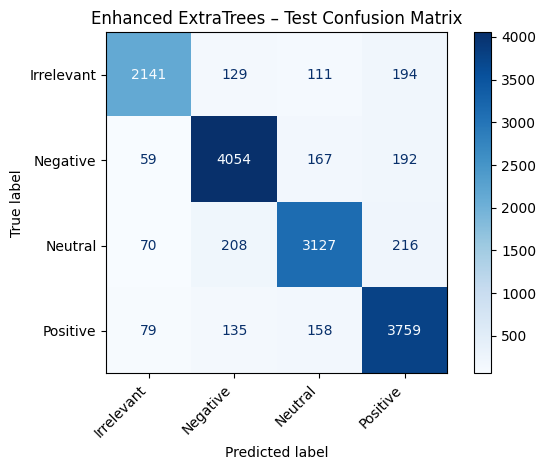

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Re-instantiate with your best parameters 
et_params = best_et.get_params()
et_params.pop('n_jobs', None)
et_params['n_jobs'] = -1
et_enh = ExtraTreesClassifier(**et_params)

# 2) Train on the enhanced SMOTE’ed training set
et_enh.fit(X_train_sm, y_train_sm)

# 3) Predict on the test split
y_test_pred_et = et_enh.predict(X_test)

# 4) Compute Test Accuracy and Macro F1
acc_et = accuracy_score(y_test, y_test_pred_et)
f1_et  = f1_score(y_test, y_test_pred_et, average='macro')

print(f"ExtraTrees (enhanced) – Test Accuracy : {acc_et:.4f}")
print(f"ExtraTrees (enhanced) – Test F1 Macro: {f1_et:.4f}\n")

# 5) Detailed report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_test_pred_et))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_et,
    display_labels=et_enh.classes_,
    cmap=plt.cm.Blues
)
plt.title("Enhanced ExtraTrees – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


c:\Users\aslay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


LogisticRegression (enhanced) – Test Accuracy : 0.6796
LogisticRegression (enhanced) – Test F1 Macro: 0.6714

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.55      0.67      0.60      2575
    Negative       0.76      0.72      0.74      4472
     Neutral       0.66      0.62      0.64      3621
    Positive       0.71      0.69      0.70      4131

    accuracy                           0.68     14799
   macro avg       0.67      0.68      0.67     14799
weighted avg       0.69      0.68      0.68     14799



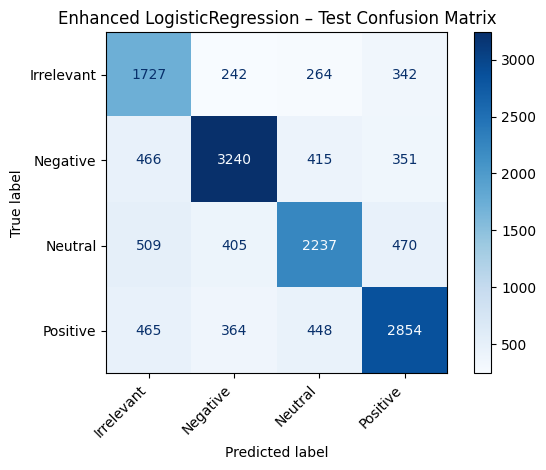

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Parametreleri al ve n_jobs’u kaldır/ayarla
lr_params = best_lr.get_params()
lr_params.pop('n_jobs', None)  
lr_params['n_jobs'] = -1        

# 2) Yeni LogisticRegression örneği oluştur
lr_enh = LogisticRegression(**lr_params)

# 3) Enhanced (entity + extra-duygu-proba) SMOTE’lu eğitim seti üzerinde eğit
lr_enh.fit(X_train_sm, y_train_sm)

# 4) Test set üzerinde tahmin
y_test_pred = lr_enh.predict(X_test)

# 5) Test metriklerini hesapla
acc = accuracy_score(y_test, y_test_pred)
f1  = f1_score(y_test, y_test_pred, average='macro')

print(f"LogisticRegression (enhanced) – Test Accuracy : {acc:.4f}")
print(f"LogisticRegression (enhanced) – Test F1 Macro: {f1:.4f}\n")

# 6) Detaylı sınıflandırma raporu ve karışıklık matrisi
print("Classification Report:\n", classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    display_labels=lr_enh.classes_,
    cmap=plt.cm.Blues
)
plt.title("Enhanced LogisticRegression – Test Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# 1) MLPClassifier (enhanced)
joblib.dump(mlp, "mlp_enhanced.pkl")

# 2) XGBoost (enhanced)
joblib.dump(best_xgb, "xgb_enhanced_sklearn.pkl")
# Optionally also in native XGBoost format:
best_xgb.save_model("xgb_enhanced.json")

# 3) RandomForestClassifier (enhanced)
joblib.dump(rf_enh, "rf_enhanced.pkl")

# 4) LinearSVC (enhanced)
joblib.dump(lsvc_enh, "lsvc_enhanced.pkl")

# 5) MultinomialNB (enhanced)
joblib.dump(mnb_enh, "mnb_enhanced.pkl")

# 6) ExtraTreesClassifier (enhanced)
joblib.dump(et_enh, "et_enhanced.pkl")

# 7) LogisticRegression (enhanced)
joblib.dump(lr_enh, "lr_enhanced.pkl")


['lr_enhanced.pkl']

## 2. Yöntem

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

# main_df'in, 'processed_text' ve 'Sentiment' sütunlarının
# ve X_train, X_val, X_test (indeksleri için) ve y_train, y_val, y_test (etiketler için)
# değişkenlerinin bir önceki adımlardan tanımlı olduğunu varsayıyoruz.

if ('main_df' in globals() and 'processed_text' in main_df.columns and
    'X_train' in globals() and 'X_val' in globals() and 'X_test' in globals() and
    'y_train' in globals() and 'y_val' in globals() and 'y_test' in globals()):

    print("RNN için Veri Hazırlığı Başlıyor...")

    # Tokenizer'ı eğitim verisi üzerinde fit edelim
    # processed_text sütunundaki metinleri alacağız, ancak X_train'in indekslerine göre
    # Bu, train_test_split yapıldıktan sonra veri sızıntısını engeller.
    # X_train, X_val, X_test seyrek matrislerdi. Orijinal indekslerini almamız lazım.
    # Daha önce train_test_split yaparken Y'yi (pandas Serisi) kullandık.
    # y_train, y_val, y_test'in indeksleri orijinal main_df'teki indekslerdir.
    
    train_texts_rnn = main_df.loc[y_train.index, 'processed_text'].astype(str)
    val_texts_rnn = main_df.loc[y_val.index, 'processed_text'].astype(str)
    test_texts_rnn = main_df.loc[y_test.index, 'processed_text'].astype(str)

    # Tokenizer'ı oluşturma ve eğitim metinleri üzerinde fit etme
    # vocab_size: Kelime dağarcığındaki maksimum kelime sayısı (en sık N kelime)
    # oov_token: Kelime dağarcığında olmayan kelimeler için kullanılacak özel token
    vocab_size = 10000 # Deneyebileceğimiz bir değer, TF-IDF'teki max_features gibi
    oov_tok = "<OOV>"  # Out-of-vocabulary token

    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(train_texts_rnn)

    word_index = tokenizer.word_index
    print(f"Kelime dağarcığında {len(word_index)} benzersiz token bulundu.")
    # print("Kelime indeksinden örnekler:", list(word_index.items())[:10])


    # Metinleri sayı dizilerine dönüştürme
    X_train_sequences = tokenizer.texts_to_sequences(train_texts_rnn)
    X_val_sequences = tokenizer.texts_to_sequences(val_texts_rnn)
    X_test_sequences = tokenizer.texts_to_sequences(test_texts_rnn)

    # Padding uygulama
    # max_length: Tüm dizilerin getirileceği maksimum uzunluk.
    # Ortalama veya medyan tweet uzunluğuna bakarak bir değer seçebiliriz veya sabit bir değer alabiliriz.
    # padding='post': Padding'i dizinin sonuna ekler.
    # truncating='post': Uzun dizileri sondan kırpar.
    
    # Ortalama veya 95. persentil dizi uzunluğunu bulalım (padding için fikir verir)
    all_lengths = [len(seq) for seq in X_train_sequences]
    # plt.hist(all_lengths, bins=50) # Uzunluk dağılımını görmek için
    # plt.show()
    # print(f"Ortalama dizi uzunluğu: {np.mean(all_lengths):.2f}")
    # print(f"Medyan dizi uzunluğu: {np.median(all_lengths):.0f}")
    # print(f"95. persentil dizi uzunluğu: {np.percentile(all_lengths, 95):.0f}")

    max_length = 50 # Deneyebileceğimiz bir değer (tweet'ler genellikle çok uzun olmaz)
                    # Yukarıdaki persentil değerine göre ayarlayabilirsiniz.
    padding_type = 'post'
    truncation_type = 'post'

    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=truncation_type)
    X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding=padding_type, truncating=truncation_type)
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=truncation_type)

    print(f"\nPadding sonrası eğitim verisi şekli: {X_train_padded.shape}")
    print(f"Padding sonrası doğrulama verisi şekli: {X_val_padded.shape}")
    print(f"Padding sonrası test verisi şekli: {X_test_padded.shape}")
    # print("Örnek pad'lenmiş dizi (ilk eğitim örneği):", X_train_padded[0])


    # Hedef etiketlerini (Y) RNN için hazırlama
    # Genellikle one-hot encoding veya integer encoding (0, 1, 2, 3) kullanılır.
    # Eğer 'categorical_crossentropy' loss kullanacaksak one-hot encoding,
    # 'sparse_categorical_crossentropy' loss kullanacaksak integer encoding gerekir.
    # Daha önce LabelEncoder (label_encoder_xgb) kullanmıştık, onu tekrar kullanabiliriz.

    if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None:
        y_train_rnn_encoded = label_encoder_xgb.transform(y_train)
        y_val_rnn_encoded = label_encoder_xgb.transform(y_val)
        y_test_rnn_encoded = label_encoder_xgb.transform(y_test)
        print("\nEtiketler RNN için (LabelEncoder ile) sayısallaştırıldı.")
        # print(f"Örnek y_train_rnn_encoded: {y_train_rnn_encoded[:5]}")
        # print(f"Sınıf sayısı: {len(label_encoder_xgb.classes_)}")
    else:
        print("UYARI: LabelEncoder (label_encoder_xgb) bulunamadı. Etiketler olduğu gibi kullanılıyor.")
        print("Eğer etiketler string ise, model derlemesinde sorun yaşanabilir veya one-hot encode etmeniz gerekebilir.")
        y_train_rnn_encoded = y_train # Bu durumda y_train'in zaten uygun formatta olması lazım
        y_val_rnn_encoded = y_val
        y_test_rnn_encoded = y_test

    print(f"y_train_rnn_encoded şekli: {y_train_rnn_encoded.shape}")
    print("RNN için veri hazırlığı tamamlandı.")
    print("="*50)

else:
    print("HATA: RNN veri hazırlığı için gerekli DataFrame veya değişkenler bulunamadı.")
    print("Lütfen main_df, processed_text, X_train, y_train vb. değişkenlerin tanımlı olduğundan emin olun.")

RNN için Veri Hazırlığı Başlıyor...
Kelime dağarcığında 25046 benzersiz token bulundu.
Kelime dağarcığında 25046 benzersiz token bulundu.

Padding sonrası eğitim verisi şekli: (44808, 50)
Padding sonrası doğrulama verisi şekli: (14936, 50)
Padding sonrası test verisi şekli: (14937, 50)

Etiketler RNN için (LabelEncoder ile) sayısallaştırıldı.
y_train_rnn_encoded şekli: (44808,)
RNN için veri hazırlığı tamamlandı.

Padding sonrası eğitim verisi şekli: (44808, 50)
Padding sonrası doğrulama verisi şekli: (14936, 50)
Padding sonrası test verisi şekli: (14937, 50)

Etiketler RNN için (LabelEncoder ile) sayısallaştırıldı.
y_train_rnn_encoded şekli: (44808,)
RNN için veri hazırlığı tamamlandı.


In [45]:
%pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Bir önceki adımdan gelen değişkenler:
# vocab_size = 10000 (Tokenizer'da kullandığımız)
# max_length = 50 (Padding'de kullandığımız)
# X_train_padded, y_train_rnn_encoded
# X_val_padded, y_val_rnn_encoded

# Model parametreleri
embedding_dim = 100  # Her kelime için embedding vektörünün boyutu (deneyebileceğimiz bir değer)
lstm_units = 64      # LSTM katmanındaki birim sayısı (deneyebileceğimiz bir değer)
num_classes = len(np.unique(y_train_rnn_encoded)) # Sınıf sayısı (daha önce label_encoder_xgb.classes_ ile bulmuştuk)
                                                # veya len(pd.Series(y_train_smote).unique())

if 'X_train_padded' in globals() and 'y_train_rnn_encoded' in globals():
    print("="*50)
    print("Basit LSTM Modeli Oluşturuluyor (Embedding'ler Model İçinde Öğrenilecek)...")
    print("="*50)

    model_lstm = Sequential([
        # 1. Embedding Katmanı
        # input_dim: Kelime dağarcığının boyutu (en sık N kelime + OOV token + padding token için yer)
        #            Tokenizer'daki num_words'e eşit veya biraz büyük olmalı. Genellikle vocab_size + 1 (0 padding için)
        # output_dim: Embedding vektörünün boyutu
        # input_length: Girdi dizilerinin uzunluğu
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        
        # 2. LSTM Katmanı
        # Bidirectional LSTM genellikle daha iyi performans verir
        Bidirectional(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2)), # Dropout eklendi
        
        # (İsteğe Bağlı) Ekstra Dense katmanlar eklenebilir
        # Dense(units=32, activation='relu'),
        # Dropout(0.5),
        
        # 3. Çıkış Katmanı
        # num_classes: Sınıf sayısı (bizde 4)
        # activation='softmax': Çok sınıflı sınıflandırma için
        Dense(units=num_classes, activation='softmax')
    ])

    # Modeli Derleme
    # sparse_categorical_crossentropy: Etiketler tam sayı (0,1,2,3) ise kullanılır.
    # Eğer etiketler one-hot encoded olsaydı categorical_crossentropy kullanılırdı.
    model_lstm.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001), # Adam optimizer, öğrenme oranı ayarlanabilir
        metrics=['accuracy']
    )

    # Modelin özetini yazdıralım
    model_lstm.summary()
    
    print("\nBasit LSTM Modeli başarıyla oluşturuldu ve derlendi.")
    print("Sonraki adım bu modeli X_train_padded, y_train_rnn_encoded ile eğitmektir.")
    print("="*50)

    # Bir sonraki hücrede modeli eğitebiliriz:
    # history = model_lstm.fit(
    #     X_train_padded, y_train_rnn_encoded,
    #     epochs=10, # Deneme için düşük bir epoch sayısı
    #     batch_size=64, # Batch boyutu
    #     validation_data=(X_val_padded, y_val_rnn_encoded),
    #     callbacks=[
    #         tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    #         # tf.keras.callbacks.ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss')
    #     ]
    # )
else:
    print("HATA: LSTM modeli oluşturmak için gerekli X_train_padded veya y_train_rnn_encoded bulunamadı.")

Basit LSTM Modeli Oluşturuluyor (Embedding'ler Model İçinde Öğrenilecek)...


c:\Users\aslay\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Basit LSTM Modeli başarıyla oluşturuldu ve derlendi.
Sonraki adım bu modeli X_train_padded, y_train_rnn_encoded ile eğitmektir.


LSTM Model Eğitimi Başlatılıyor...
Eğitim 15 epoch ve 64 batch boyutu ile yapılacak.
Early stopping: monitor='val_loss', patience=3, restore_best_weights=True
Epoch 1/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4849 - loss: 1.1644 - val_accuracy: 0.6654 - val_loss: 0.8483
Epoch 2/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4849 - loss: 1.1644 - val_accuracy: 0.6654 - val_loss: 0.8483
Epoch 2/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7298 - loss: 0.7066 - val_accuracy: 0.7057 - val_loss: 0.7526
Epoch 3/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7298 - loss: 0.7066 - val_accuracy: 0.7057 - val_loss: 0.7526
Epoch 3/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7862 - loss: 0.5598 - val_accuracy: 0.7374 - val_loss: 0.6881
Epoch 4/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7862 - loss: 0.5598 - val_accuracy: 0.7374 - val_loss: 0.6881
Epoch 4/15
701/701 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accur

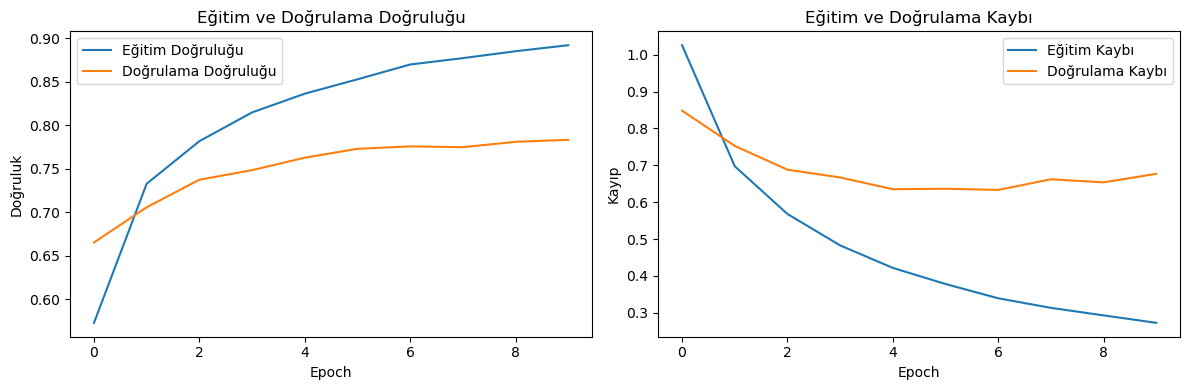


--- Doğrulama Seti Üzerinde Eğitilmiş LSTM Performansı ---
Doğrulama Kaybı (Loss): 0.6332
Doğrulama Doğruluğu (Accuracy): 0.7757
Doğrulama Kaybı (Loss): 0.6332
Doğrulama Doğruluğu (Accuracy): 0.7757
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Sınıflandırma Raporu (Doğrulama Seti):
               precision    recall  f1-score   support

  Irrelevant       0.74      0.71      0.73      2598
    Negative       0.80      0.81      0.81      4508
     Neutral       0.79      0.74      0.77      3664
    Positive       0.75      0.81      0.78      4166

    accuracy                           0.78     14936
   macro avg       0.77      0.77      0.77     14936
weighted avg       0.78      0.78      0.78     14936


Karışıklık Matrisi (Doğrulama Seti):

Sınıflandırma Raporu (Doğrulama Seti):
               precision    recall  f1-score   support

  Irrelevant       0.74      0.71      0.73      2598
    Negative       0.80      0.81      0.81      4508


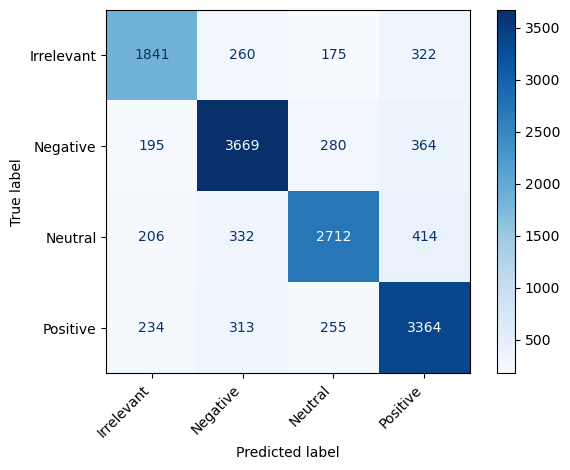

In [47]:
import tensorflow as tf # Callbacks için
import matplotlib.pyplot as plt # Grafik çizdirmek için

# X_train_padded, y_train_rnn_encoded, X_val_padded, y_val_rnn_encoded
# ve model_lstm değişkenlerinin bir önceki hücrelerden tanımlı olduğunu varsayıyoruz.

if ('model_lstm' in globals() and model_lstm is not None and
    'X_train_padded' in globals() and 'y_train_rnn_encoded' in globals() and
    'X_val_padded' in globals() and 'y_val_rnn_encoded' in globals()):

    print("="*50)
    print("LSTM Model Eğitimi Başlatılıyor...")
    print("="*50)

    epochs = 15 # Başlangıç için epoch sayısı (artırılabilir)
    batch_size = 64 # Batch boyutu

    # Callbacks
    # EarlyStopping: Doğrulama kaybı (val_loss) belirli bir sabır (patience) boyunca iyileşmezse eğitimi durdurur.
    # restore_best_weights=True: Eğitim durduğunda en iyi performansı veren epoch'taki ağırlıkları geri yükler.
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3, # 3 epoch boyunca iyileşme olmazsa dur
        restore_best_weights=True,
        verbose=1
    )

    # ModelCheckpoint (İsteğe Bağlı): Her epoch sonunda veya sadece en iyi modeli kaydeder.
    # model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    #     'best_lstm_model.keras', # .keras uzantısı tavsiye edilir
    #     save_best_only=True,
    #     monitor='val_loss',
    #     verbose=1
    # )
    # callbacks_list = [early_stopping_cb, model_checkpoint_cb]
    
    callbacks_list = [early_stopping_cb] # Şimdilik sadece early stopping

    print(f"Eğitim {epochs} epoch ve {batch_size} batch boyutu ile yapılacak.")
    print(f"Early stopping: monitor='val_loss', patience=3, restore_best_weights=True")
    
    start_time_lstm_fit = time.time()
    try:
        history = model_lstm.fit(
            X_train_padded, y_train_rnn_encoded,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_padded, y_val_rnn_encoded),
            callbacks=callbacks_list,
            verbose=1 # Her epoch için log basar (0=sessiz, 1=ilerleme çubuğu, 2=epoch başına bir satır)
        )
        end_time_lstm_fit = time.time()
        print(f"\nLSTM Model eğitimi {end_time_lstm_fit - start_time_lstm_fit:.2f} saniyede tamamlandı.")
        print("="*50)

        # Eğitim ve doğrulama metriklerini çizdirelim
        print("\nEğitim ve Doğrulama Metrikleri Grafikleri Çizdiriliyor...")
        
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
        plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
        plt.title('Eğitim ve Doğrulama Doğruluğu')
        plt.xlabel('Epoch')
        plt.ylabel('Doğruluk')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Eğitim Kaybı')
        plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
        plt.title('Eğitim ve Doğrulama Kaybı')
        plt.xlabel('Epoch')
        plt.ylabel('Kayıp')
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        # Doğrulama seti üzerinde son bir değerlendirme (EarlyStopping en iyi ağırlıkları geri yükledi)
        print("\n--- Doğrulama Seti Üzerinde Eğitilmiş LSTM Performansı ---")
        loss_val, accuracy_val = model_lstm.evaluate(X_val_padded, y_val_rnn_encoded, verbose=0)
        print(f"Doğrulama Kaybı (Loss): {loss_val:.4f}")
        print(f"Doğrulama Doğruluğu (Accuracy): {accuracy_val:.4f}")

        # Sınıflandırma raporu ve karışıklık matrisi
        y_pred_val_lstm_probs = model_lstm.predict(X_val_padded)
        y_pred_val_lstm_classes = np.argmax(y_pred_val_lstm_probs, axis=1) # Olasılıklardan sınıfları al

        # y_val_rnn_encoded zaten sayısal (0,1,2,3). Sınıflandırma raporu için orijinal string etiketleri kullanalım.
        # label_encoder_xgb'nin tanımlı olduğunu varsayıyoruz.
        report_target_names = None
        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None:
            y_val_original_strings = label_encoder_xgb.inverse_transform(y_val_rnn_encoded)
            y_pred_val_lstm_strings = label_encoder_xgb.inverse_transform(y_pred_val_lstm_classes)
            report_target_names = label_encoder_xgb.classes_
            print("\nSınıflandırma Raporu (Doğrulama Seti):\n", classification_report(y_val_original_strings, y_pred_val_lstm_strings, target_names=report_target_names))

            print("\nKarışıklık Matrisi (Doğrulama Seti):")
            ConfusionMatrixDisplay.from_predictions(y_val_original_strings, y_pred_val_lstm_strings, display_labels=report_target_names, cmap=plt.cm.Blues)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("UYARI: LabelEncoder bulunamadığı için sınıflandırma raporu ve karışıklık matrisi sayısal etiketlerle gösterilecek veya atlanacak.")
            print("\nSınıflandırma Raporu (Doğrulama Seti - Sayısal Etiketler):\n", classification_report(y_val_rnn_encoded, y_pred_val_lstm_classes))


    except Exception as e_fit_lstm:
        print(f"\nLSTM modeli eğitilirken bir HATA oluştu: {e_fit_lstm}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: LSTM modeli eğitimi için gerekli değişkenler bulunamadı.")

In [49]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [52]:
%pip install --upgrade gensim scipy numpy

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 4.2 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/24.0 MB 4.5 MB/s eta 0:00:06
   ---- ----------------------------------- 2.6/24.0 MB 4.9 MB/s eta 0:00:05
   ----- ---------------------------------- 3.4/24.0 MB 4.8 MB/s eta 0:00:05
   ------- -------------------------------- 4.7/24.0 MB 5.0 MB/s eta 0:00:04
   --------- ------------------------------ 5.8/24.0 MB 5.0 MB/s eta 0:00:04
   ----------- ---------------------------- 6.8/24.0 MB 5.1 MB/s eta 0:00:04
   ------------- -------------------------- 7.9/24.0 MB 5.1 MB/s eta 0:00:04
   -------------- ------------------------- 8.9/24.0 MB 5.1 MB/s eta 0:00:03
   ---------------- ----------------------- 9.7/24.0 MB 5.0 MB/s eta 0:00:03
   ------------------ --------------------- 11.0/24.0 MB 5.1 MB/s eta 0:00:03
   ------------------- -------------------- 11.5/24.0 MB 4.8 MB/s eta 0:00:03
   -

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import pandas as pd

# Bir önceki RNN veri hazırlığı adımından gelen değişkenler:
# vocab_size = 10000 (Tokenizer'da kullandığımız)
# max_length = 50 (Padding'de kullandığımız)
# X_train_padded, y_train_rnn_encoded
# X_val_padded, y_val_rnn_encoded
# main_df, y_train, y_val (explicitly_contains_entity için indeksleme amacıyla)
# num_classes (daha önce hesaplanmıştı)

# Model parametreleri
embedding_dim_keras = 128  # Deneyebileceğimiz bir değer (önce 100'dü)
lstm_units_keras = 64     # LSTM katmanındaki birim sayısı
# num_classes daha önce tanımlanmış olmalı

if ('X_train_padded' in globals() and 'y_train_rnn_encoded' in globals() and 'vocab_size' in globals() and
    'main_df' in globals() and 'explicitly_contains_entity' in main_df.columns and
    'y_train' in globals() and 'y_val' in globals() and 'num_classes' in globals()):

    print("="*50)
    print("LSTM Modeli Oluşturuluyor (Keras Embedding ve Entity Bilgisi ile)...")
    print("="*50)

    # Girdi Katmanları
    text_input_keras = Input(shape=(max_length,), name='text_input_keras')
    entity_flag_input_keras = Input(shape=(1,), name='entity_flag_input_keras')

    # Embedding Katmanı (ağırlıklar model içinde öğrenilecek)
    embedding_layer_keras = Embedding(
        input_dim=vocab_size,         # Kelime dağarcığı boyutu
        output_dim=embedding_dim_keras, # Yeni embedding boyutu
        input_length=max_length,        # Keras uyarısına göre bu kaldırılabilir
        name='word_embedding_keras'
    )
    embedded_sequences_keras = embedding_layer_keras(text_input_keras)

    # LSTM Katmanı
    lstm_out_keras = Bidirectional(LSTM(units=lstm_units_keras, dropout=0.3, recurrent_dropout=0.3), name='bidirectional_lstm_keras')(embedded_sequences_keras)

    # LSTM çıktısı ile entity bayrağını birleştirme
    merged_keras = concatenate([lstm_out_keras, entity_flag_input_keras], name='concatenate_features_keras')

    # Dense Katmanlar
    x_keras = Dense(units=64, activation='relu', name='dense_1_keras')(merged_keras)
    x_keras = Dropout(0.5, name='dropout_1_keras')(x_keras)
    
    output_layer_keras = Dense(units=num_classes, activation='softmax', name='output_softmax_keras')(x_keras)

    # Modeli Oluşturma
    model_keras_emb_entity = Model(inputs=[text_input_keras, entity_flag_input_keras], outputs=output_layer_keras)

    # Modeli Derleme
    model_keras_emb_entity.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005), # Belki biraz daha düşük bir öğrenme oranı
        metrics=['accuracy']
    )

    model_keras_emb_entity.summary()
    print("\nLSTM Modeli (Keras Embedding ve Entity Bilgisi ile) başarıyla oluşturuldu ve derlendi.")
    print("Sonraki adım bu modeli hazırlanan girdilerle eğitmektir.")
    print("="*50)

    # Eğitim için girdileri hazırlama
    X_train_entity_flags_keras = main_df.loc[y_train.index, 'explicitly_contains_entity'].fillna(0).astype(int).values
    X_val_entity_flags_keras = main_df.loc[y_val.index, 'explicitly_contains_entity'].fillna(0).astype(int).values
    
    X_train_inputs_keras = [X_train_padded, X_train_entity_flags_keras]
    X_val_inputs_keras = [X_val_padded, X_val_entity_flags_keras]

    # Bir sonraki hücrede modeli eğitebiliriz:
    # epochs_keras = 20 # Daha fazla epoch deneyebiliriz
    # batch_size_keras = 64
    # early_stopping_keras_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
    #
    # history_keras = model_keras_emb_entity.fit(
    #     X_train_inputs_keras, y_train_rnn_encoded,
    #     epochs=epochs_keras,
    #     batch_size=batch_size_keras,
    #     validation_data=(X_val_inputs_keras, y_val_rnn_encoded),
    #     callbacks=[early_stopping_keras_cb]
    # )
else:
    print("HATA: LSTM modeli (Keras Embedding) oluşturmak için gerekli değişkenler bulunamadı.")

LSTM Modeli Oluşturuluyor (Keras Embedding ve Entity Bilgisi ile)...


c:\Users\aslay\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input_keras    │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ word_embedding_ker… │ (None, 50, 128)   │  1,280,000 │ text_input_keras… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_lstm… │ (None, 128)       │     98,816 │ word_embedding_k… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entity_flag_input_… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_featur… │ (None, 129)       │          0 │ bidirectional_ls… │
│ (Concatenate)       │                   │            │ entity_flag_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1_keras       │ (None, 64)        │      8,320 │ concatenate_feat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1_keras     │ (None, 64)        │          0 │ dense_1_keras[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_softmax_ker… │ (None, 4)         │        260 │ dropout_1_keras[… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,387,396 (5.29 MB)

 Trainable params: 1,387,396 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


LSTM Modeli (Keras Embedding ve Entity Bilgisi ile) başarıyla oluşturuldu ve derlendi.
Sonraki adım bu modeli hazırlanan girdilerle eğitmektir.


LSTM Model Eğitimi (Keras Embedding ve Entity Bilgisi ile) Başlatılıyor...
Eğitim 20 epoch ve 64 batch boyutu ile yapılacak.
Early stopping: monitor='val_loss', patience=5, restore_best_weights=True
Epoch 1/20


c:\Users\aslay\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['text_input_keras', 'entity_flag_input_keras']. Received: the structure of inputs=('*', '*')
  warnings.warn(


701/701 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4112 - loss: 1.2688 - val_accuracy: 0.6360 - val_loss: 0.9265
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4112 - loss: 1.2688 - val_accuracy: 0.6360 - val_loss: 0.9265
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6864 - loss: 0.8362 - val_accuracy: 0.6911 - val_loss: 0.7956
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6864 - loss: 0.8362 - val_accuracy: 0.6911 - val_loss: 0.7956
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7514 - loss: 0.6733 - val_accuracy: 0.7115 - val_loss: 0.7489
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.7514 - loss: 0.6733 - val_accuracy: 0.7115 - val_loss: 0.7489
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.7839 - loss: 0.5806 - val_accuracy: 0.7286 - val_loss: 0.7083
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.7839 - loss: 0.5806 - val_accurac

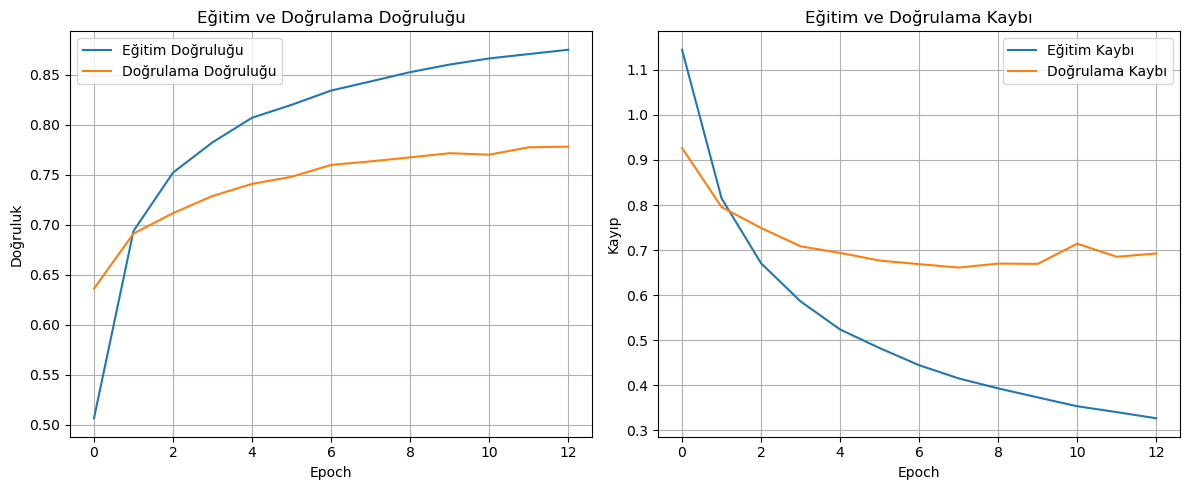


--- Doğrulama Seti Üzerinde Eğitilmiş LSTM Performansı (Keras Embedding ve Entity Bilgisi ile) ---
En İyi Doğrulama Doğruluğu (EarlyStopping ile): 0.7780
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step

Sınıflandırma Raporu (Doğrulama Seti - String Etiketler):


Sınıflandırma Raporu (Doğrulama Seti - String Etiketler):

              precision    recall  f1-score   support

  Irrelevant       0.79      0.64      0.71      2598
    Negative       0.82      0.80      0.81      4508
     Neutral       0.74      0.75      0.74      3664
    Positive       0.72      0.81      0.76      4166

    accuracy                           0.76     14936
   macro avg       0.77      0.75      0.76     14936
weighted avg       0.77      0.76      0.76     14936


Karışıklık Matrisi (Doğrulama Seti):
              precision    recall  f1-score   support

  Irrelevant       0.79      0.64      0.71      2598
    Negative       0.82      0.80      0.81      4508
     Ne

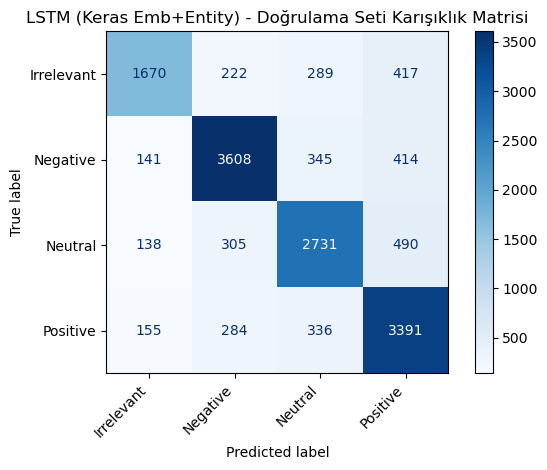

In [55]:
import tensorflow as tf # Callbacks ve Adam için
import matplotlib.pyplot as plt # Grafik çizdirmek için
import time # Eğitim süresini ölçmek için
import numpy as np # np.argmax için
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score # Raporlama için
import pandas as pd # Sınıf isimlerini almak için (eğer label_encoder varsa)


# Bir önceki hücrelerden gelen ve bu hücrede kullanılacak değişkenlerin
# doğru şekilde tanımlanmış ve erişilebilir olduğunu varsayıyoruz:
# - model_keras_emb_entity (bir önceki adımda derlenen model)
# - X_train_inputs_keras (list of [X_train_padded, X_train_entity_flags_keras])
# - y_train_rnn_encoded (sayısallaştırılmış eğitim etiketleri)
# - X_val_inputs_keras (list of [X_val_padded, X_val_entity_flags_keras])
# - y_val_rnn_encoded (sayısallaştırılmış doğrulama etiketleri)
# - label_encoder_xgb (orijinal string etiketlere dönmek için, eğer varsa)
# - is_string_labels (orijinal etiketlerin string olup olmadığını belirtir, eğer varsa)

if ('model_keras_emb_entity' in globals() and model_keras_emb_entity is not None and
    'X_train_inputs_keras' in globals() and X_train_inputs_keras is not None and
    'y_train_rnn_encoded' in globals() and y_train_rnn_encoded is not None and
    'X_val_inputs_keras' in globals() and X_val_inputs_keras is not None and
    'y_val_rnn_encoded' in globals() and y_val_rnn_encoded is not None):

    print("="*50)
    print("LSTM Model Eğitimi (Keras Embedding ve Entity Bilgisi ile) Başlatılıyor...")
    print("="*50)

    epochs_keras = 20 # Epoch sayısı (EarlyStopping olduğu için yüksek tutabiliriz)
    batch_size_keras = 64 # Batch boyutu

    # Callbacks
    early_stopping_keras_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', # İzlenecek metrik
        patience=5,         # 5 epoch boyunca val_loss iyileşmezse dur
        restore_best_weights=True, # En iyi ağırlıkları geri yükle
        verbose=1           # Durdurulduğunda mesaj göster
    )
    
    # İsteğe bağlı: ModelCheckpoint
    # model_checkpoint_keras_cb = tf.keras.callbacks.ModelCheckpoint(
    #     'best_keras_emb_entity_lstm_model.keras',
    #     save_best_only=True,
    #     monitor='val_loss',
    #     verbose=1
    # )
    # callbacks_list_keras = [early_stopping_keras_cb, model_checkpoint_keras_cb]
    
    callbacks_list_keras = [early_stopping_keras_cb]

    print(f"Eğitim {epochs_keras} epoch ve {batch_size_keras} batch boyutu ile yapılacak.")
    print(f"Early stopping: monitor='val_loss', patience=5, restore_best_weights=True")
    
    start_time_lstm_fit_keras = time.time()
    try:
        history_keras_emb_entity = model_keras_emb_entity.fit(
            X_train_inputs_keras, y_train_rnn_encoded,
            epochs=epochs_keras,
            batch_size=batch_size_keras,
            validation_data=(X_val_inputs_keras, y_val_rnn_encoded),
            callbacks=callbacks_list_keras,
            verbose=1 # Her epoch için log basar
        )
        end_time_lstm_fit_keras = time.time()
        print(f"\nLSTM Model (Keras Embedding ve Entity Bilgisi ile) eğitimi {end_time_lstm_fit_keras - start_time_lstm_fit_keras:.2f} saniyede tamamlandı.")
        print("="*50)

        # Eğitim ve doğrulama metriklerini çizdirelim
        print("\nEğitim ve Doğrulama Metrikleri Grafikleri Çizdiriliyor...")
        
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(history_keras_emb_entity.history['accuracy'], label='Eğitim Doğruluğu')
        plt.plot(history_keras_emb_entity.history['val_accuracy'], label='Doğrulama Doğruluğu')
        plt.title('Eğitim ve Doğrulama Doğruluğu')
        plt.xlabel('Epoch')
        plt.ylabel('Doğruluk')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(history_keras_emb_entity.history['loss'], label='Eğitim Kaybı')
        plt.plot(history_keras_emb_entity.history['val_loss'], label='Doğrulama Kaybı')
        plt.title('Eğitim ve Doğrulama Kaybı')
        plt.xlabel('Epoch')
        plt.ylabel('Kayıp')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()
        
        # Doğrulama seti üzerinde son bir değerlendirme
        print("\n--- Doğrulama Seti Üzerinde Eğitilmiş LSTM Performansı (Keras Embedding ve Entity Bilgisi ile) ---")
        # Modeli tekrar evaluate etmeye gerek yok, EarlyStopping en iyi ağırlıkları zaten yükledi.
        # Ama yine de emin olmak için yapılabilir:
        # loss_val_keras, accuracy_val_keras = model_keras_emb_entity.evaluate(X_val_inputs_keras, y_val_rnn_encoded, verbose=0)
        # print(f"Doğrulama Kaybı (Loss): {loss_val_keras:.4f}")
        # print(f"Doğrulama Doğruluğu (Accuracy): {accuracy_val_keras:.4f}")
        
        # En son epoch'taki (veya en iyi) val_accuracy'yi history'den alabiliriz
        best_val_accuracy = max(history_keras_emb_entity.history['val_accuracy'])
        print(f"En İyi Doğrulama Doğruluğu (EarlyStopping ile): {best_val_accuracy:.4f}")


        # Sınıflandırma raporu ve karışıklık matrisi
        y_pred_val_lstm_probs_keras = model_keras_emb_entity.predict(X_val_inputs_keras)
        y_pred_val_lstm_classes_keras = np.argmax(y_pred_val_lstm_probs_keras, axis=1)

        report_target_names_keras = None
        y_val_original_strings_keras = y_val_rnn_encoded # Sayısal kalabilir eğer encoder yoksa
        y_pred_val_lstm_strings_keras = y_pred_val_lstm_classes_keras # Sayısal kalabilir

        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            # y_val_rnn_encoded zaten y_val'ın encode edilmiş haliydi.
            # y_val ise orijinal string etiketleri tutuyordu.
            y_val_original_strings_keras = y_val # Orijinal y_val'ı kullanalım (eğer string ise)
            y_pred_val_lstm_strings_keras = label_encoder_xgb.inverse_transform(y_pred_val_lstm_classes_keras)
            report_target_names_keras = label_encoder_xgb.classes_
            print("\nSınıflandırma Raporu (Doğrulama Seti - String Etiketler):\n")
            print(classification_report(y_val_original_strings_keras, y_pred_val_lstm_strings_keras, target_names=report_target_names_keras))
        else: # Eğer etiketler zaten sayısal ise veya encoder bilgisi yoksa
            print("\nSınıflandırma Raporu (Doğrulama Seti - Sayısal Etiketler):\n")
            # y_val_rnn_encoded zaten sayısal, onu kullanalım
            print(classification_report(y_val_rnn_encoded, y_pred_val_lstm_classes_keras))


        print("\nKarışıklık Matrisi (Doğrulama Seti):")
        ConfusionMatrixDisplay.from_predictions(y_val_original_strings_keras, 
                                                y_pred_val_lstm_strings_keras, 
                                                display_labels=report_target_names_keras, 
                                                cmap=plt.cm.Blues)
        plt.title("LSTM (Keras Emb+Entity) - Doğrulama Seti Karışıklık Matrisi")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print("="*50)

    except Exception as e_fit_lstm_keras:
        print(f"\nLSTM modeli (Keras Embedding ve Entity Bilgisi ile) eğitilirken bir HATA oluştu: {e_fit_lstm_keras}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: LSTM modeli eğitimi için gerekli model veya veri değişkenleri bulunamadı.")
    print("Lütfen model_keras_emb_entity, X_train_inputs_keras, y_train_rnn_encoded, X_val_inputs_keras, y_val_rnn_encoded tanımlı olduğundan emin olun.")

LSTM Modeli Oluşturuluyor (Keras Embedding ve İşlenmiş Entity Bilgisi ile)...


c:\Users\aslay\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input_v2       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ word_embedding_v2   │ (None, 50, 128)   │  1,280,000 │ text_input_v2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entity_flag_input_… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_lstm… │ (None, 128)       │     98,816 │ word_embedding_v… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entity_feature_ext… │ (None, 8)         │         16 │ entity_flag_inpu… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_featur… │ (None, 136)       │          0 │ bidirectional_ls… │
│ (Concatenate)       │                   │            │ entity_feature_e… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1_v2 (Dense)  │ (None, 64)        │      8,768 │ concatenate_feat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1_v2        │ (None, 64)        │          0 │ dense_1_v2[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_softmax_v2   │ (None, 4)         │        260 │ dropout_1_v2[0][… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,387,860 (5.29 MB)

 Trainable params: 1,387,860 (5.29 MB)

 Non-trainable params: 0 (0.00 B)


LSTM Modeli (Keras Embedding ve İşlenmiş Entity Bilgisi ile) başarıyla oluşturuldu ve derlendi.

LSTM Model Eğitimi (Keras Embedding ve İşlenmiş Entity Bilgisi ile) Başlatılıyor...
Eğitim 20 epoch ve 64 batch boyutu ile yapılacak.
Early stopping: monitor='val_loss', patience=5, restore_best_weights=True
Epoch 1/20
Epoch 1/20


c:\Users\aslay\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['text_input_v2', 'entity_flag_input_v2']. Received: the structure of inputs=('*', '*')
  warnings.warn(


701/701 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4042 - loss: 1.2689 - val_accuracy: 0.6390 - val_loss: 0.9140
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.4042 - loss: 1.2689 - val_accuracy: 0.6390 - val_loss: 0.9140
Epoch 2/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6816 - loss: 0.8368 - val_accuracy: 0.6883 - val_loss: 0.7986
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6816 - loss: 0.8368 - val_accuracy: 0.6883 - val_loss: 0.7986
Epoch 3/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7512 - loss: 0.6742 - val_accuracy: 0.7057 - val_loss: 0.7627
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7512 - loss: 0.6742 - val_accuracy: 0.7057 - val_loss: 0.7627
Epoch 4/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7837 - loss: 0.5900 - val_accuracy: 0.7279 - val_loss: 0.7133
Epoch 5/20
701/701 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7837 - loss: 0.5900 - val_accurac

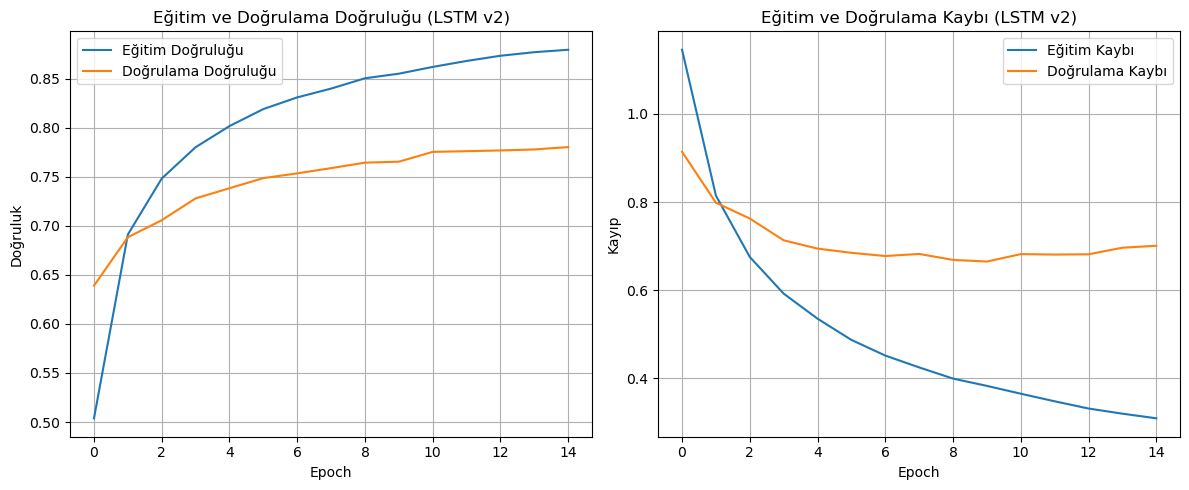


--- Doğrulama Seti Üzerinde Eğitilmiş LSTM Performansı (Keras Embedding ve İşlenmiş Entity Bilgisi ile) ---
En İyi Doğrulama Doğruluğu (EarlyStopping ile): 0.7802
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

Sınıflandırma Raporu (Doğrulama Seti - String Etiketler):


Sınıflandırma Raporu (Doğrulama Seti - String Etiketler):

              precision    recall  f1-score   support

  Irrelevant       0.77      0.67      0.72      2598
    Negative       0.74      0.85      0.79      4508
     Neutral       0.80      0.70      0.75      3664
    Positive       0.76      0.79      0.77      4166

    accuracy                           0.77     14936
   macro avg       0.77      0.75      0.76     14936
weighted avg       0.77      0.77      0.76     14936


Karışıklık Matrisi (Doğrulama Seti):
              precision    recall  f1-score   support

  Irrelevant       0.77      0.67      0.72      2598
    Negative       0.74      0.85      0.79      450

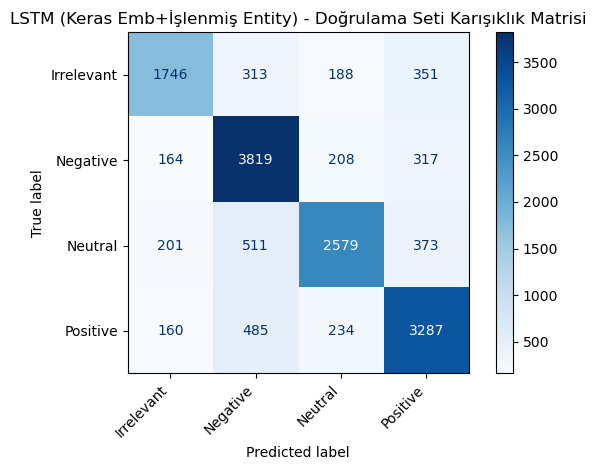

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Bidirectional, concatenate
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import pandas as pd

# Bir önceki RNN veri hazırlığı adımından gelen ve bu hücrede kullanılacak değişkenlerin
# doğru şekilde tanımlanmış ve erişilebilir olduğunu varsayıyoruz:
# - vocab_size, max_length, embedding_dim_keras, lstm_units_keras, num_classes
# - X_train_padded, y_train_rnn_encoded
# - X_val_padded, y_val_rnn_encoded
# - main_df, y_train, y_val (explicitly_contains_entity için indeksleme amacıyla)
# - label_encoder_xgb, is_string_labels (raporlama için, eğer varsa)

# Model parametreleri (bir önceki hücrede tanımlanmış olmalı, burada tekrar belirtiyorum)
# Eğer tanımlı değilse, bu değerleri uygun şekilde ayarlayın.
if 'vocab_size' not in globals(): vocab_size = 10000
if 'max_length' not in globals(): max_length = 50
if 'embedding_dim_keras' not in globals(): embedding_dim_keras = 128
if 'lstm_units_keras' not in globals(): lstm_units_keras = 64
if 'num_classes' not in globals() and 'y_train_rnn_encoded' in globals():
    num_classes = len(np.unique(y_train_rnn_encoded))
elif 'num_classes' not in globals():
    print("UYARI: num_classes tanımlı değil, varsayılan olarak 4 alınıyor.")
    num_classes = 4


if ('X_train_padded' in globals() and 'y_train_rnn_encoded' in globals() and
    'main_df' in globals() and 'explicitly_contains_entity' in main_df.columns and
    'y_train' in globals() and 'y_val' in globals()):

    print("="*50)
    print("LSTM Modeli Oluşturuluyor (Keras Embedding ve İşlenmiş Entity Bilgisi ile)...")
    print("="*50)

    # Girdi Katmanları
    text_input_v2 = Input(shape=(max_length,), name='text_input_v2')
    entity_flag_input_v2 = Input(shape=(1,), name='entity_flag_input_v2')

    # Embedding Katmanı
    embedding_layer_v2 = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim_keras,
        input_length=max_length, # Keras uyarısına göre bu kaldırılabilir
        name='word_embedding_v2'
    )
    embedded_sequences_v2 = embedding_layer_v2(text_input_v2)

    # LSTM Katmanı
    lstm_out_v2 = Bidirectional(LSTM(units=lstm_units_keras, dropout=0.3, recurrent_dropout=0.3), name='bidirectional_lstm_v2')(embedded_sequences_v2)

    # Entity bayrağını küçük bir Dense katmandan geçirelim
    entity_features_v2 = Dense(8, activation='relu', name='entity_feature_extractor_v2')(entity_flag_input_v2) # Birim sayısını deneyebiliriz (örn: 4, 8)

    # LSTM çıktısı ile işlenmiş entity özelliklerini birleştirme
    merged_v2 = concatenate([lstm_out_v2, entity_features_v2], name='concatenate_features_v2')

    # Dense Katmanlar
    x_v2 = Dense(units=64, activation='relu', name='dense_1_v2')(merged_v2)
    x_v2 = Dropout(0.5, name='dropout_1_v2')(x_v2)
    
    output_layer_v2 = Dense(units=num_classes, activation='softmax', name='output_softmax_v2')(x_v2)

    # Modeli Oluşturma
    model_lstm_v2 = Model(inputs=[text_input_v2, entity_flag_input_v2], outputs=output_layer_v2)

    # Modeli Derleme
    model_lstm_v2.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )

    model_lstm_v2.summary()
    print("\nLSTM Modeli (Keras Embedding ve İşlenmiş Entity Bilgisi ile) başarıyla oluşturuldu ve derlendi.")
    print("="*50)

    # Eğitim için girdileri hazırlama
    X_train_entity_flags_v2 = main_df.loc[y_train.index, 'explicitly_contains_entity'].fillna(0).astype(int).values
    X_val_entity_flags_v2 = main_df.loc[y_val.index, 'explicitly_contains_entity'].fillna(0).astype(int).values
    
    X_train_inputs_v2 = [X_train_padded, X_train_entity_flags_v2]
    X_val_inputs_v2 = [X_val_padded, X_val_entity_flags_v2]

    # Modeli Eğitme
    print("\nLSTM Model Eğitimi (Keras Embedding ve İşlenmiş Entity Bilgisi ile) Başlatılıyor...")
    print("="*50)

    epochs_v2 = 20
    batch_size_v2 = 64

    early_stopping_v2_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
    callbacks_list_v2 = [early_stopping_v2_cb]

    print(f"Eğitim {epochs_v2} epoch ve {batch_size_v2} batch boyutu ile yapılacak.")
    print(f"Early stopping: monitor='val_loss', patience=5, restore_best_weights=True")
    
    start_time_lstm_fit_v2 = time.time()
    try:
        history_lstm_v2 = model_lstm_v2.fit(
            X_train_inputs_v2, y_train_rnn_encoded,
            epochs=epochs_v2,
            batch_size=batch_size_v2,
            validation_data=(X_val_inputs_v2, y_val_rnn_encoded),
            callbacks=callbacks_list_v2,
            verbose=1
        )
        end_time_lstm_fit_v2 = time.time()
        print(f"\nLSTM Model (Keras Embedding ve İşlenmiş Entity Bilgisi ile) eğitimi {end_time_lstm_fit_v2 - start_time_lstm_fit_v2:.2f} saniyede tamamlandı.")
        print("="*50)

        # Eğitim ve doğrulama metriklerini çizdirelim
        print("\nEğitim ve Doğrulama Metrikleri Grafikleri Çizdiriliyor...")
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history_lstm_v2.history['accuracy'], label='Eğitim Doğruluğu')
        plt.plot(history_lstm_v2.history['val_accuracy'], label='Doğrulama Doğruluğu')
        plt.title('Eğitim ve Doğrulama Doğruluğu (LSTM v2)')
        plt.xlabel('Epoch')
        plt.ylabel('Doğruluk')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(history_lstm_v2.history['loss'], label='Eğitim Kaybı')
        plt.plot(history_lstm_v2.history['val_loss'], label='Doğrulama Kaybı')
        plt.title('Eğitim ve Doğrulama Kaybı (LSTM v2)')
        plt.xlabel('Epoch')
        plt.ylabel('Kayıp')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        print("\n--- Doğrulama Seti Üzerinde Eğitilmiş LSTM Performansı (Keras Embedding ve İşlenmiş Entity Bilgisi ile) ---")
        best_val_accuracy_v2 = max(history_lstm_v2.history['val_accuracy'])
        print(f"En İyi Doğrulama Doğruluğu (EarlyStopping ile): {best_val_accuracy_v2:.4f}")

        y_pred_val_lstm_probs_v2 = model_lstm_v2.predict(X_val_inputs_v2)
        y_pred_val_lstm_classes_v2 = np.argmax(y_pred_val_lstm_probs_v2, axis=1)

        report_target_names_v2 = None
        y_val_original_strings_v2 = y_val_rnn_encoded 
        y_pred_val_lstm_strings_v2 = y_pred_val_lstm_classes_v2

        if 'label_encoder_xgb' in globals() and label_encoder_xgb is not None and 'is_string_labels' in globals() and is_string_labels:
            y_val_original_strings_v2 = y_val 
            y_pred_val_lstm_strings_v2 = label_encoder_xgb.inverse_transform(y_pred_val_lstm_classes_v2)
            report_target_names_v2 = label_encoder_xgb.classes_
            print("\nSınıflandırma Raporu (Doğrulama Seti - String Etiketler):\n")
            print(classification_report(y_val_original_strings_v2, y_pred_val_lstm_strings_v2, target_names=report_target_names_v2))
        else: 
            print("\nSınıflandırma Raporu (Doğrulama Seti - Sayısal Etiketler):\n")
            print(classification_report(y_val_rnn_encoded, y_pred_val_lstm_classes_v2))

        print("\nKarışıklık Matrisi (Doğrulama Seti):")
        ConfusionMatrixDisplay.from_predictions(y_val_original_strings_v2, 
                                                y_pred_val_lstm_strings_v2, 
                                                display_labels=report_target_names_v2, 
                                                cmap=plt.cm.Blues)
        plt.title("LSTM (Keras Emb+İşlenmiş Entity) - Doğrulama Seti Karışıklık Matrisi")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print("="*50)

    except Exception as e_fit_lstm_v2:
        print(f"\nLSTM modeli (Keras Embedding ve İşlenmiş Entity Bilgisi ile) eğitilirken bir HATA oluştu: {e_fit_lstm_v2}")
        import traceback
        traceback.print_exc()
        print("="*50)
else:
    print("HATA: LSTM modeli (Keras Embedding ve İşlenmiş Entity Bilgisi ile) oluşturmak/eğitmek için gerekli değişkenler bulunamadı.")